# Problem Statement:
a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).


# Business Goal:
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Step 1: Loading Data and importing some basic libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for Handling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
lead.shape

(9240, 37)

In [4]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Missing value check

checking missing value or handling missing values in correct manner is a very important task to avoid error in future models.
here, I deleted features which are having missing value of 45% or more and others are imputed with median (if numerical) and mode of (categorical).

## 2.1 Data Cleaning

### 2.1.1 Treatment for Select values

In [6]:
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

## 2.2 Missing value checks

In [7]:
null_val = lead.isnull().mean()
null_val*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## 2.3 Deleting Feature

In [8]:
del_col=[]
for col in lead.columns:
    if (lead[col].isnull().mean()*100)>=45.00:
        del_col.append(col)

In [9]:
del_col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [10]:
lead.drop(del_col,axis=1,inplace=True)

In [11]:
lead.shape

(9240, 30)

In [12]:
null_val = lead.isnull().mean()
null_val*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

## 2.4 Imputing Missing Value one by one

In [13]:
lead['Lead Source']=lead['Lead Source'].fillna(lead['Lead Source'].mode()[0])

In [14]:
lead['TotalVisits']=lead['TotalVisits'].fillna(lead['TotalVisits'].median())

In [15]:
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())

In [16]:
lead['Last Activity']=lead['Last Activity'].fillna(lead['Last Activity'].mode()[0])

In [17]:
lead['Country']=lead['Country'].fillna(lead['Country'].mode()[0])

In [18]:
lead['Specialization']=lead['Specialization'].fillna(lead['Specialization'].mode()[0])

In [19]:
lead['What is your current occupation']=lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0])

In [20]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0])

In [21]:
lead['Tags']=lead['Tags'].fillna(lead['Tags'].mode()[0])

In [22]:
lead['City']=lead['City'].fillna(lead['City'].mode()[0])

In [23]:
lead.isnull().mean()

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## 2.5 deleting unnecessary column

Here we deleted 2 unnecessary column that is Country and ProspectID.

In [24]:
delete_col = ['Country','Prospect ID']
lead.drop(delete_col,axis=1,inplace=True)

In [25]:
lead.shape

(9240, 28)

## 2.6 Handling features which are having 1 unique values

deleting all features which are having only 1 category because that is useless or can make data anomaly in future

In [26]:
lead.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [27]:
col_to_drop = []
for i in lead.columns:
    if lead[i].nunique()==1:
        col_to_drop.append(i)

In [28]:
col_to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [29]:
print("Before Dropping Columns",lead.shape)
lead.drop(col_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",lead.shape)

Before Dropping Columns (9240, 28)
After Dropping Columns (9240, 23)


# Step 3: Data Imbalance

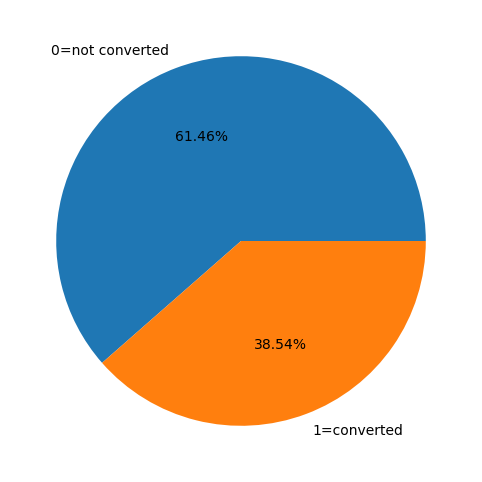

In [125]:
normalize = round(lead['Converted'].value_counts(normalize=True)*100,2)
plt.figure(figsize=(10,6))
plt.pie(normalize,labels=['0=not converted','1=converted'],autopct='%1.2f%%')
plt.show()

from the above pie chart we can conclude that the data is moderately imbalanced.

# Step 4: Outlier Checks

outliers checked for numerical values except column lead number which is actually acts as a ID number

## 4.1 Seperating features

seperating all categorical, numerical and target columns

In [31]:
num = []
cat = []
for i in lead.columns:
    if lead[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [32]:
target = []
index = num.index('Converted')
target = num.pop(index)

In [33]:
num

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [34]:
target

'Converted'

In [35]:
cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## 4.2 Outlier checks

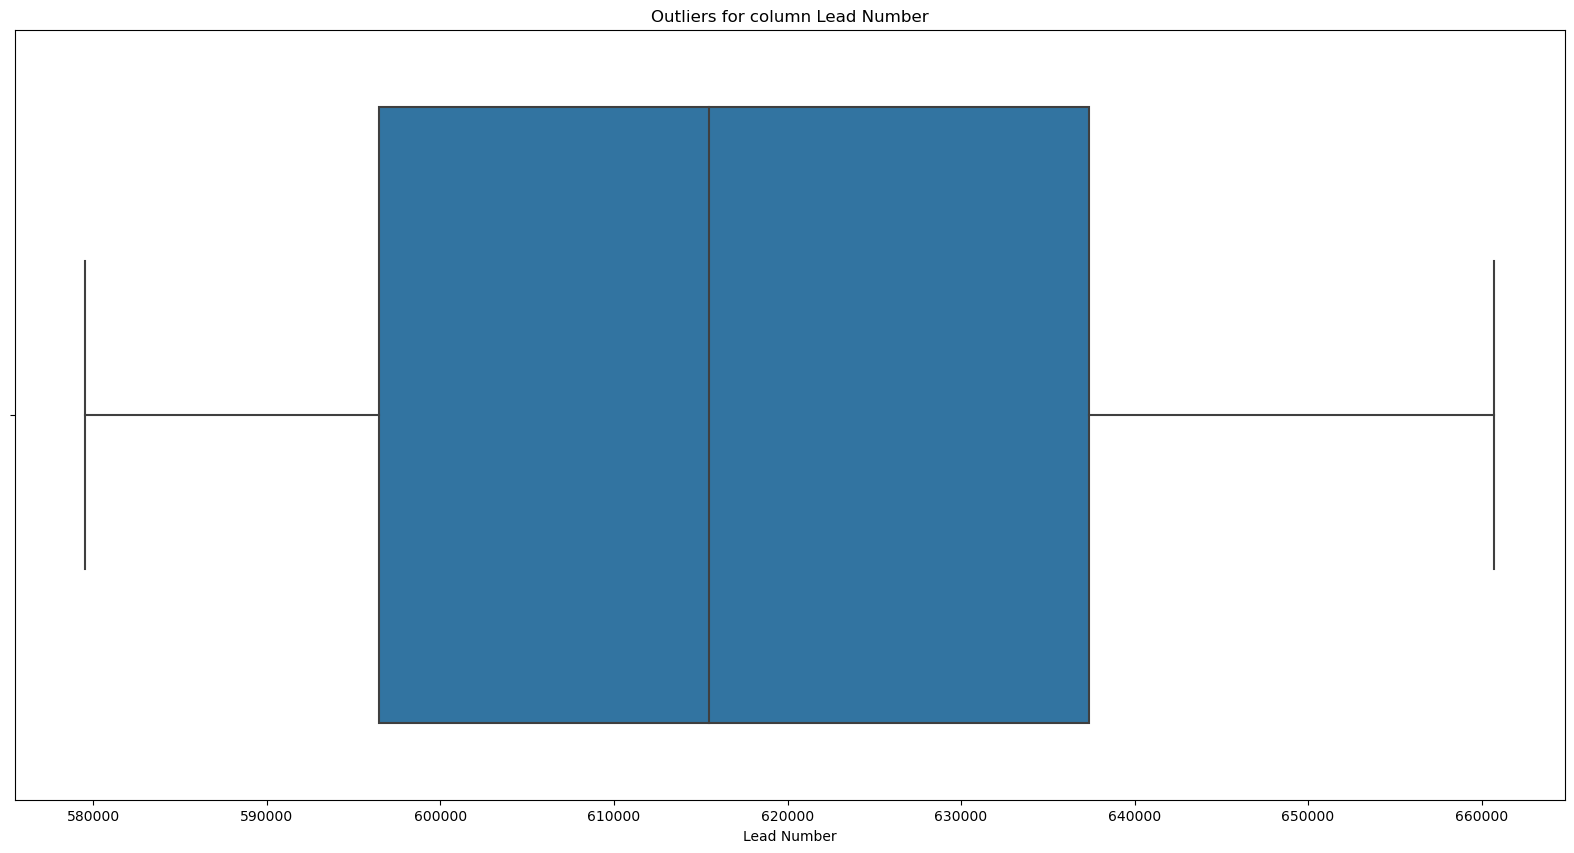

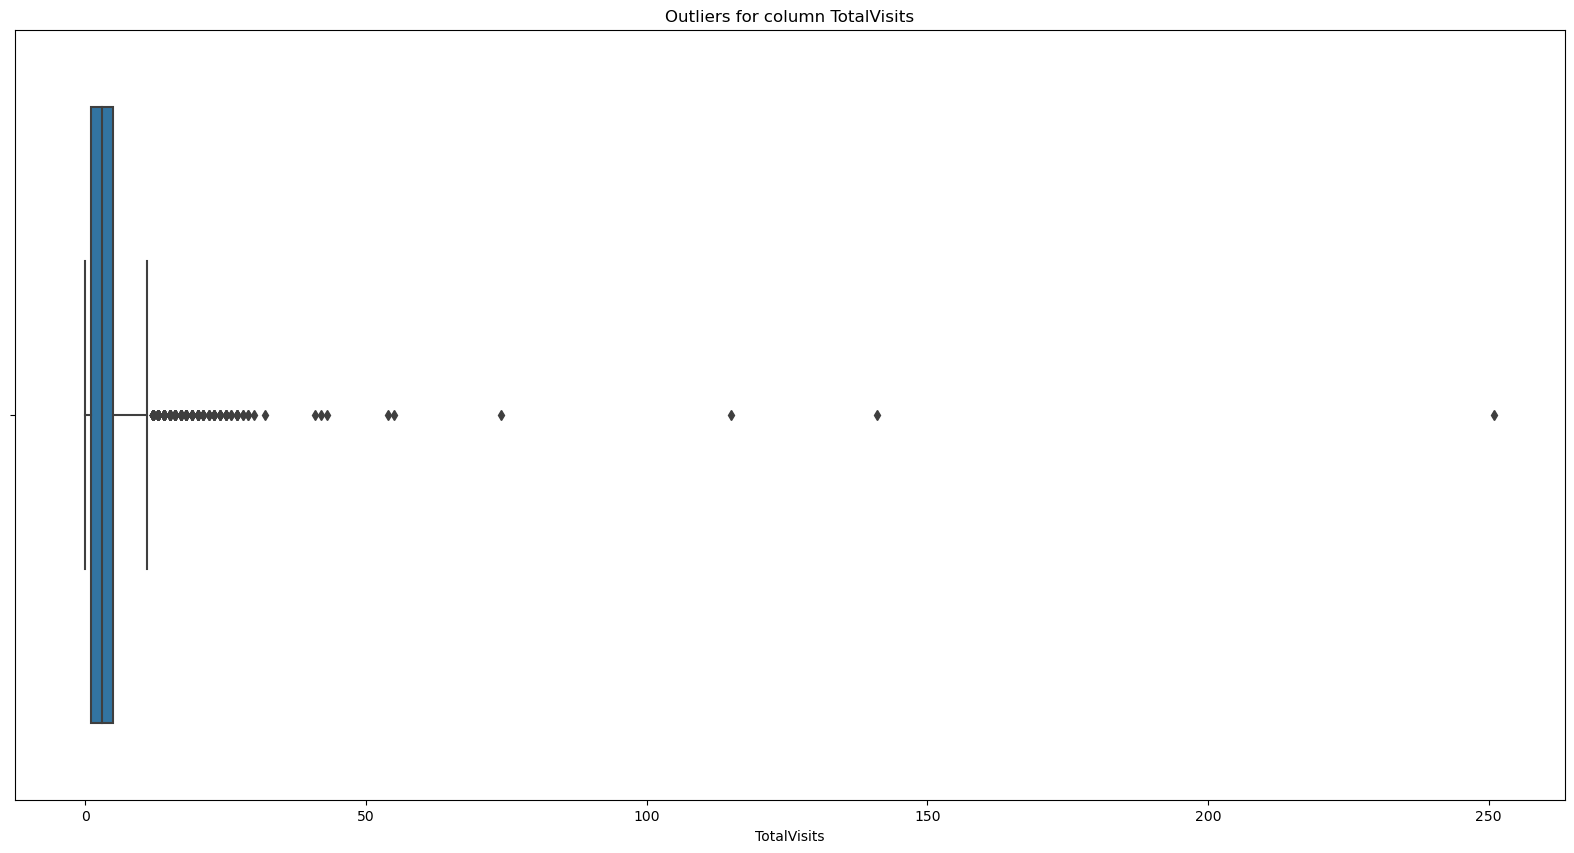

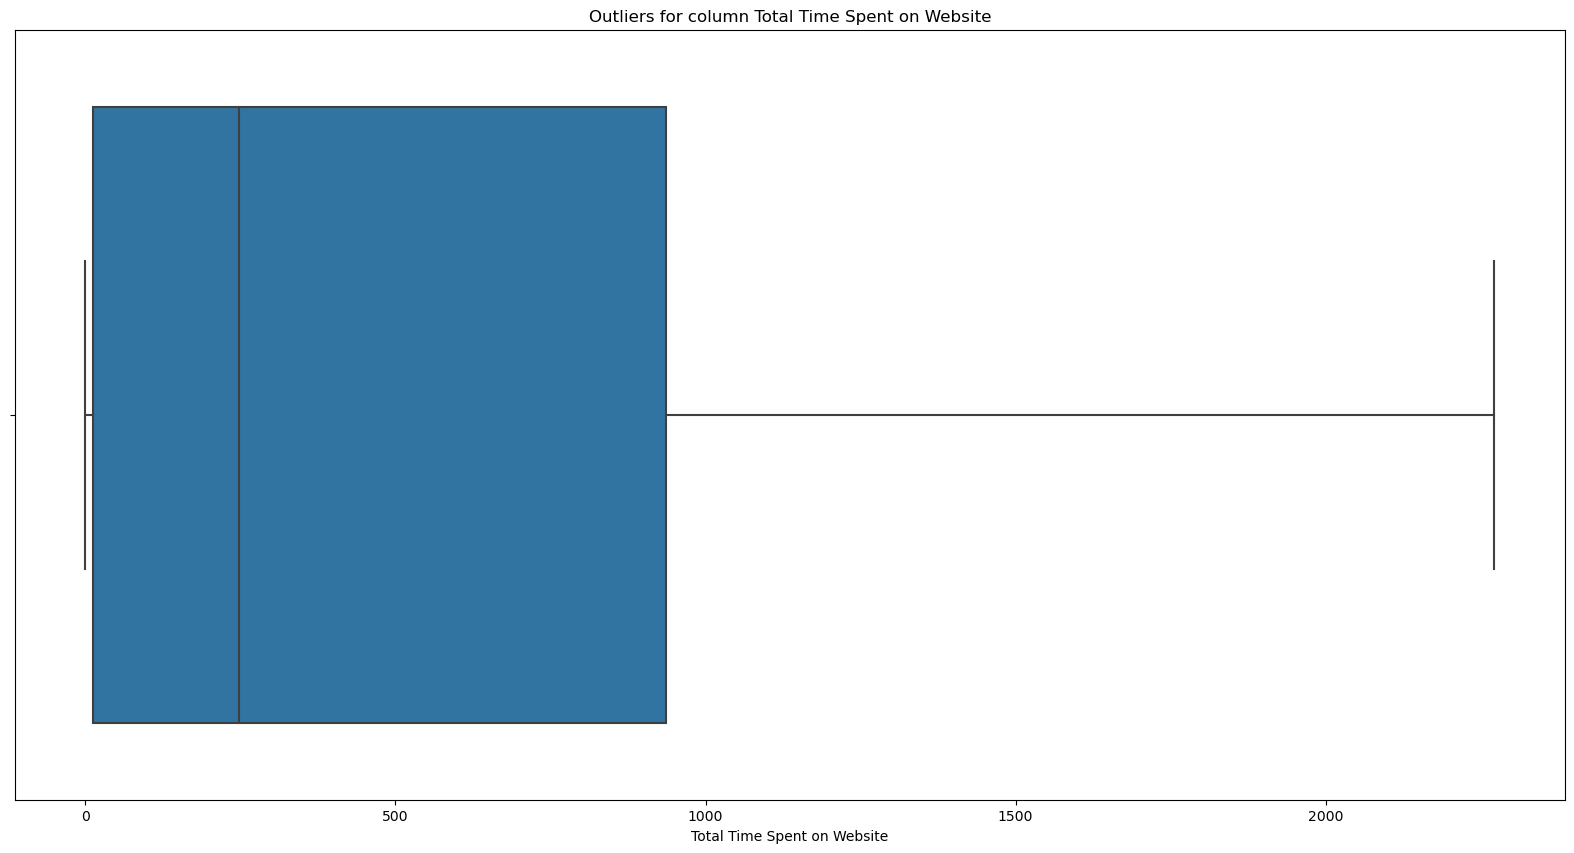

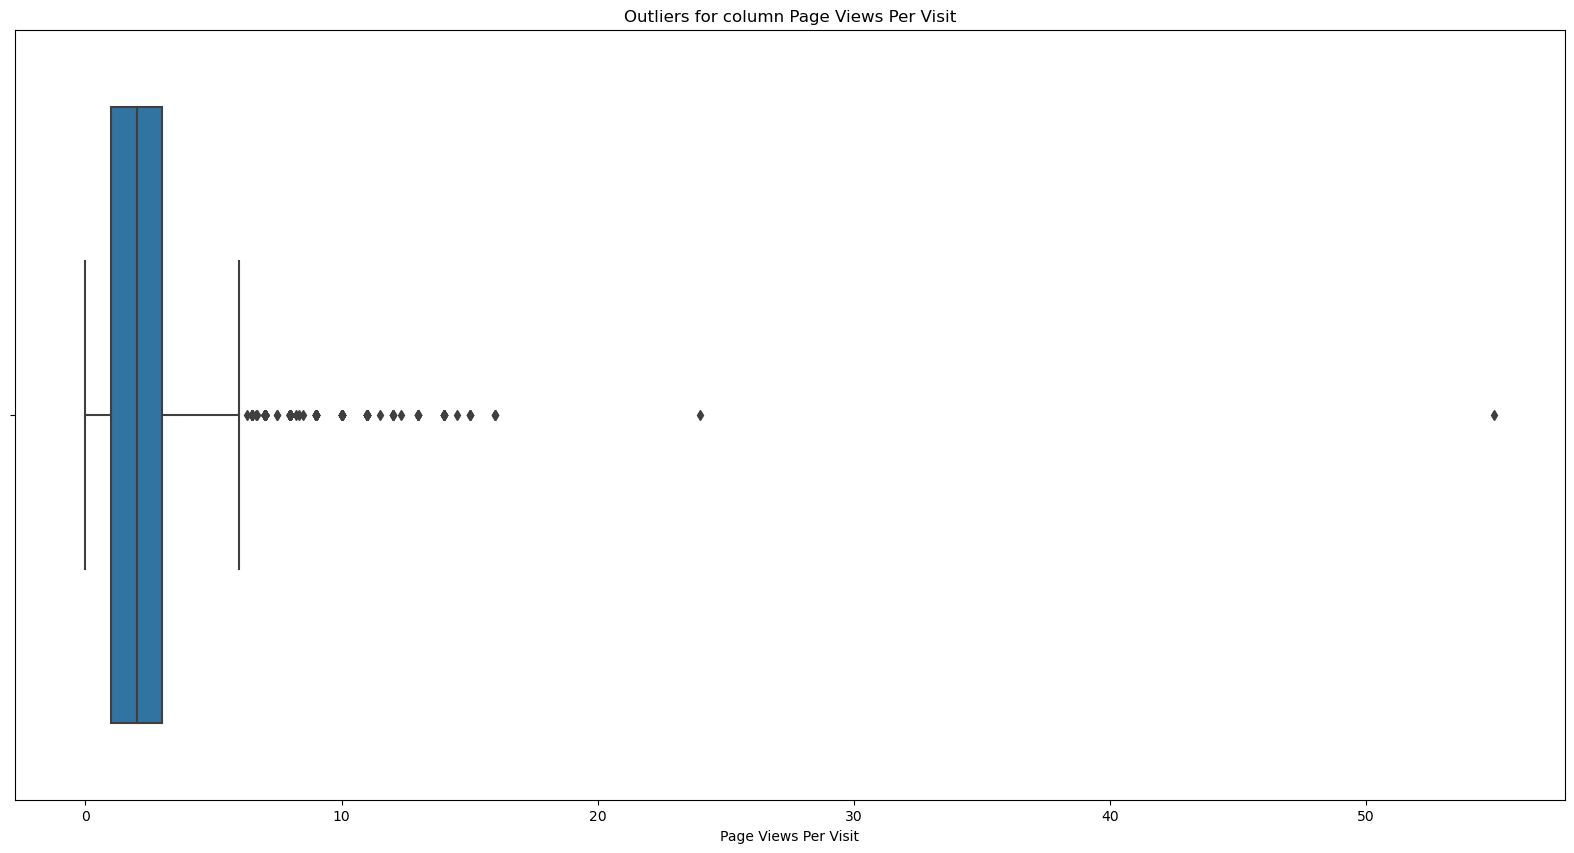

In [36]:
for col in num:
    plt.figure(figsize=(20,10))
    sns.boxplot(lead[col])
    plt.title('Outliers for column '+col)
    plt.show()

# Step 5 : Data Visualization

## 5.1 Univariate Analysis

univariate analysis divided into 2 parts 
1. Numerical which will be done with Histplot
2. Categorical which will be done by Countplot.

### 5.1.1 Numerical univariate analysis

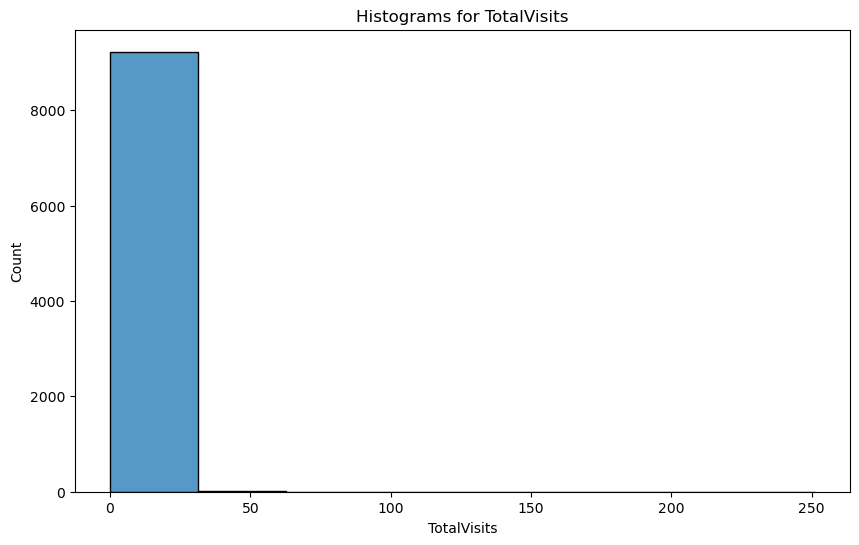

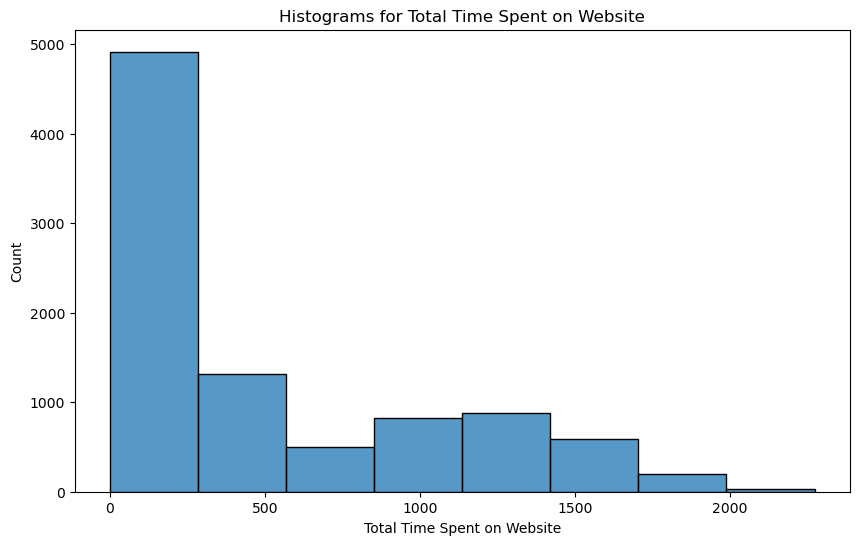

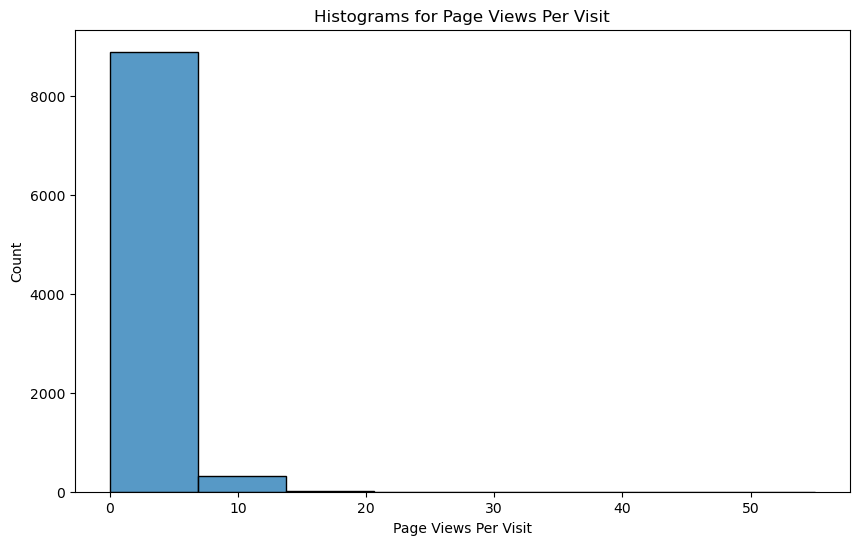

In [37]:
for j in num:
    if j!='Lead Number':
        plt.figure(figsize=(10,6))
        sns.histplot(lead[j],bins=8)
        plt.title('Histograms for '+j)
        plt.show()

### 5.1.2 Categorical univariate analysis

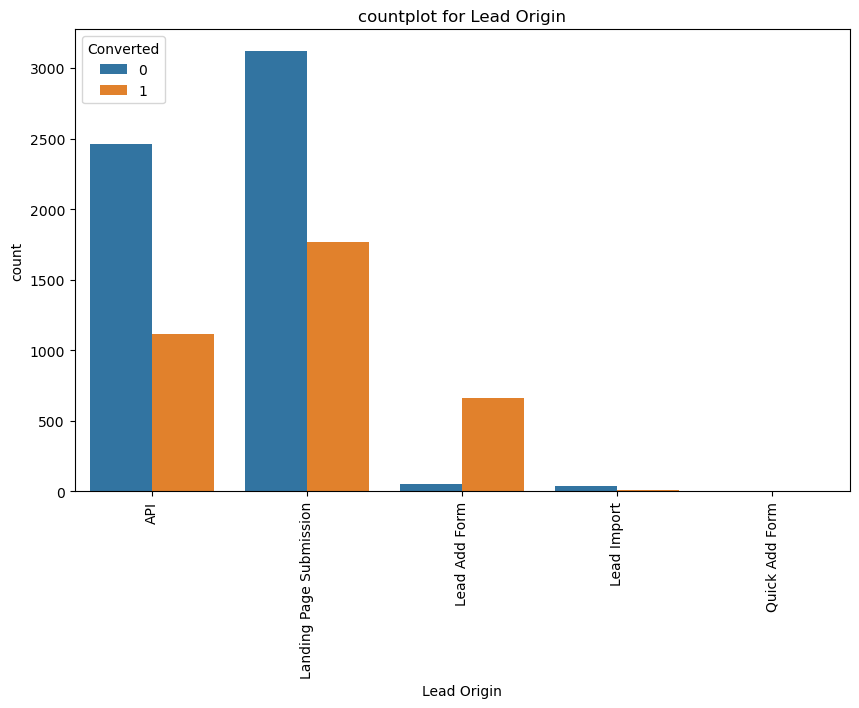

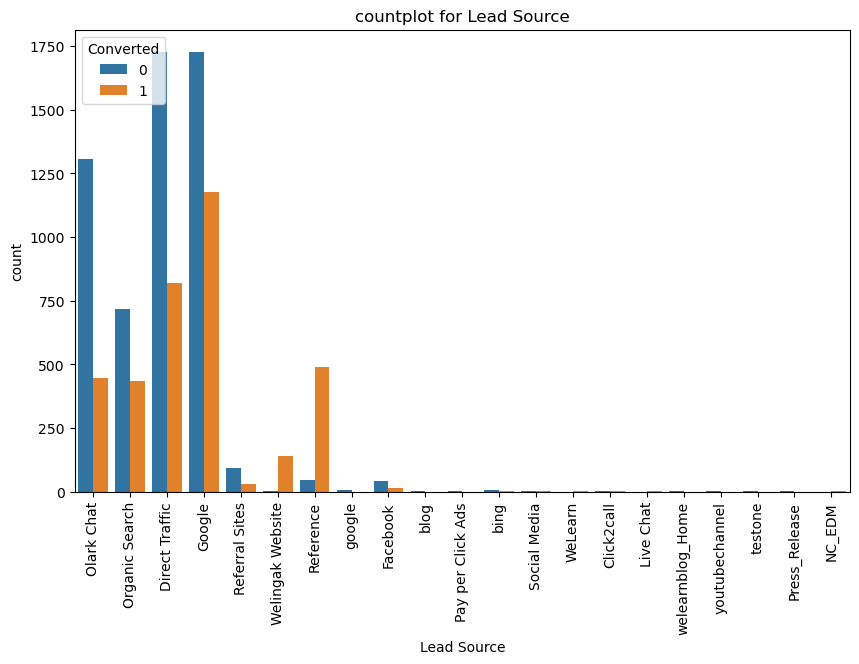

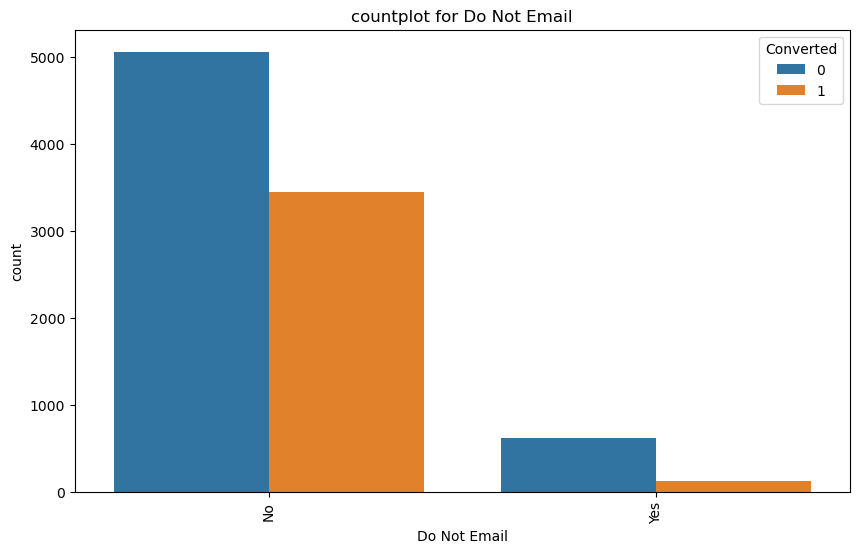

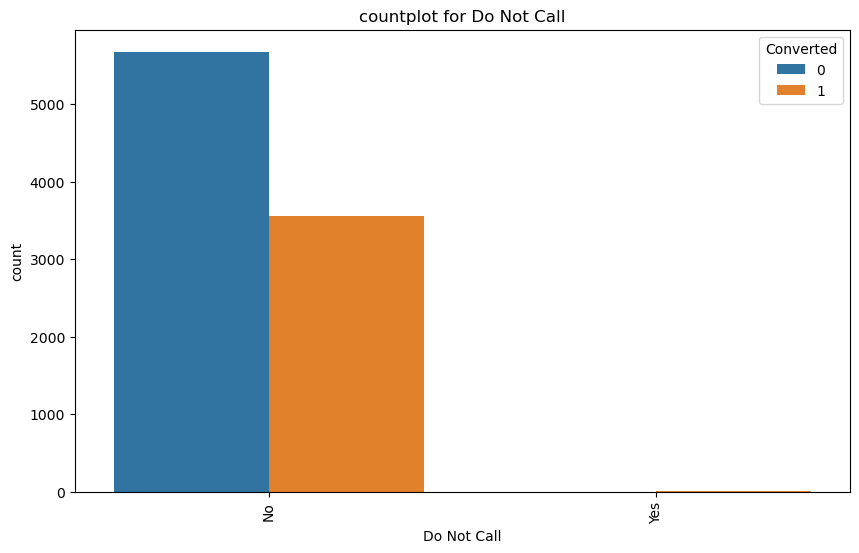

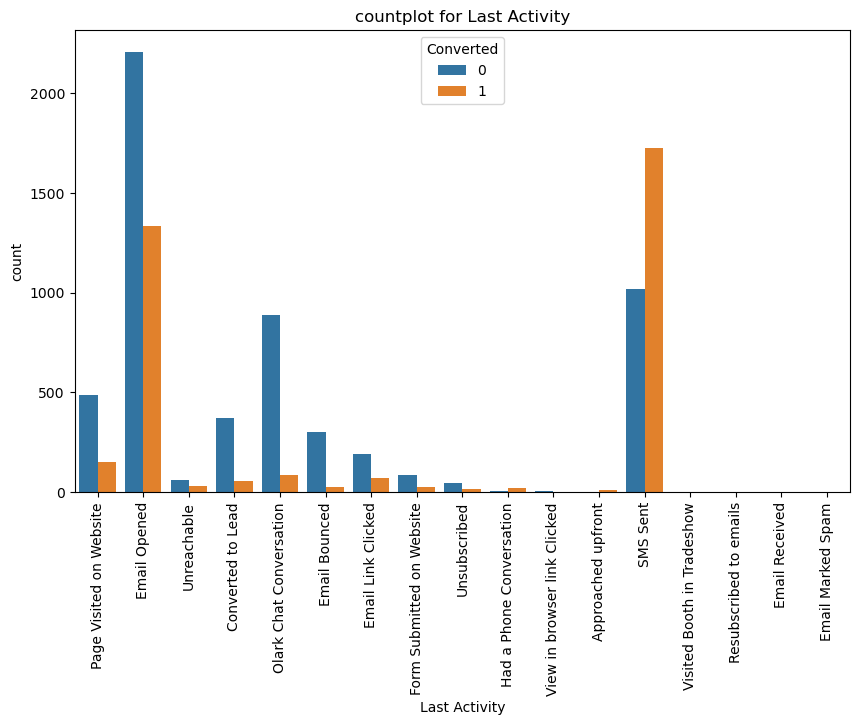

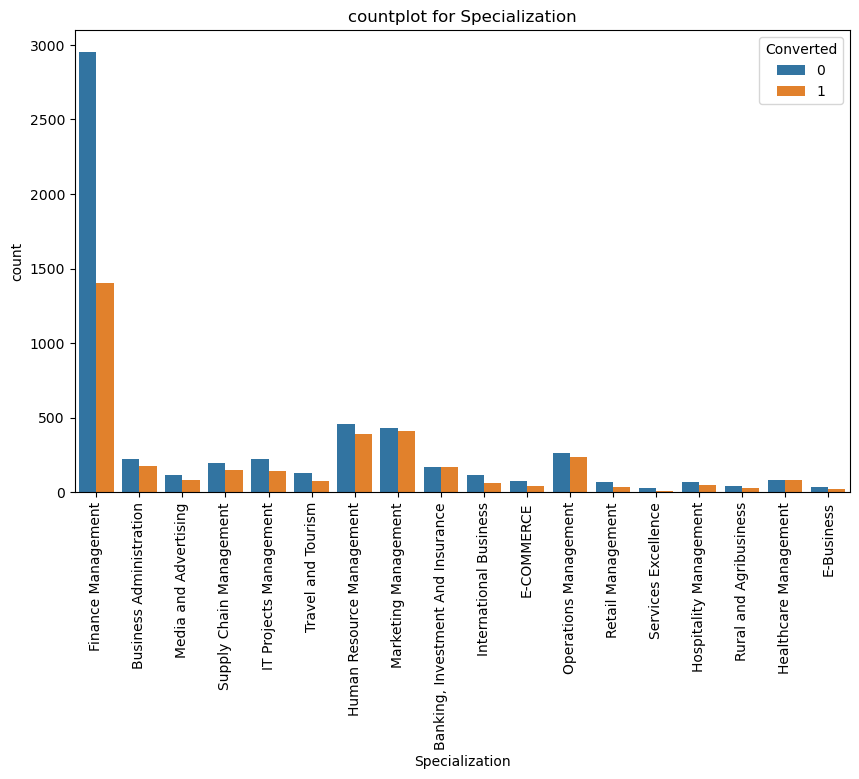

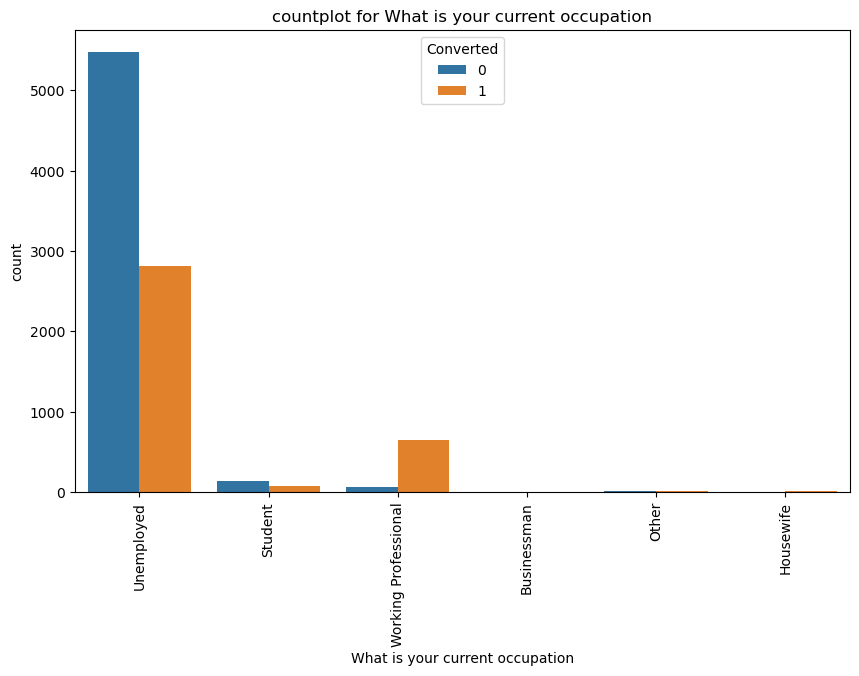

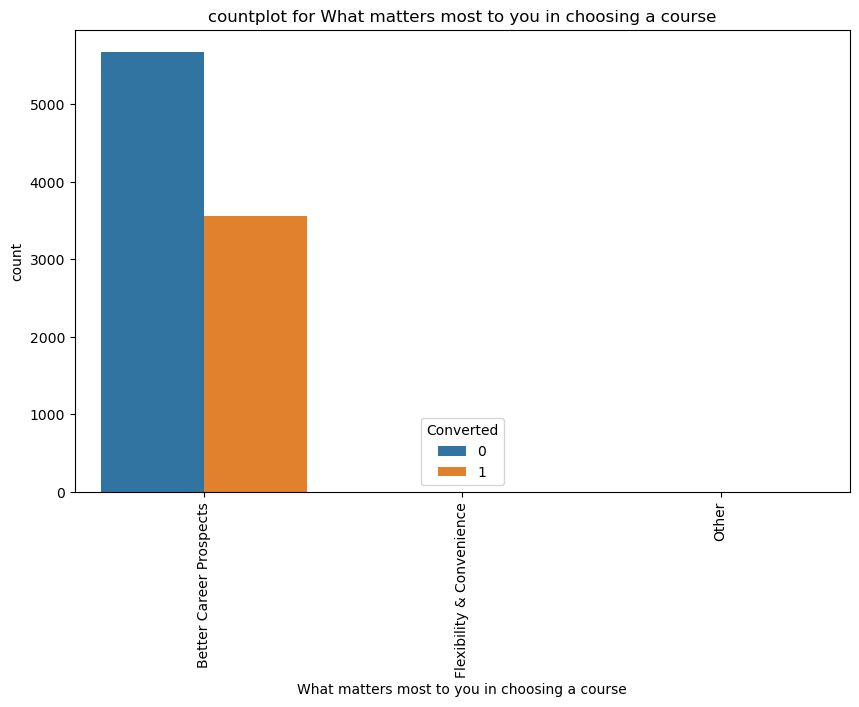

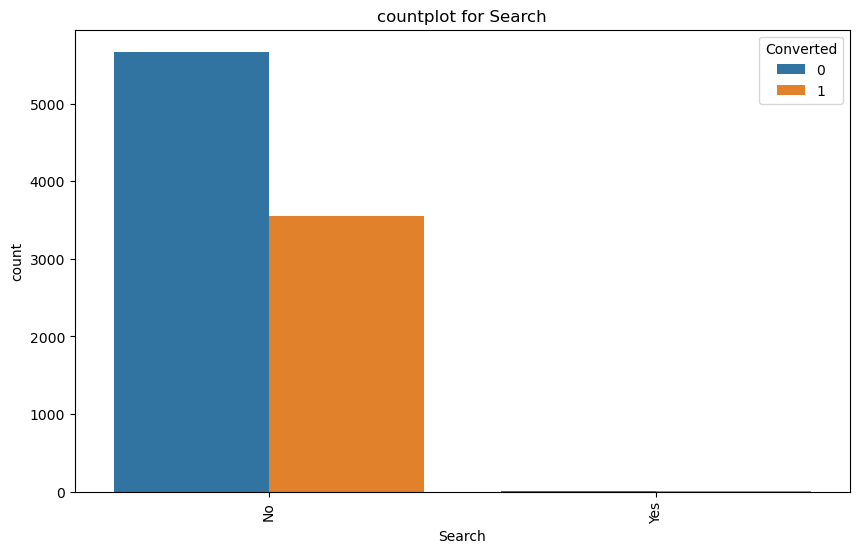

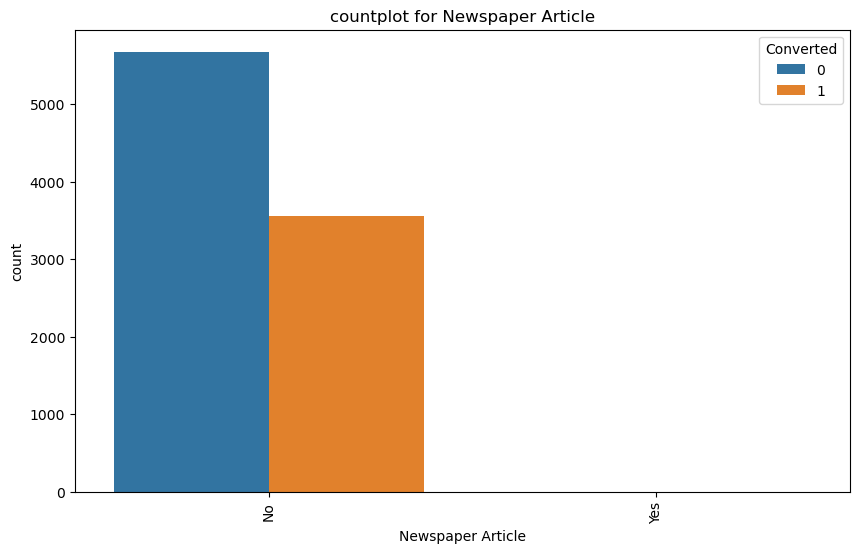

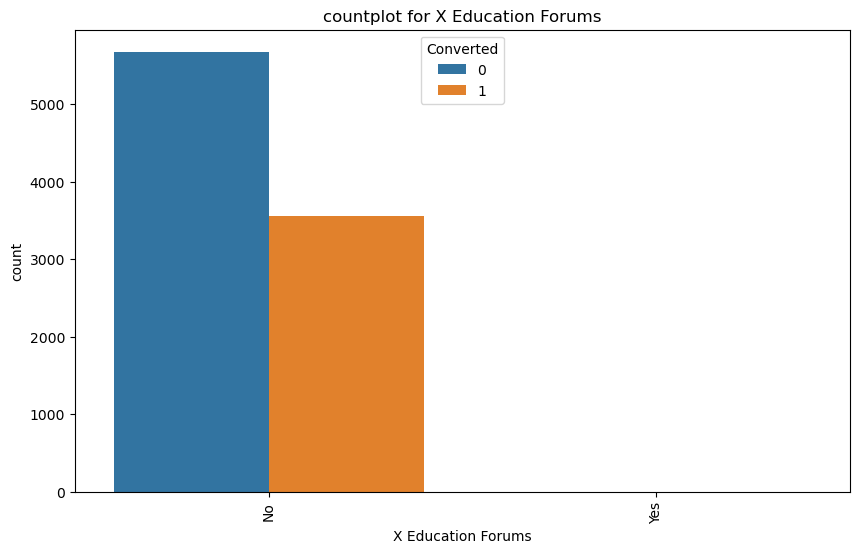

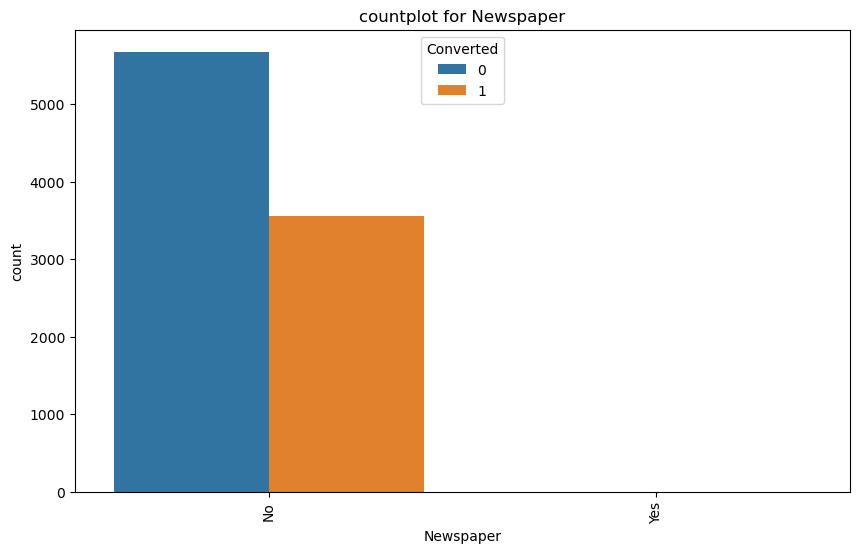

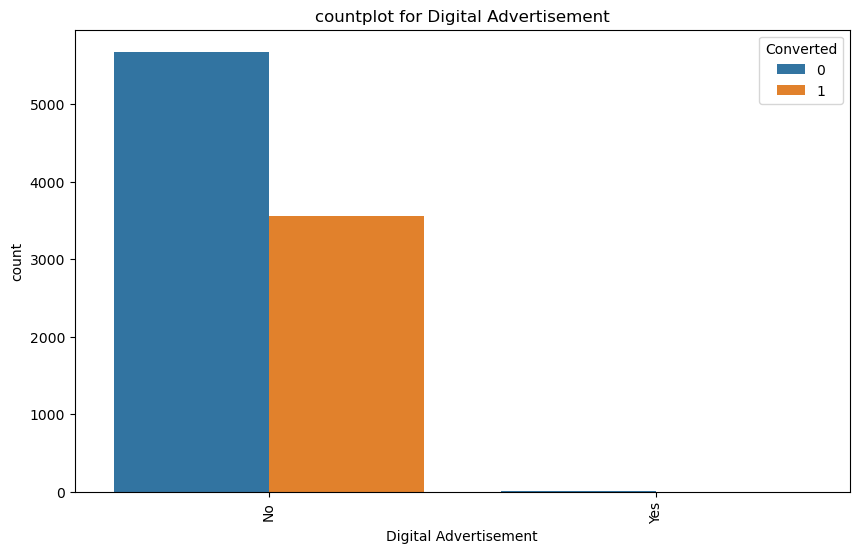

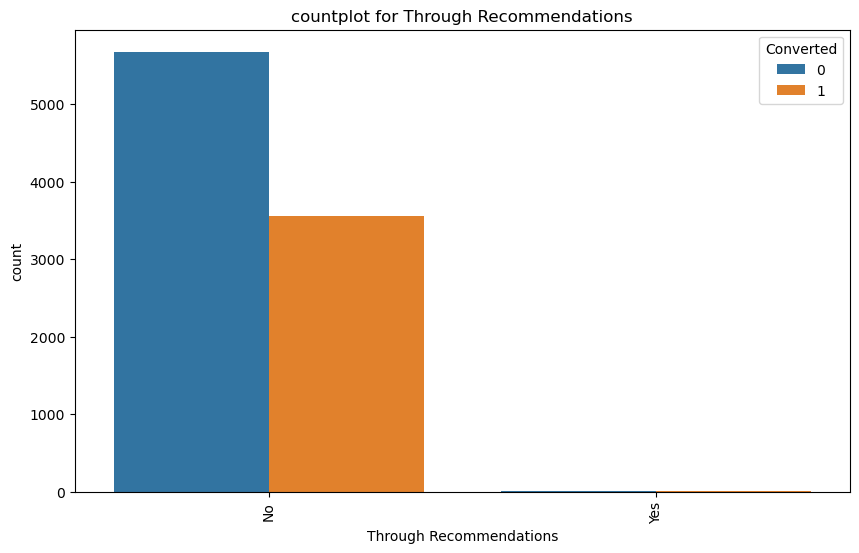

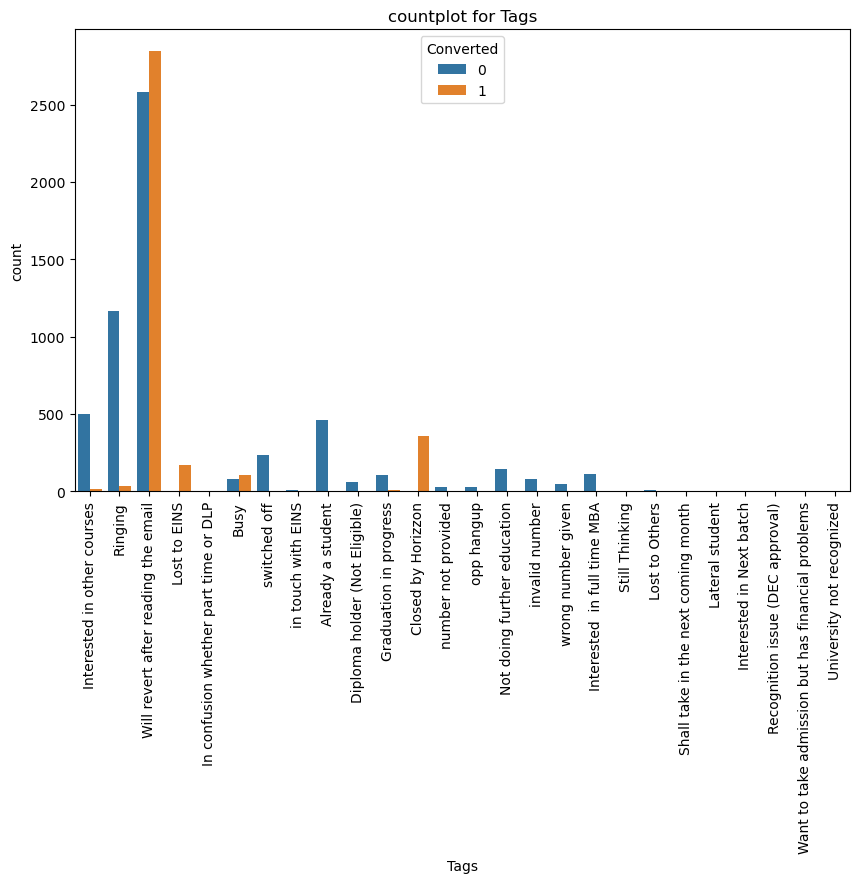

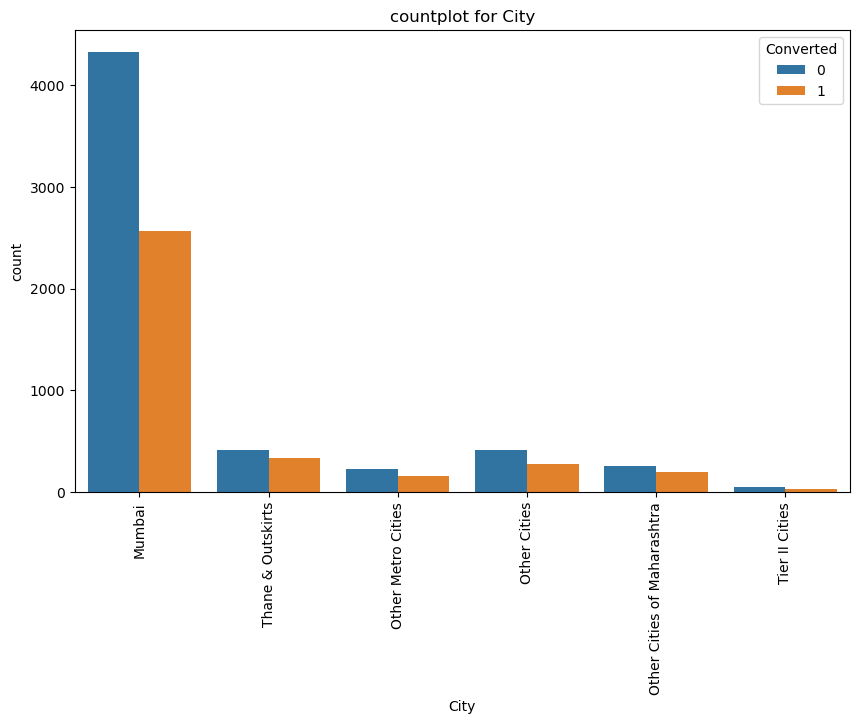

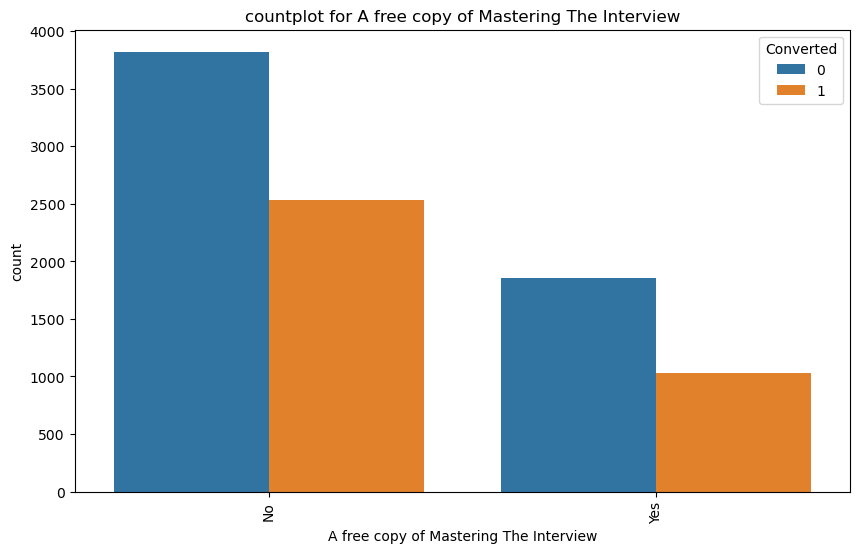

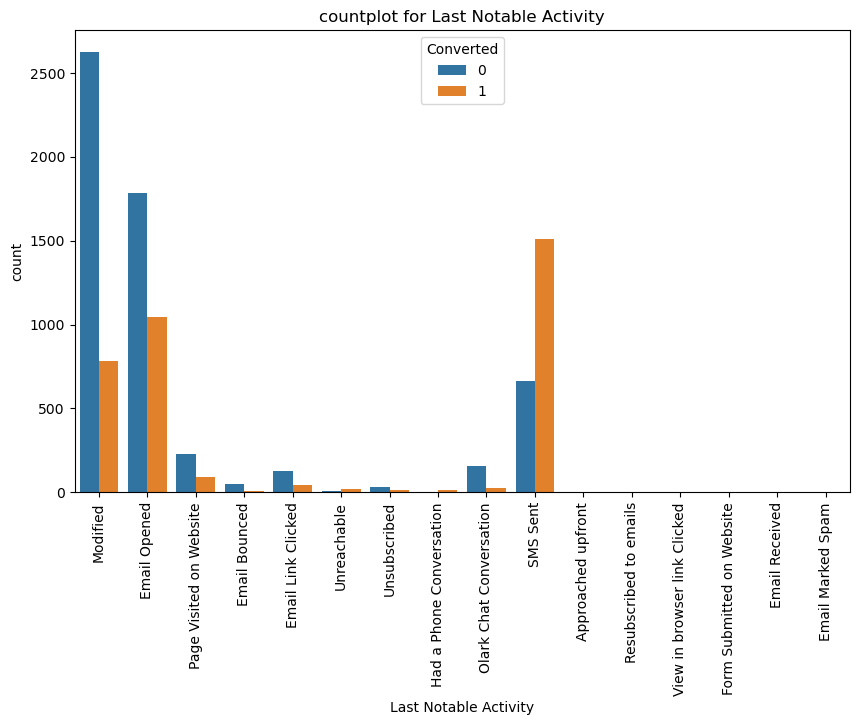

In [38]:
for k in cat:
    plt.figure(figsize=(10,6))
    sns.countplot(lead[k], hue=lead['Converted'])
    plt.xticks(rotation=90)
    plt.title('countplot for '+k)
    plt.show()

From categorcal value analysis we can see some categorical columns are highly skewed which needs to be removed from the data.
1. Do Not Call
2. What matters most to you in choosing a course
3. Search
4. Newspaper Article
5. X education forums
6. Newspaper
7. Digital Advertisement

#### deleting columns which are highly skewed

In [39]:
skewed_col = ['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement']
lead.drop(skewed_col, axis=1, inplace=True)
lead.shape

(9240, 16)

In [41]:
new_cat=[]
new_num=[]
for i in lead.columns:
    if lead[i].dtype=='object':
        new_cat.append(i)
    else:
        new_num.append(i)

## 5.2 Bivariate Analysis

For bivariate Analysis it is divided into 2 parts.
1. Categorical vs Numerical
2. Numerical vs Numerical

and used Target column as hue for better understanding and viusualization

### 5.2.1 Categorical vs Numerical

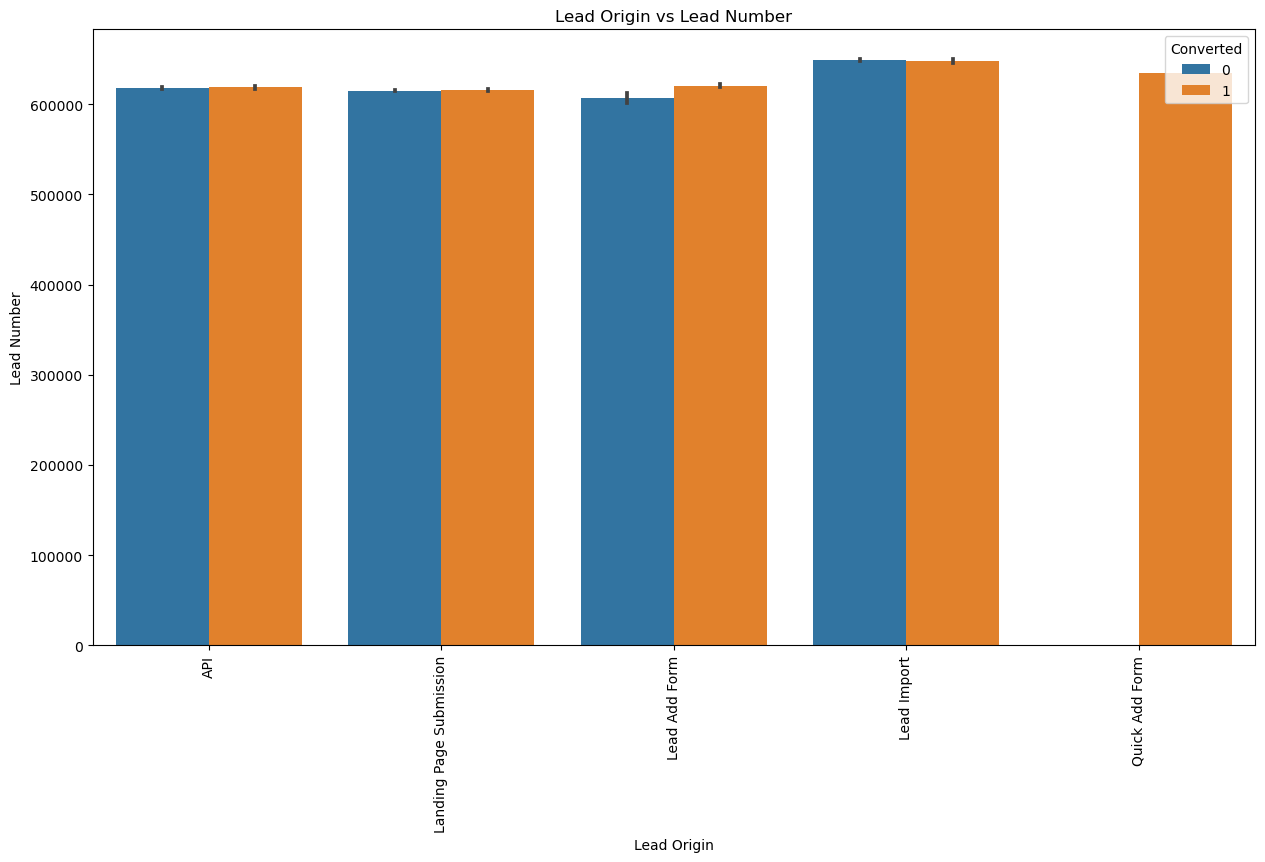

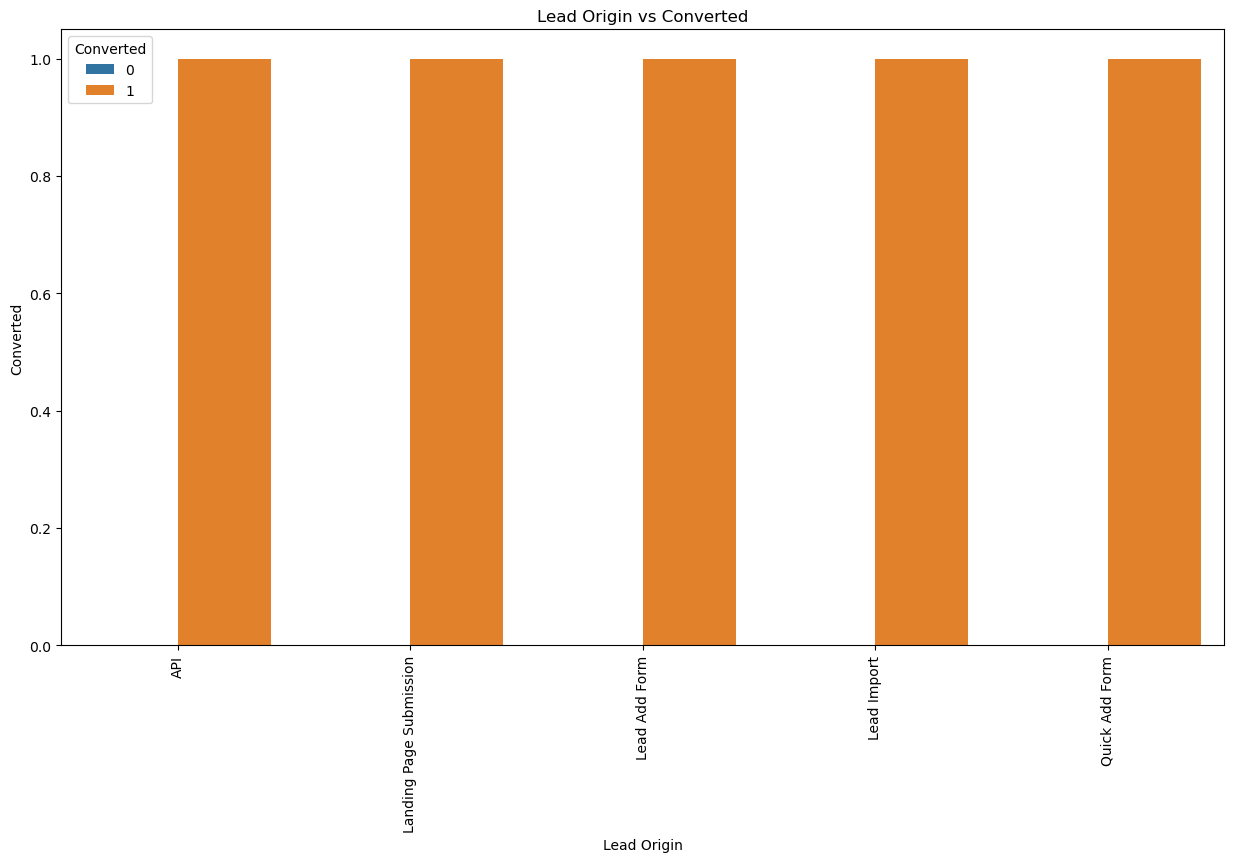

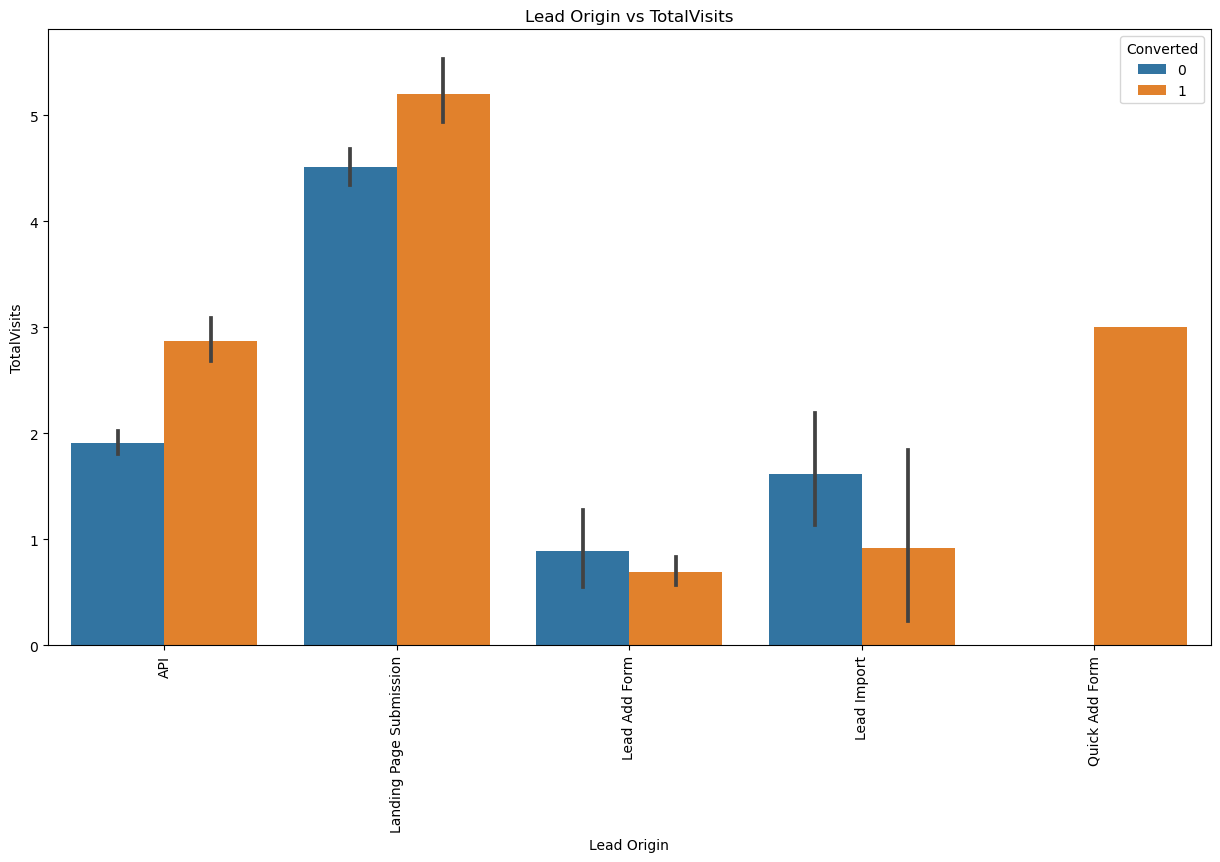

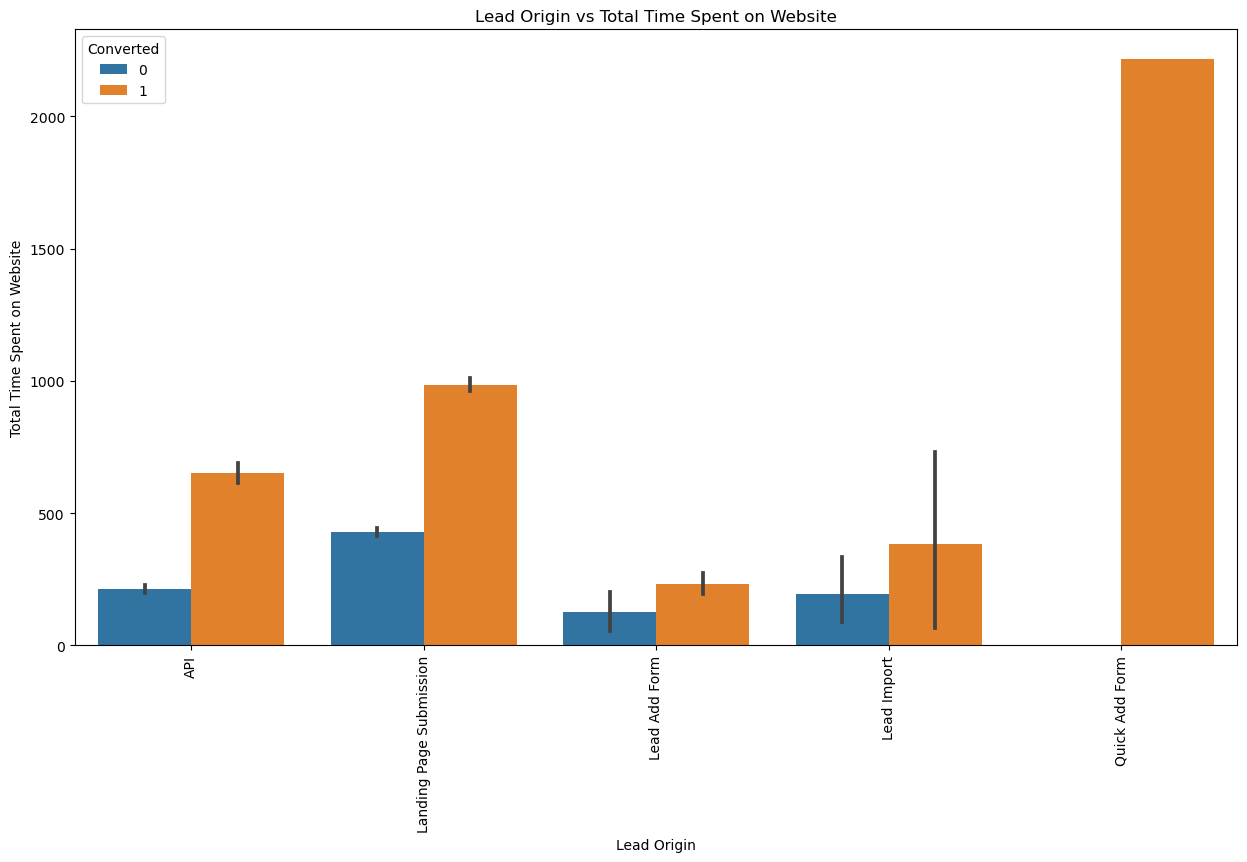

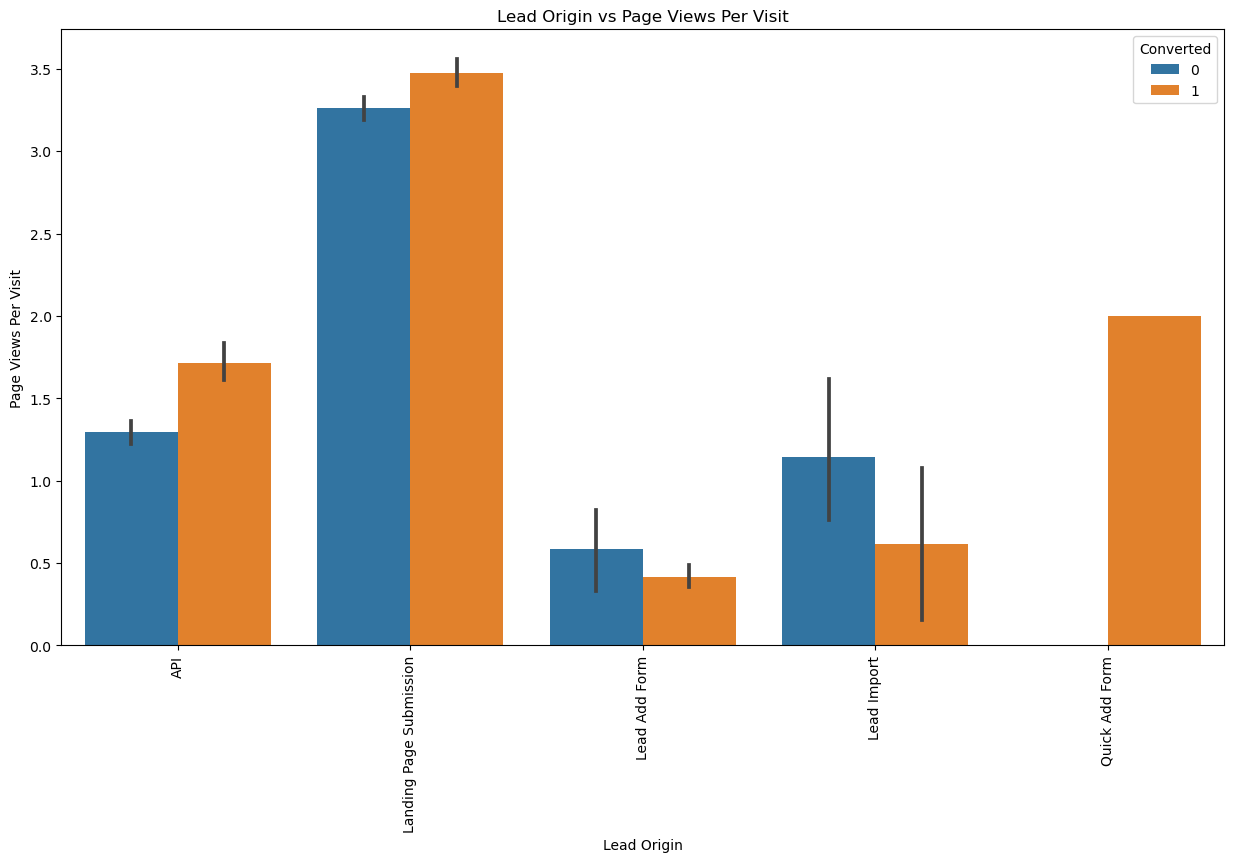

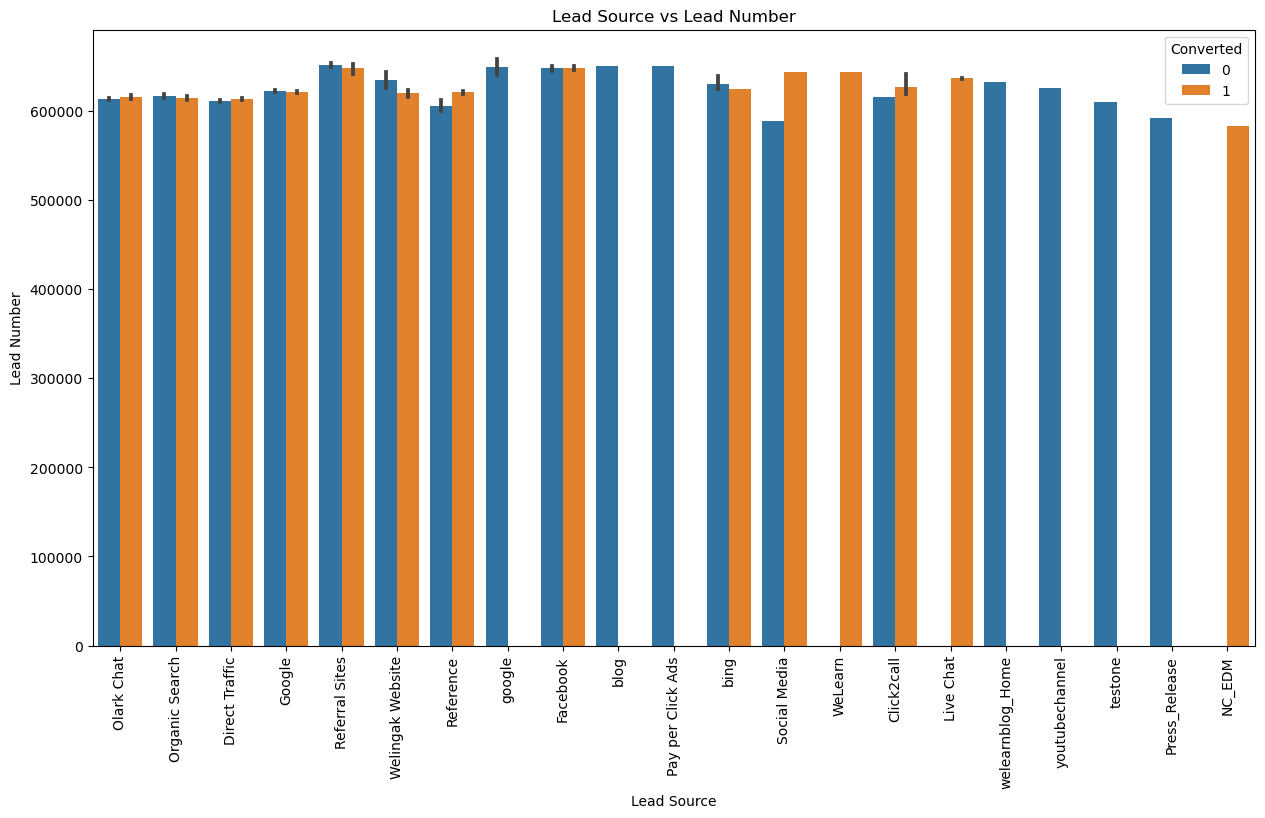

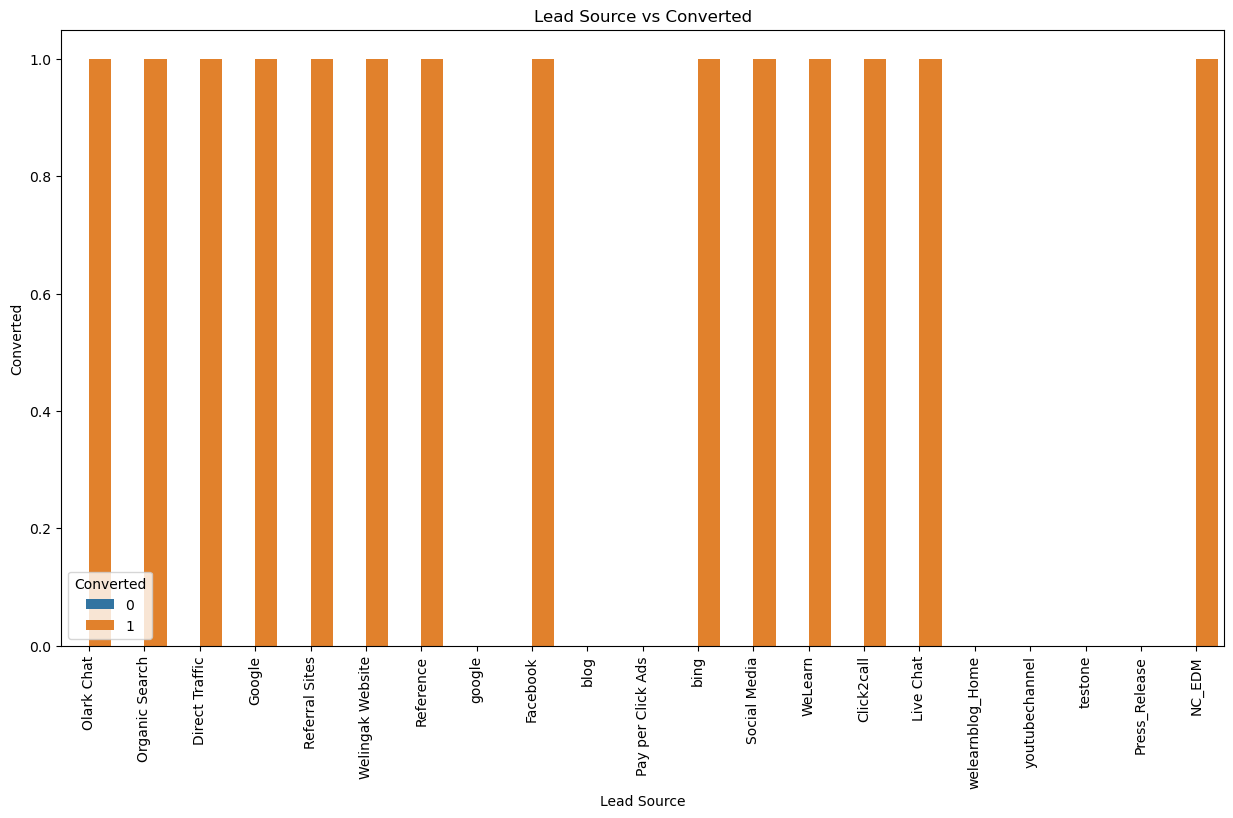

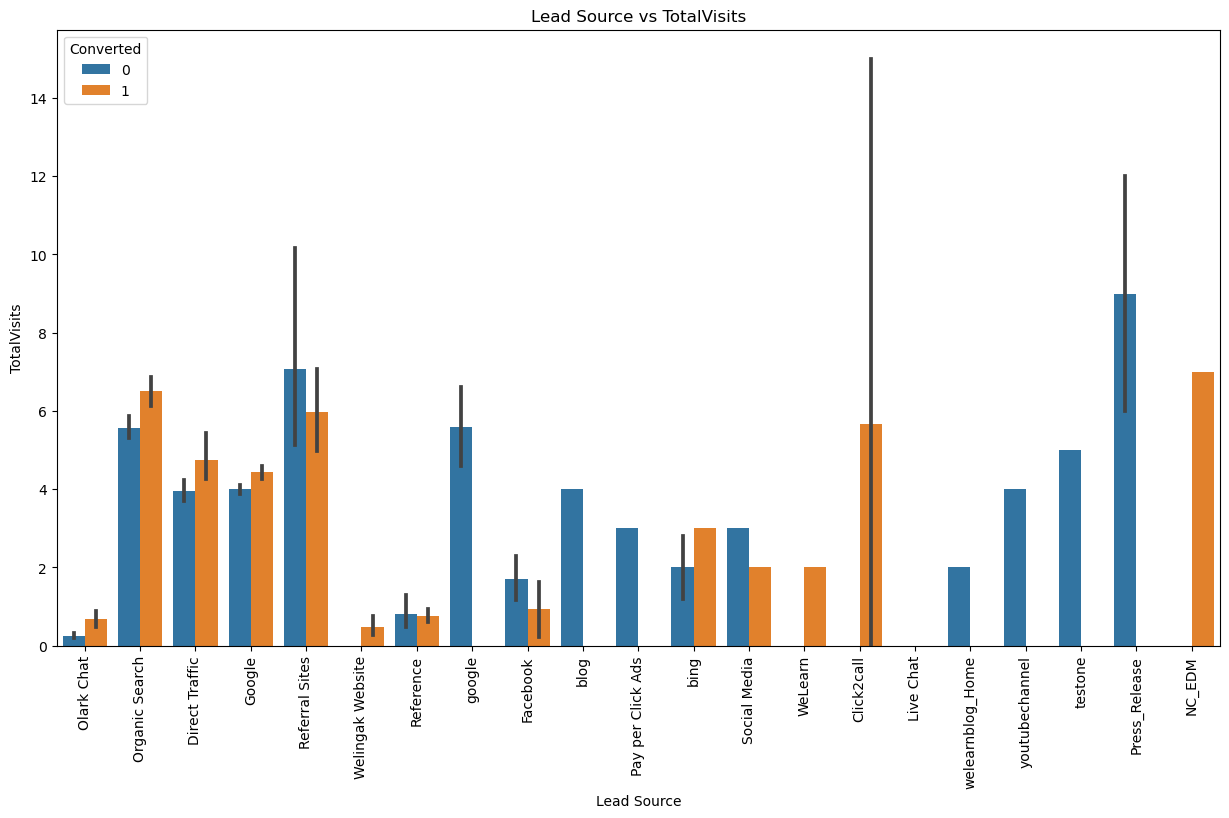

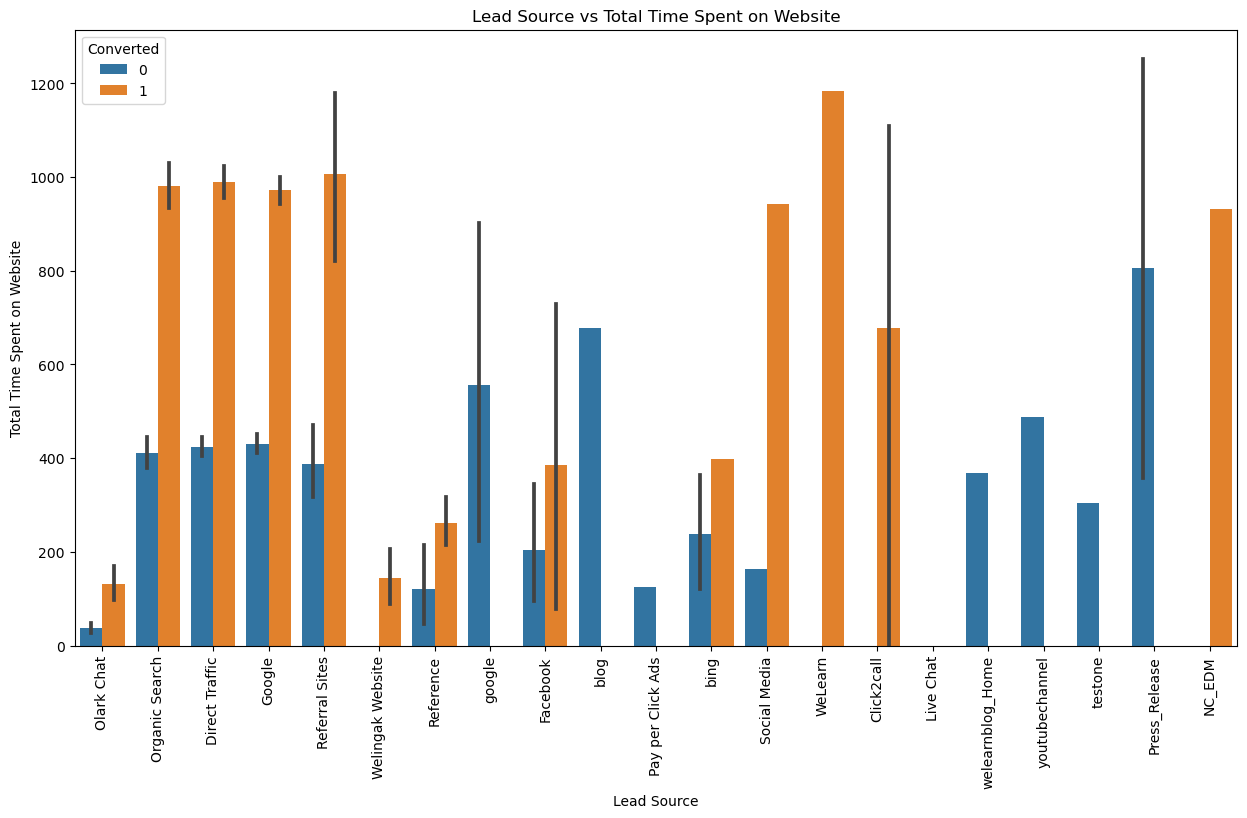

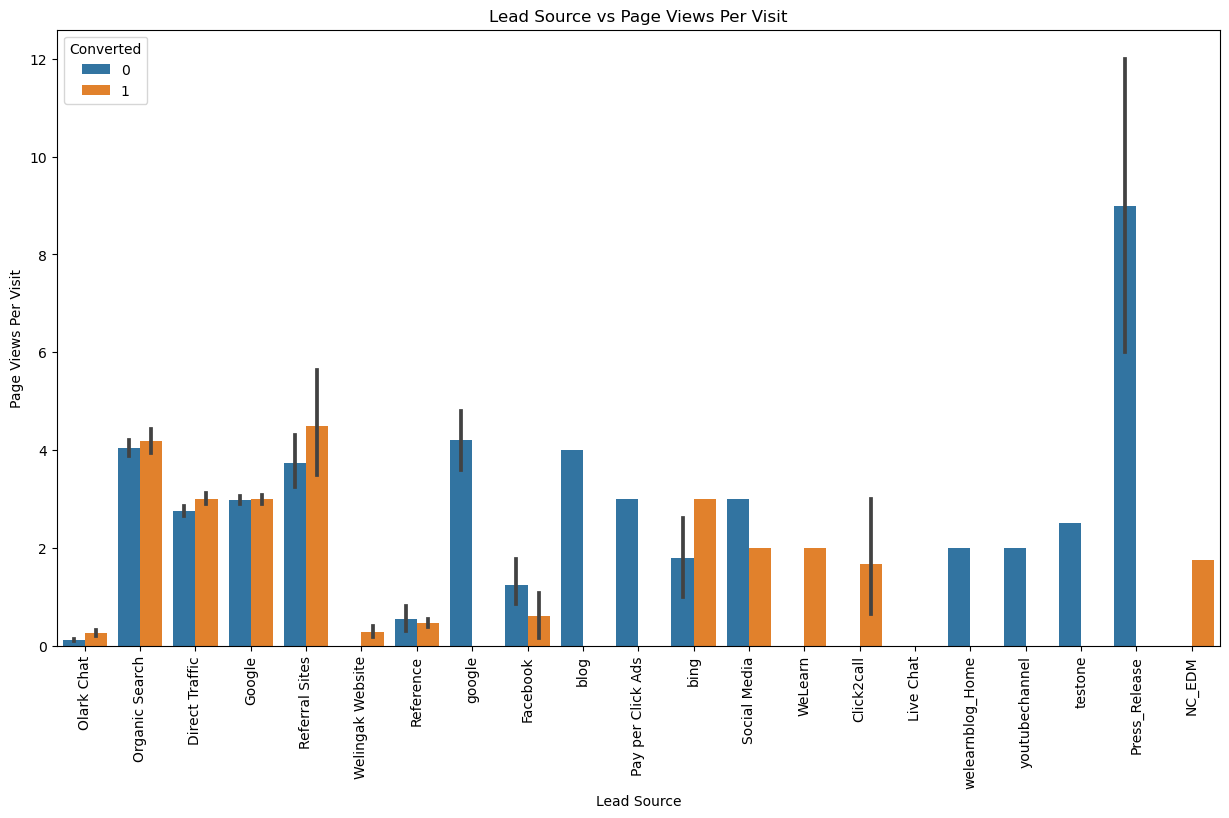

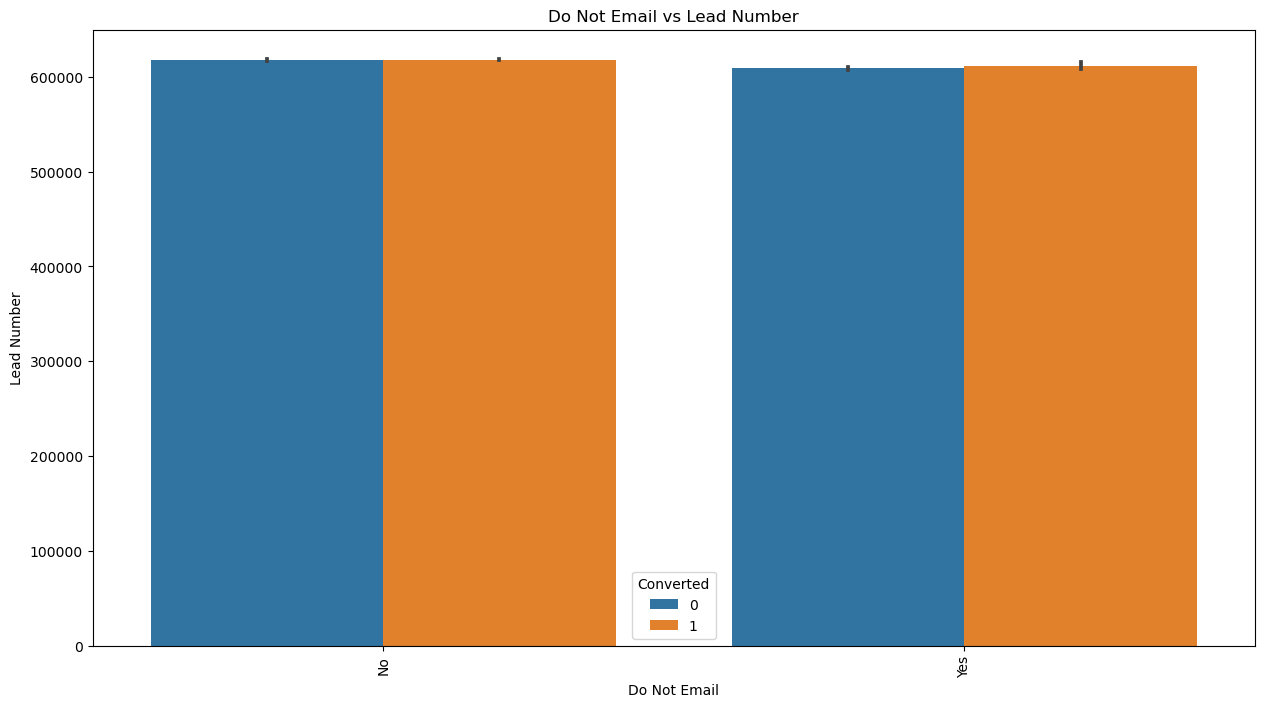

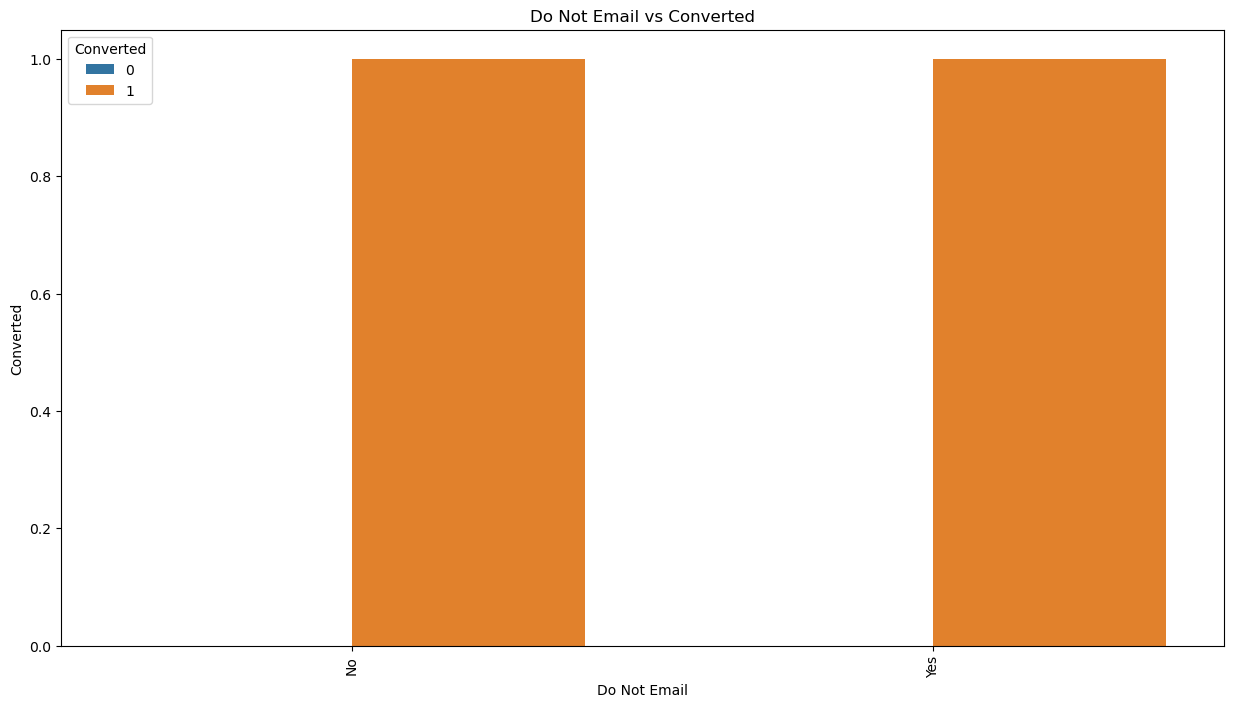

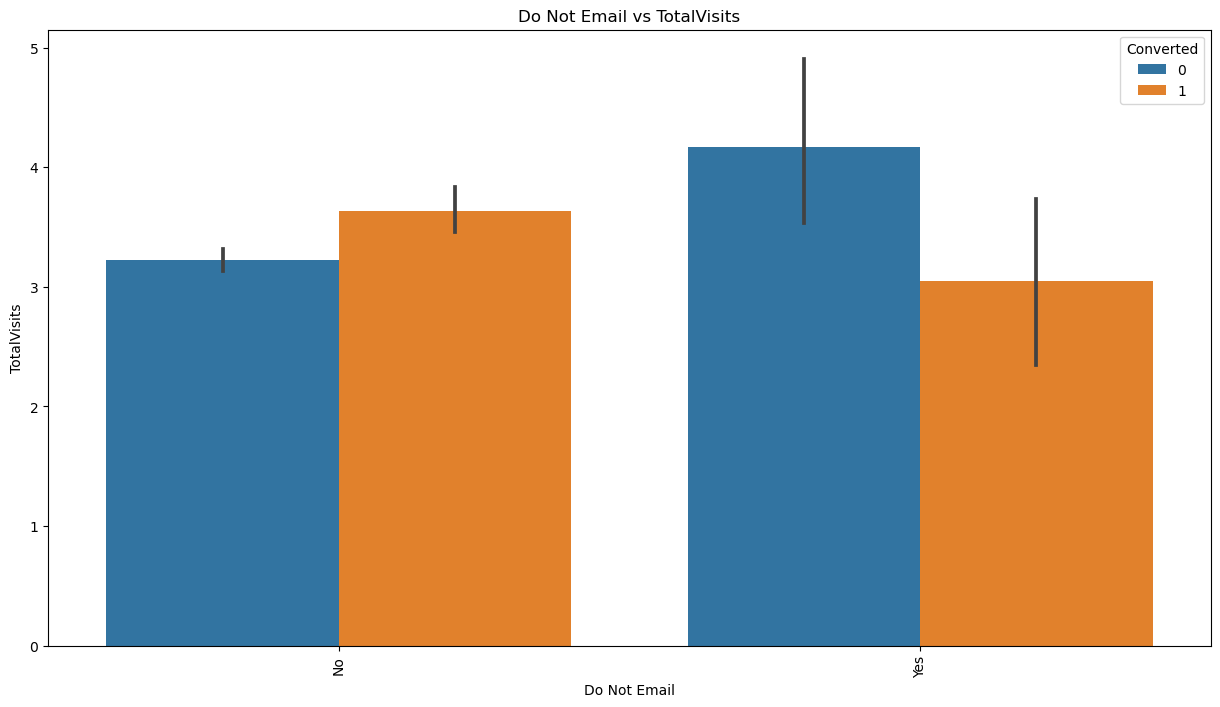

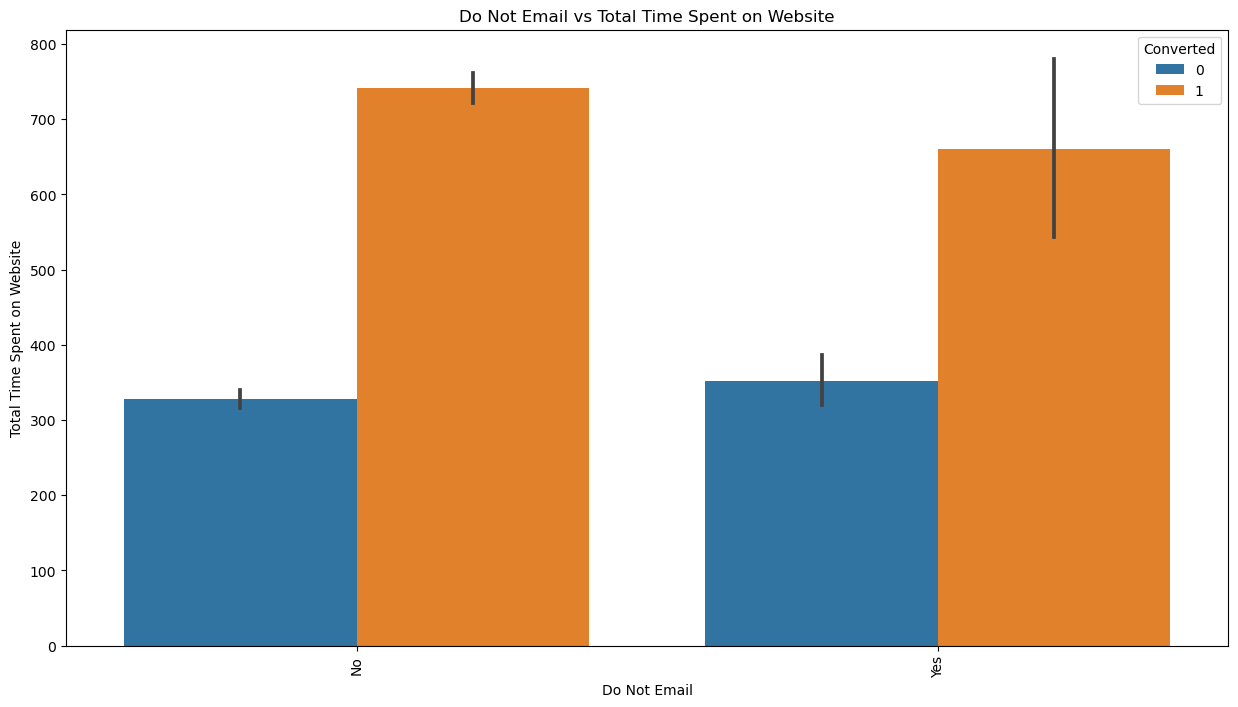

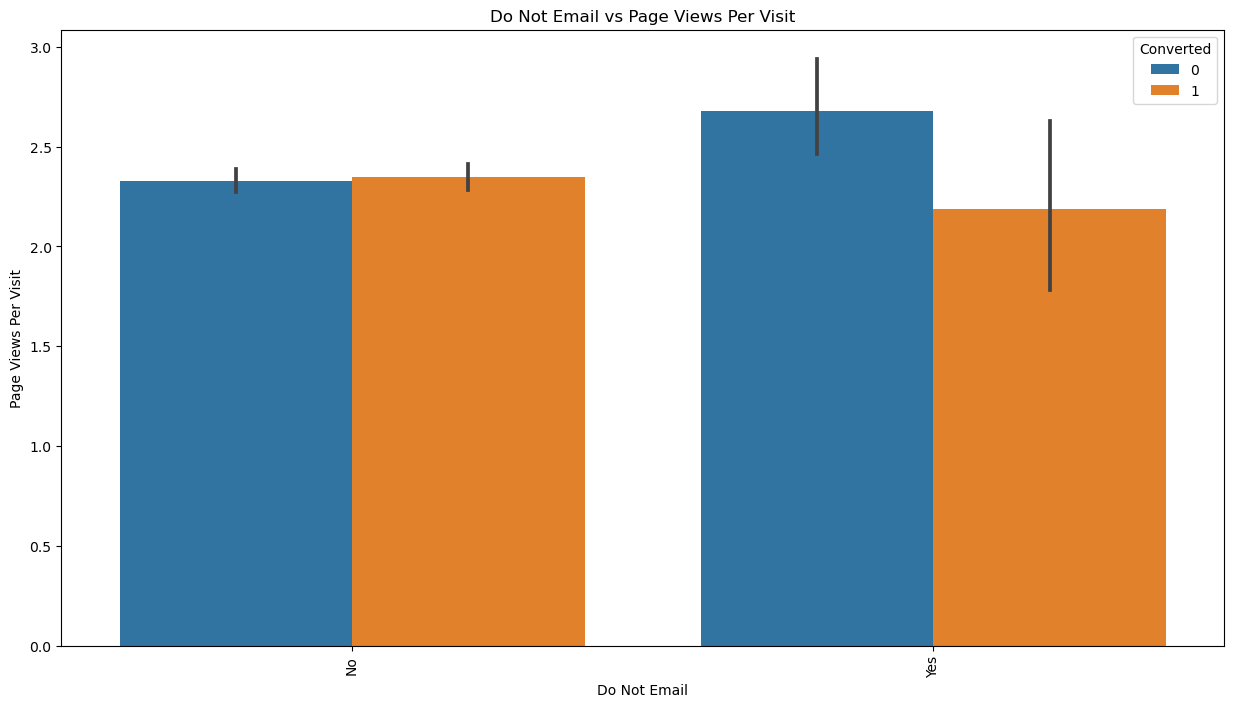

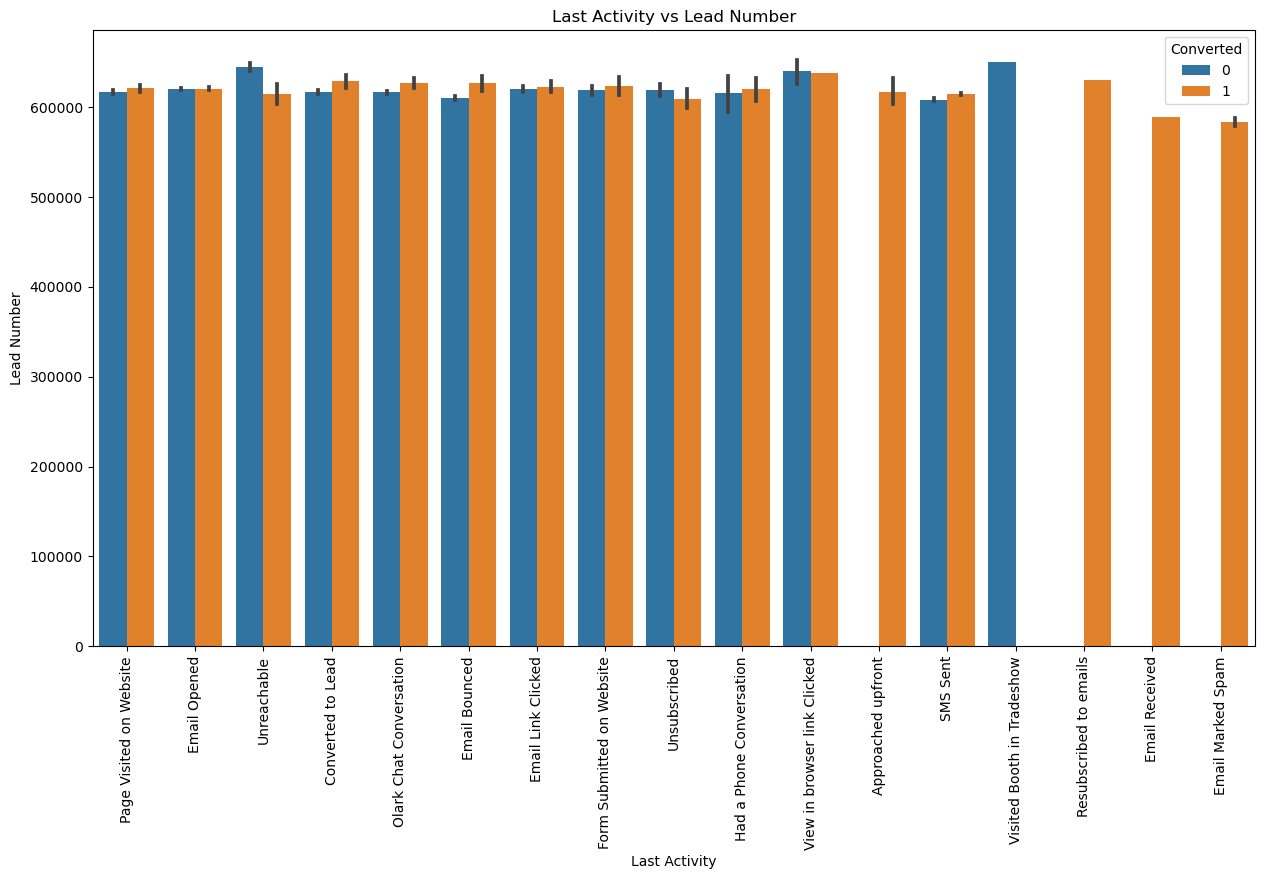

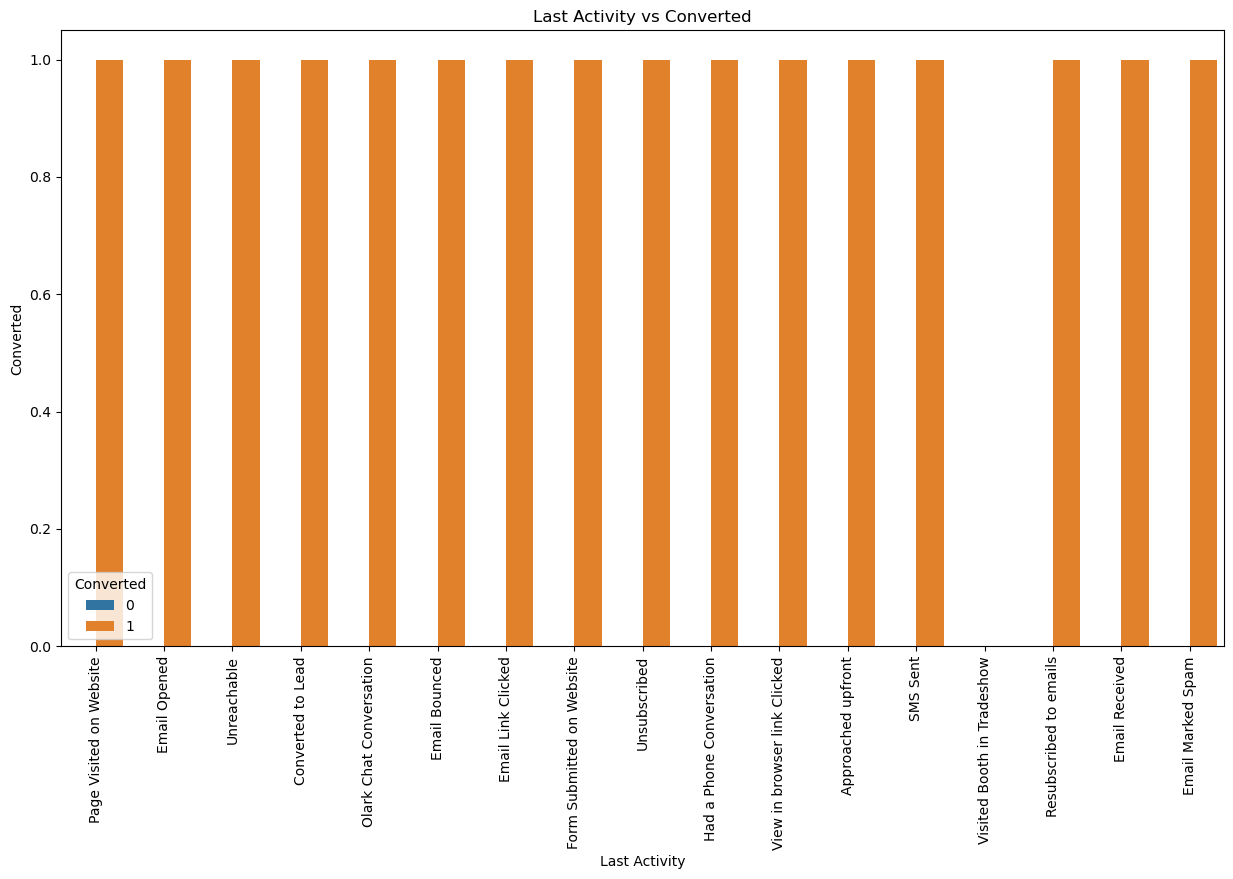

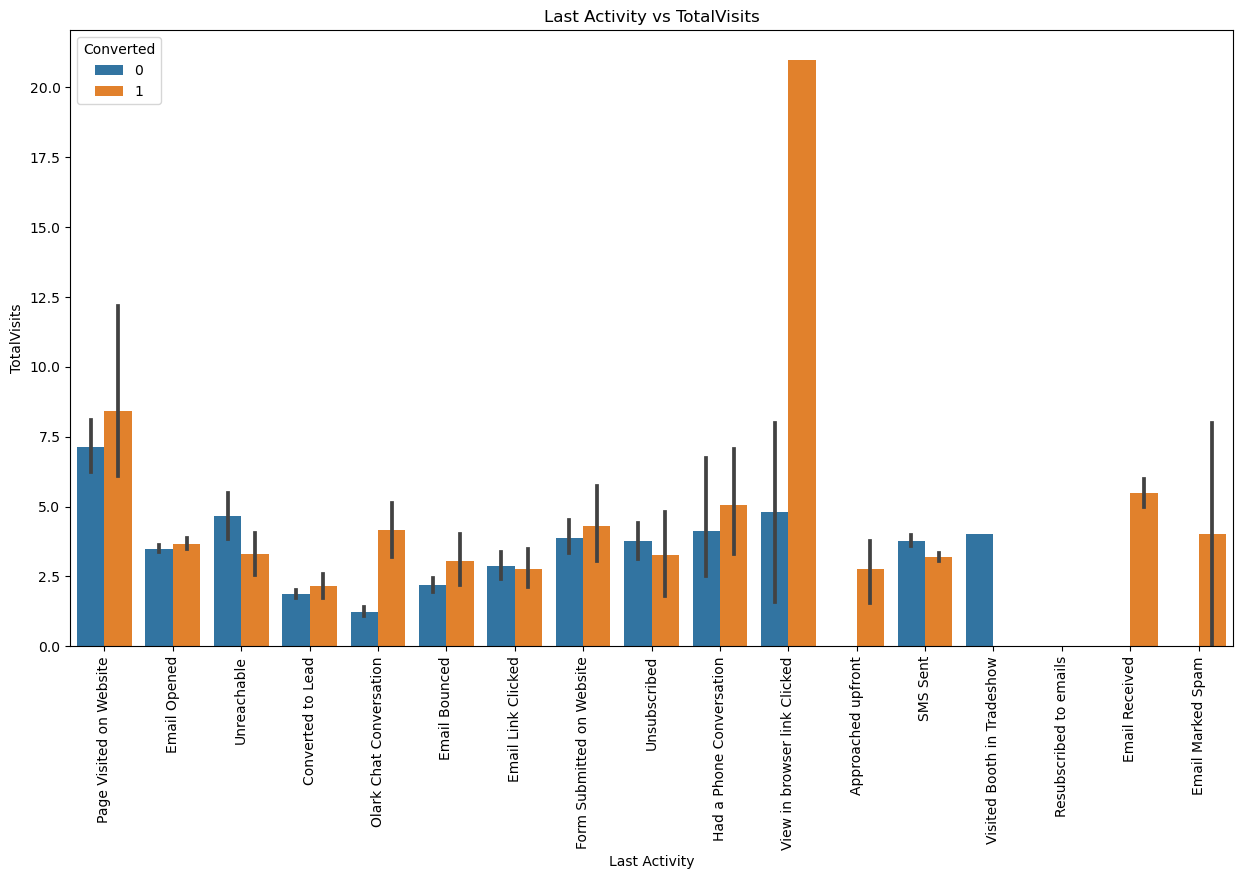

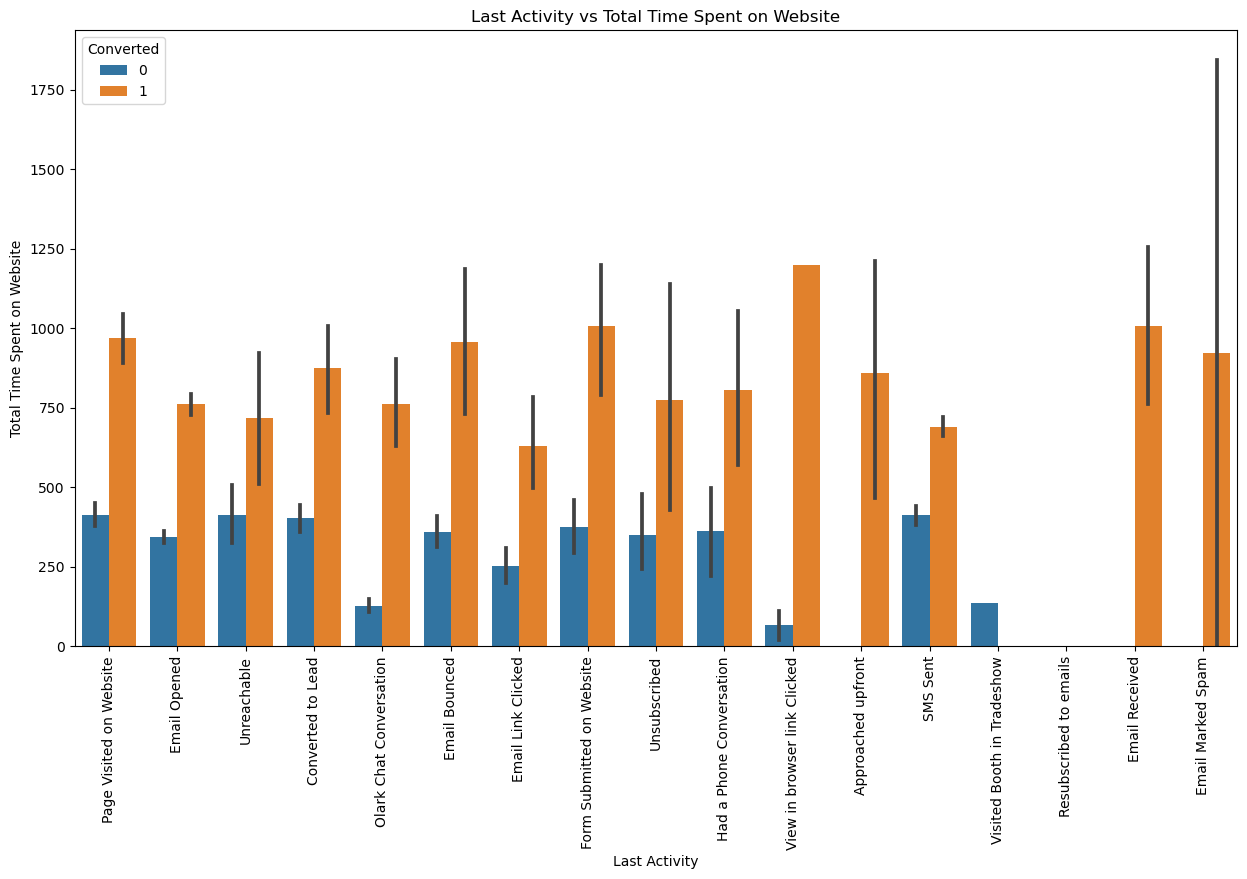

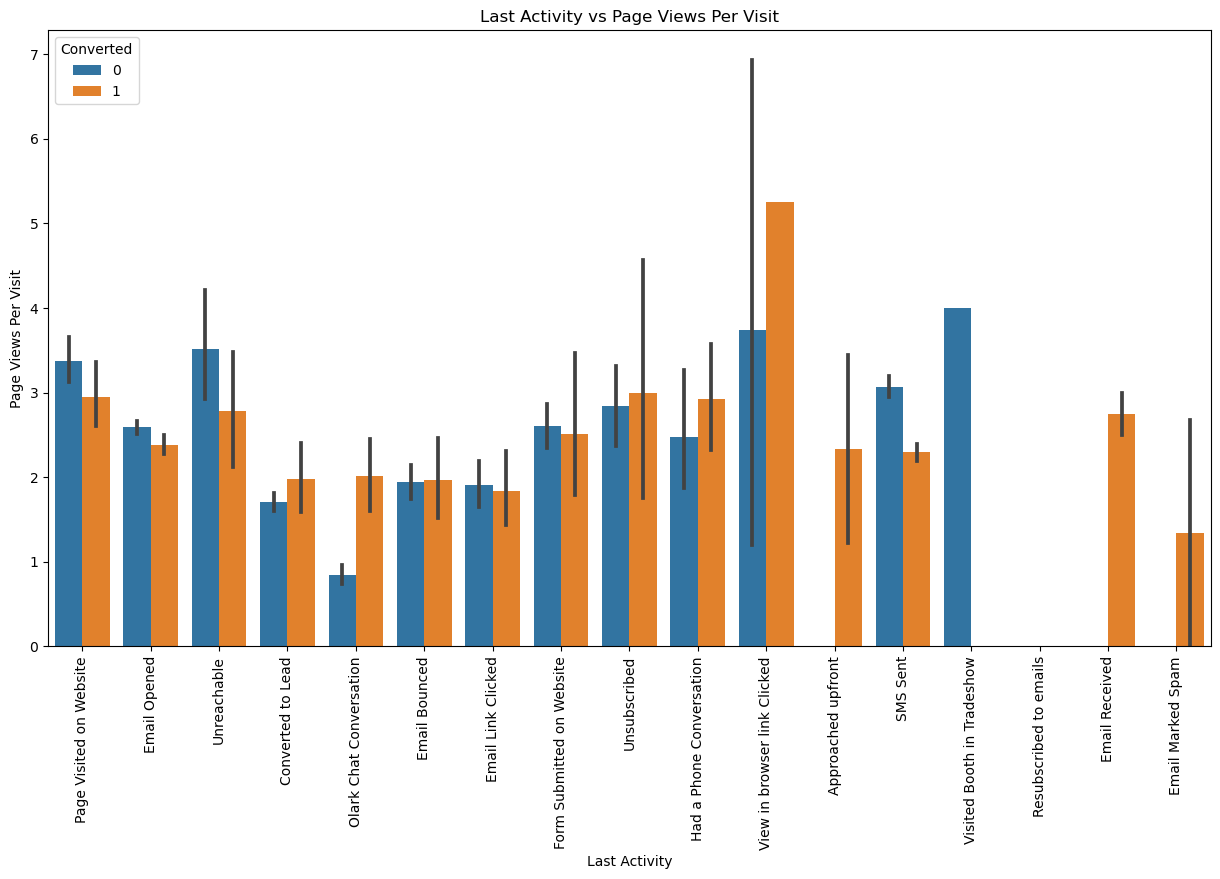

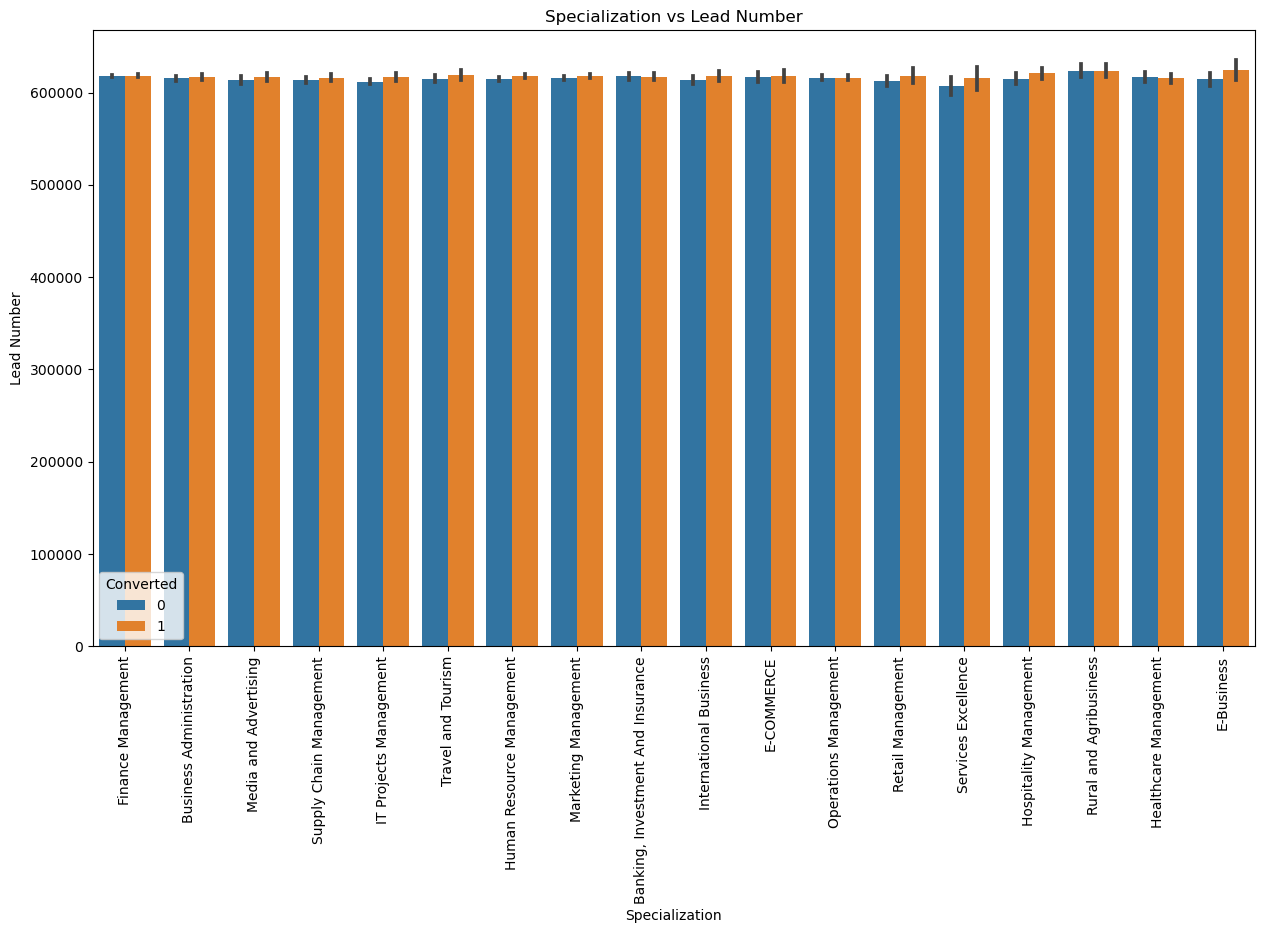

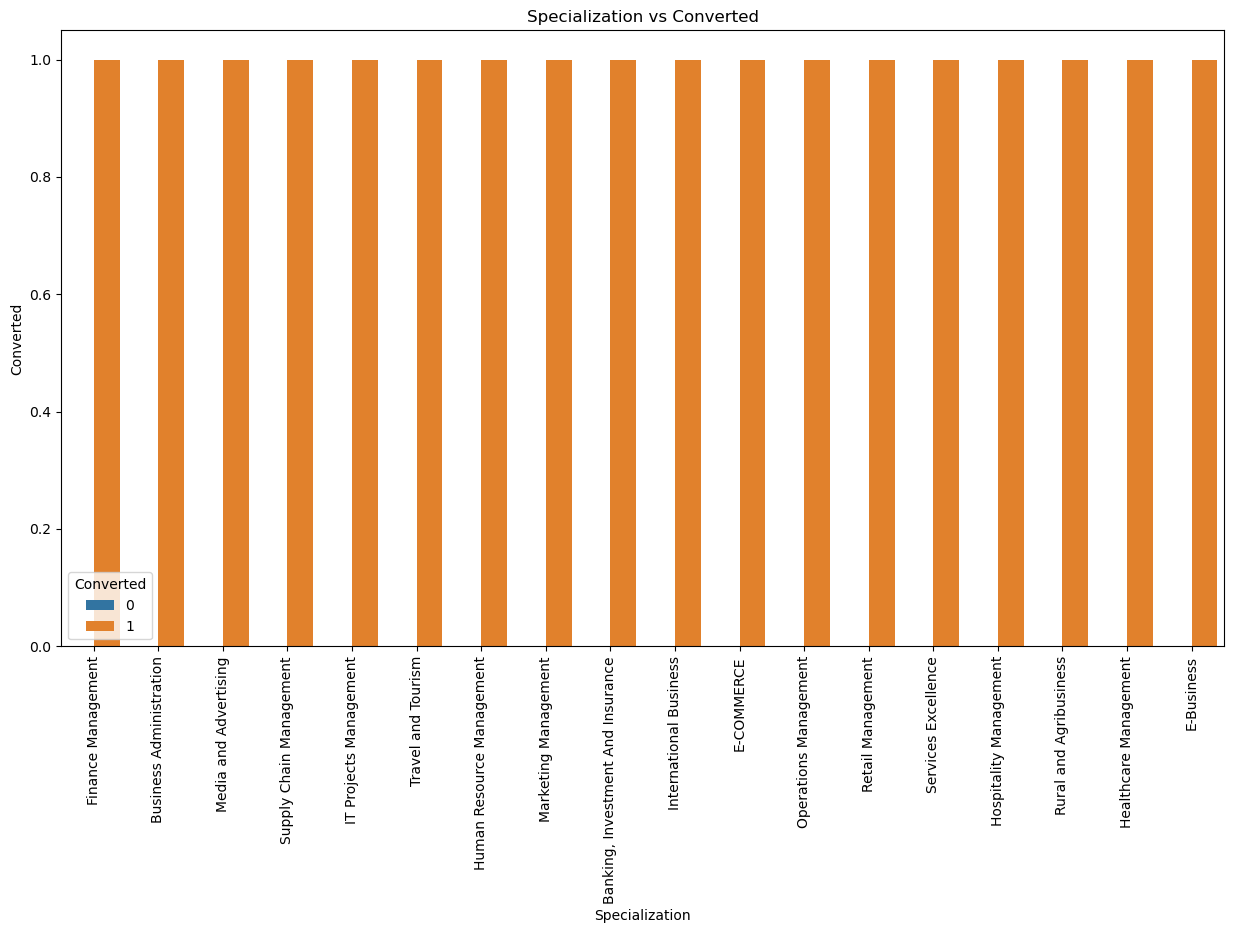

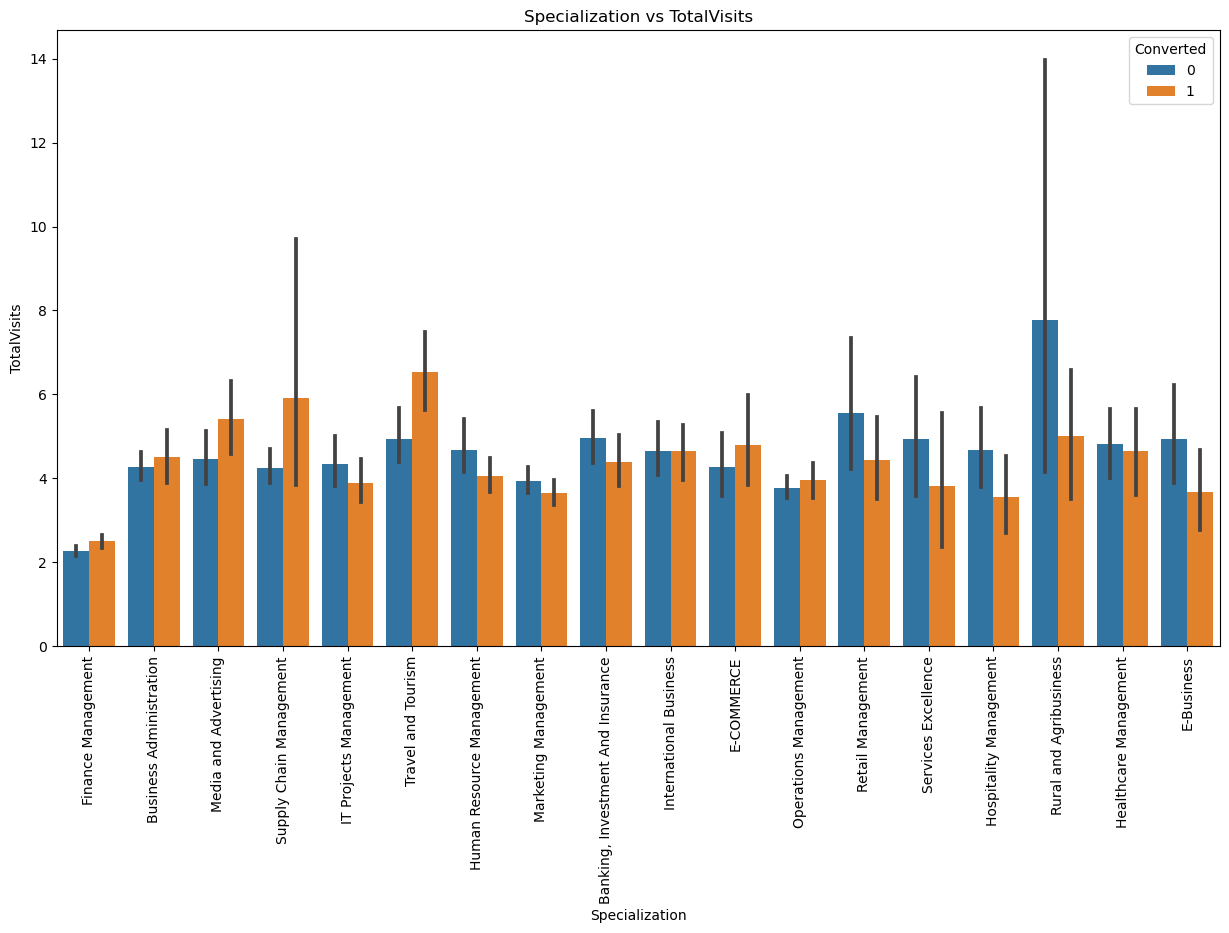

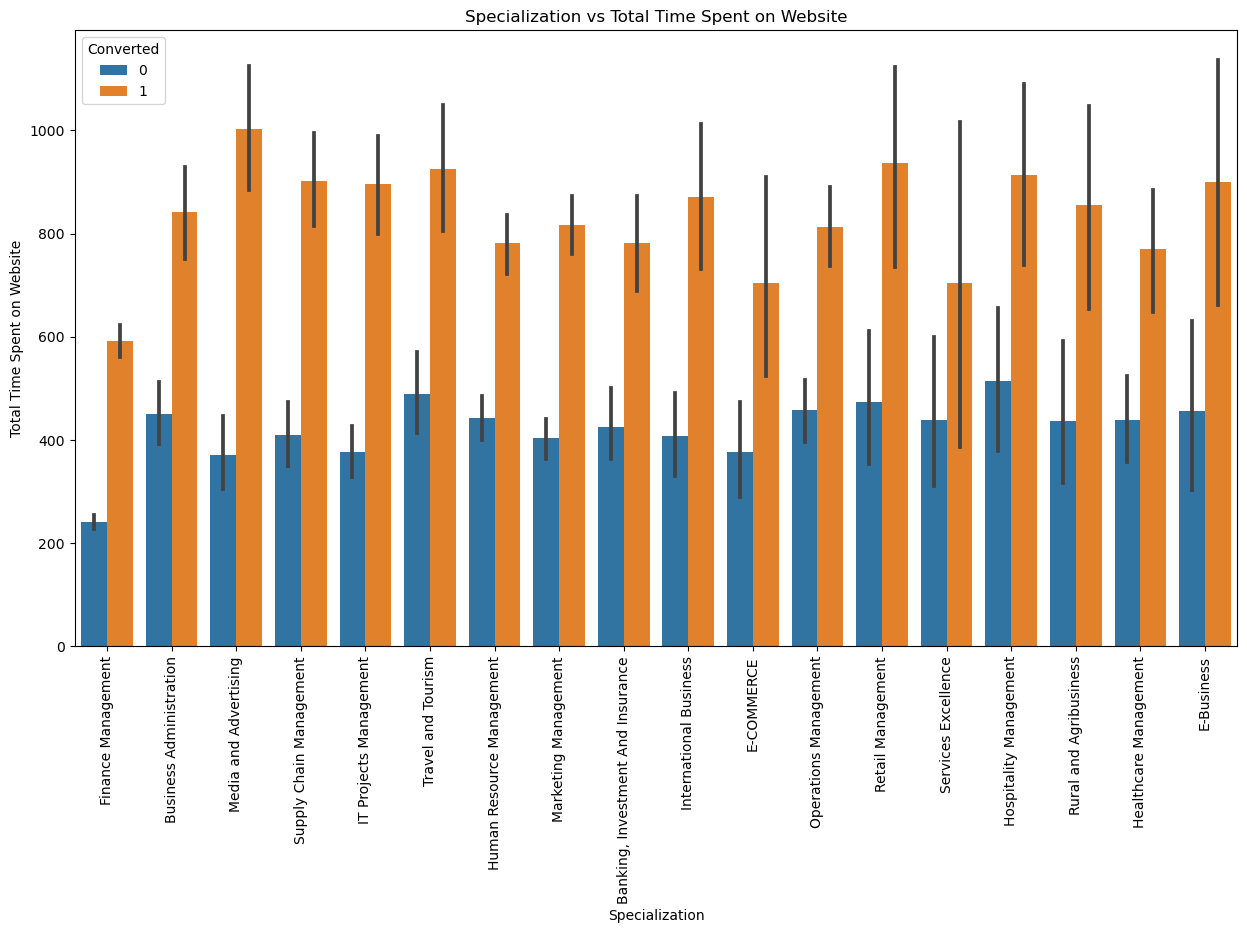

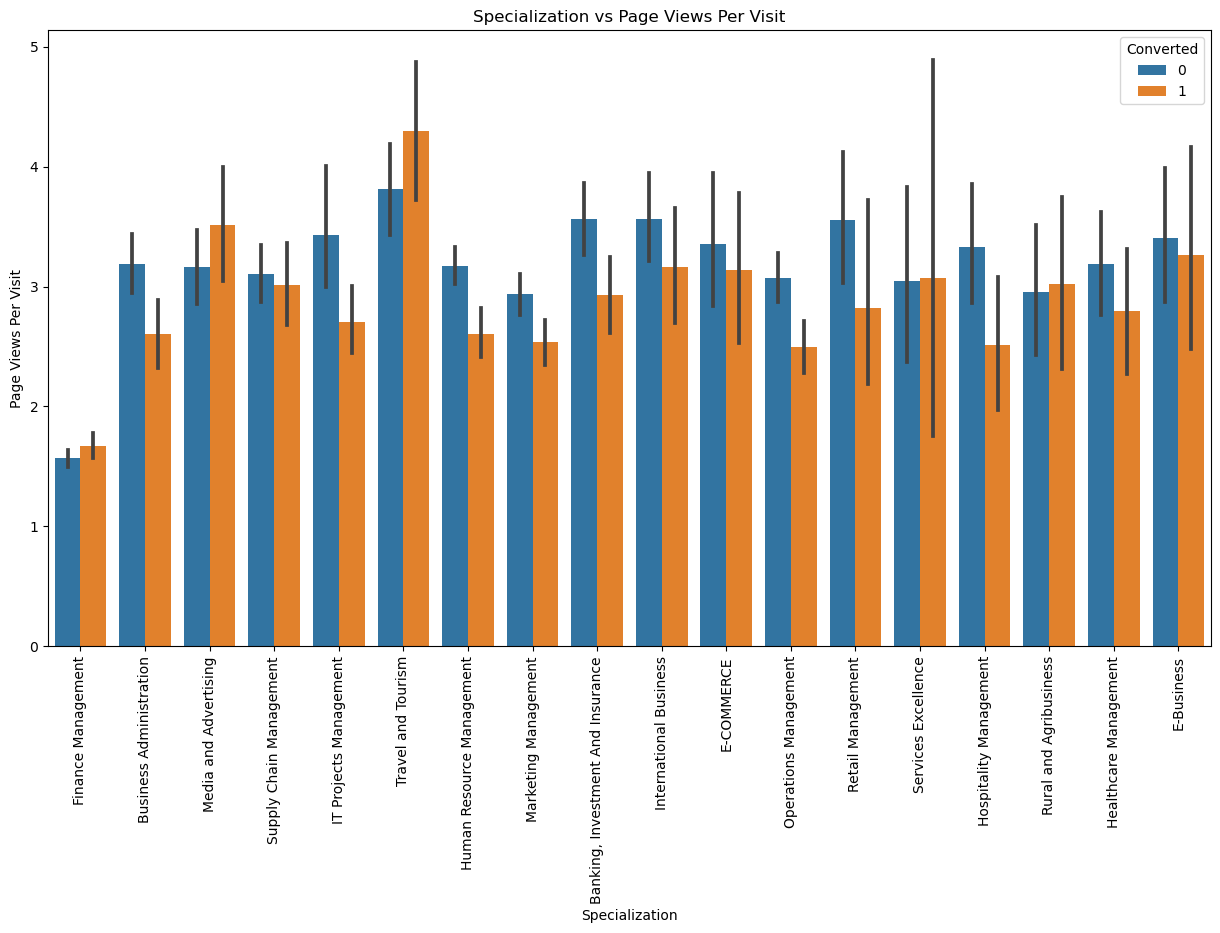

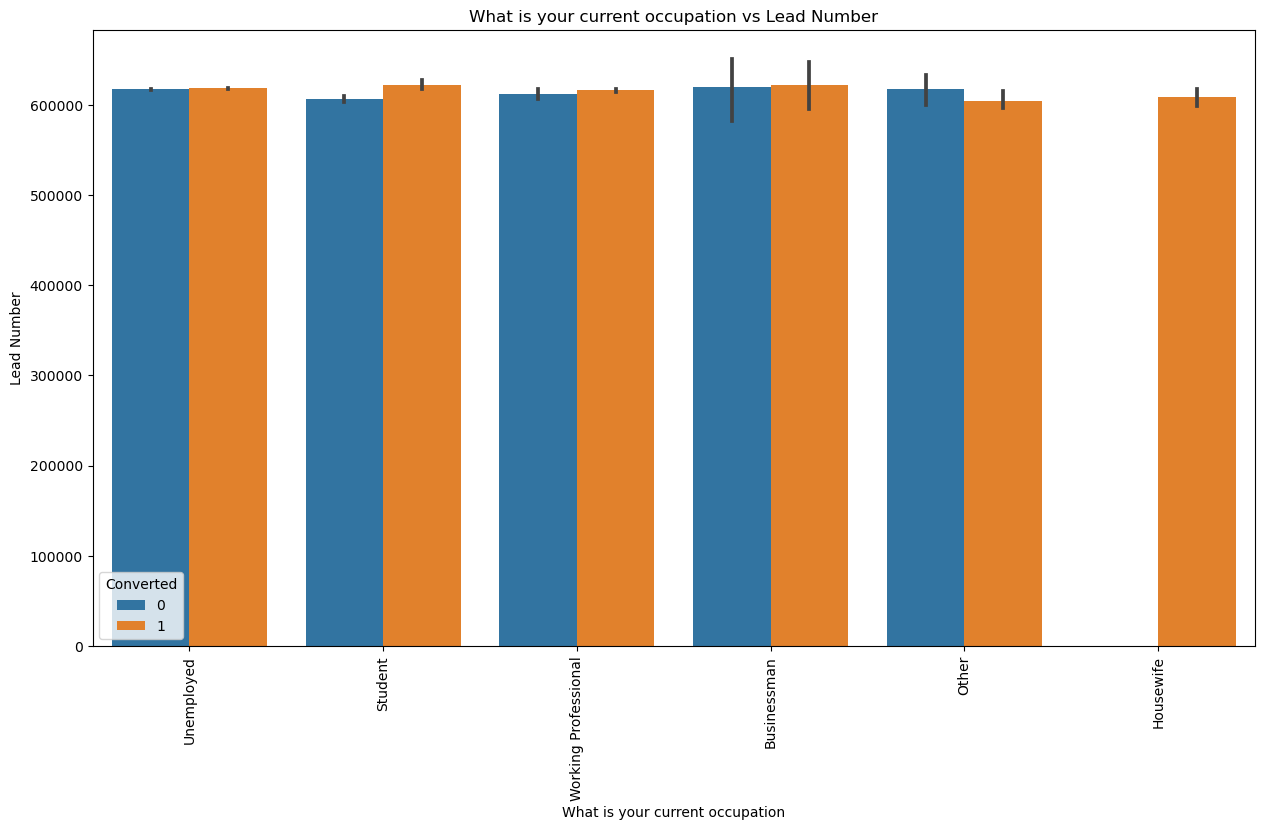

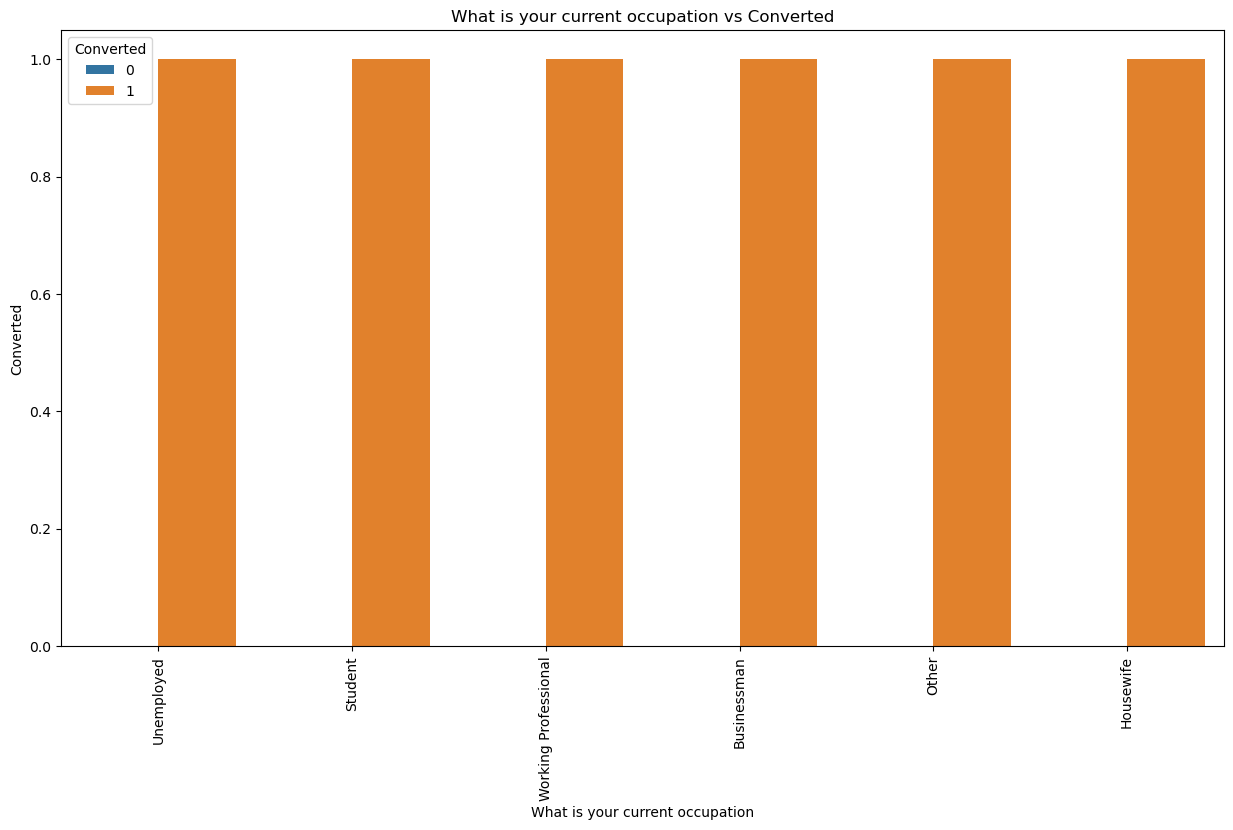

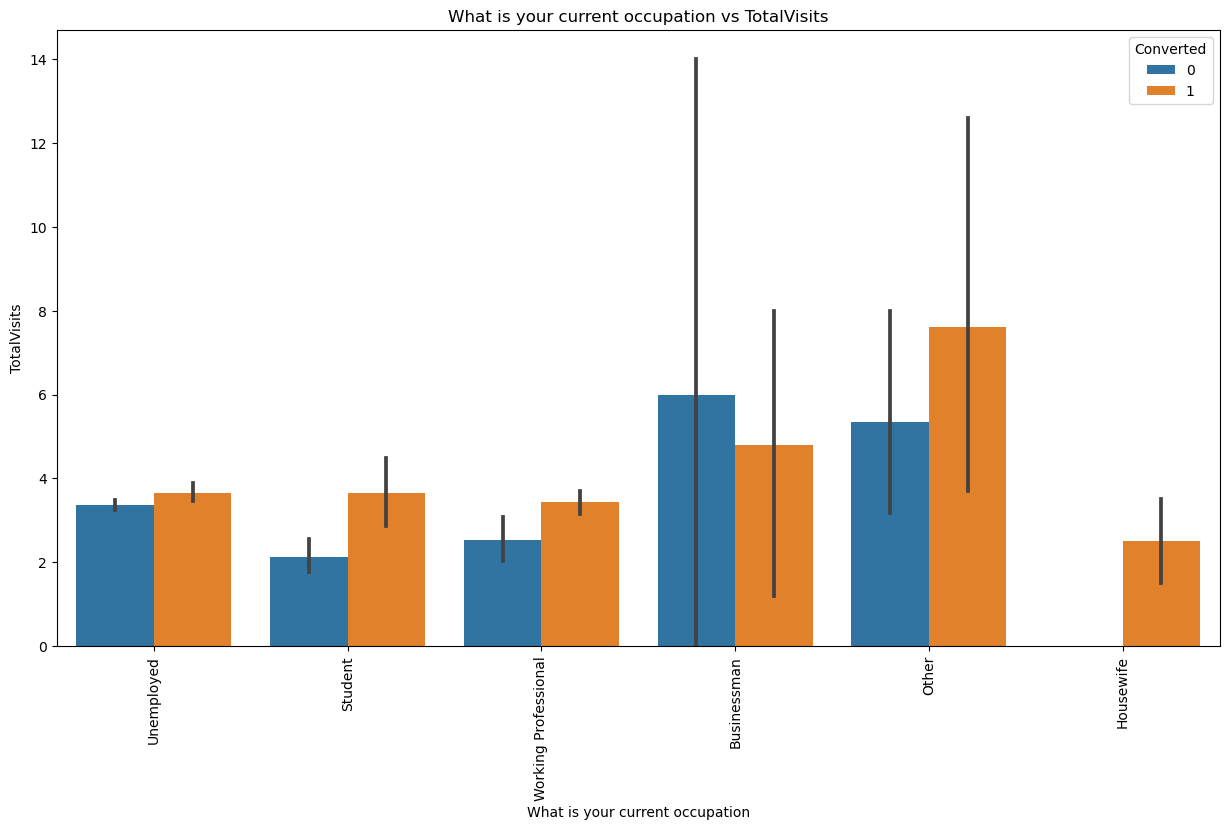

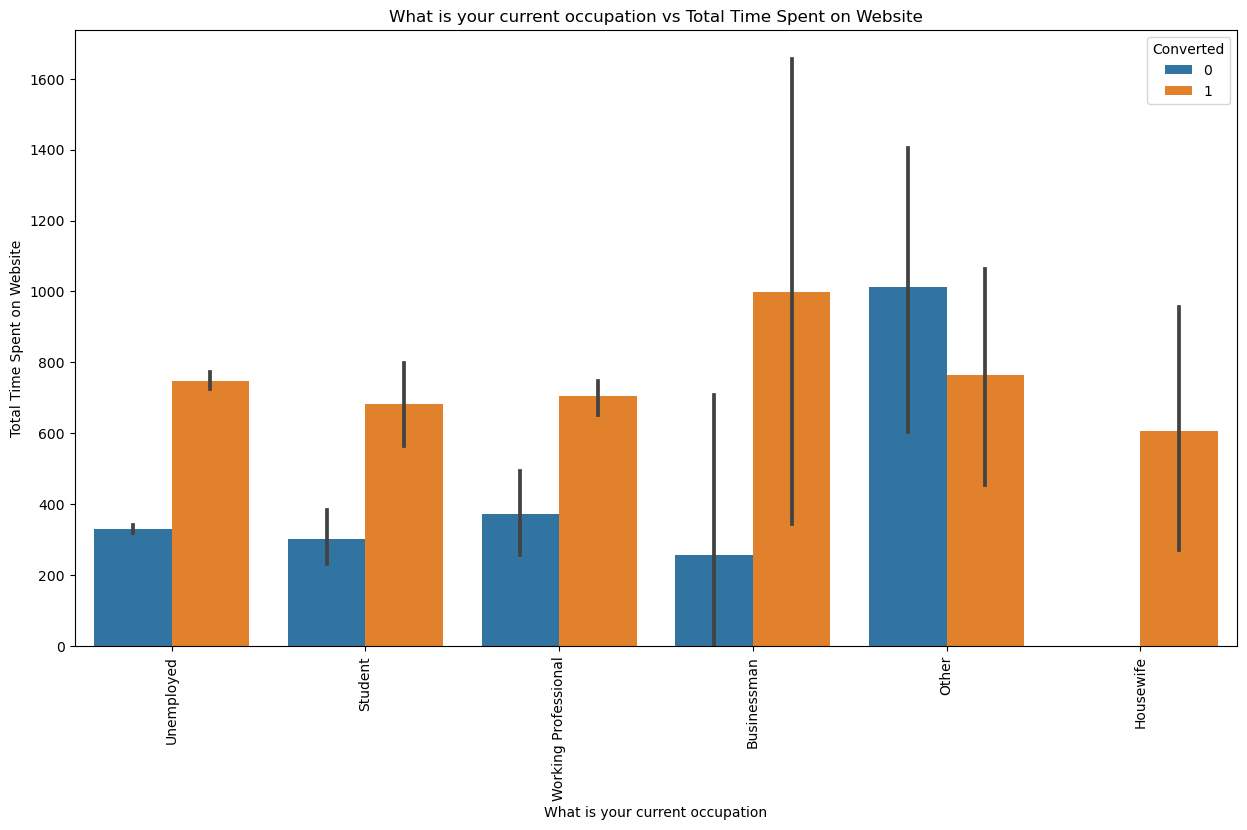

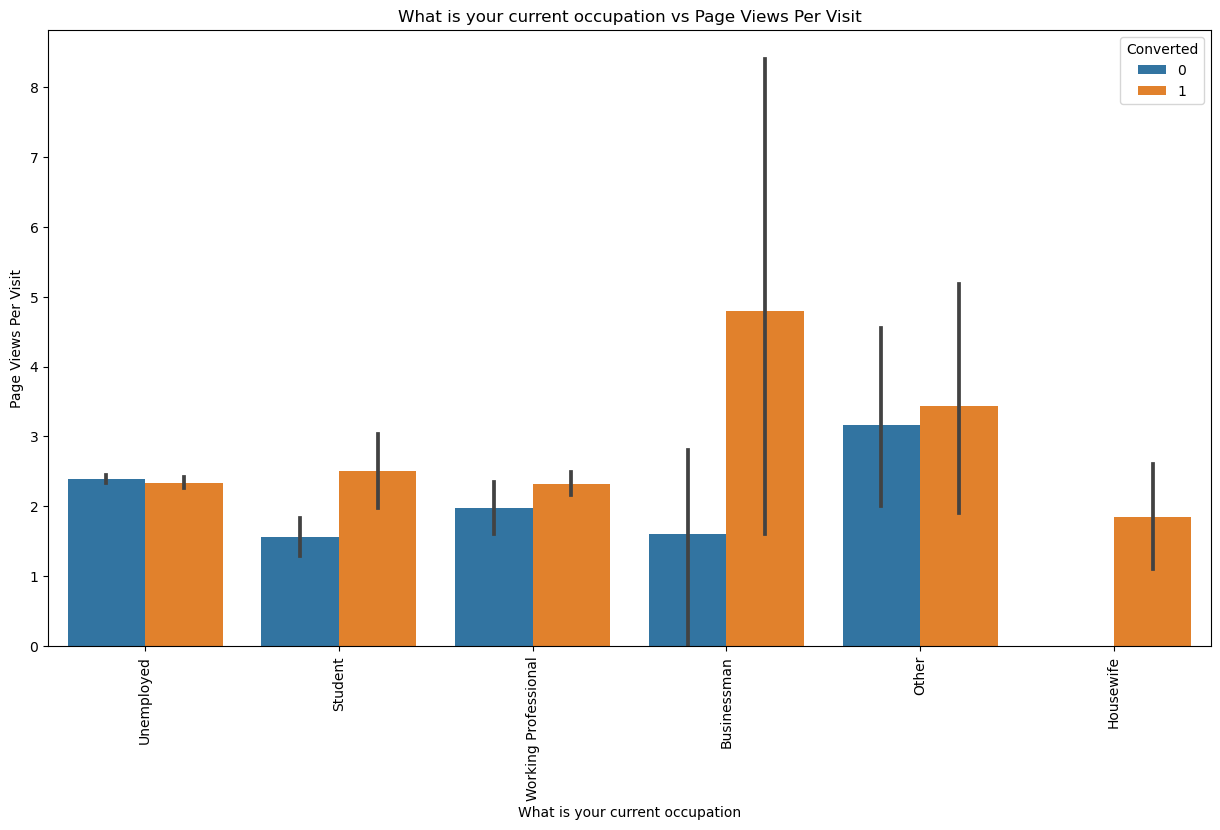

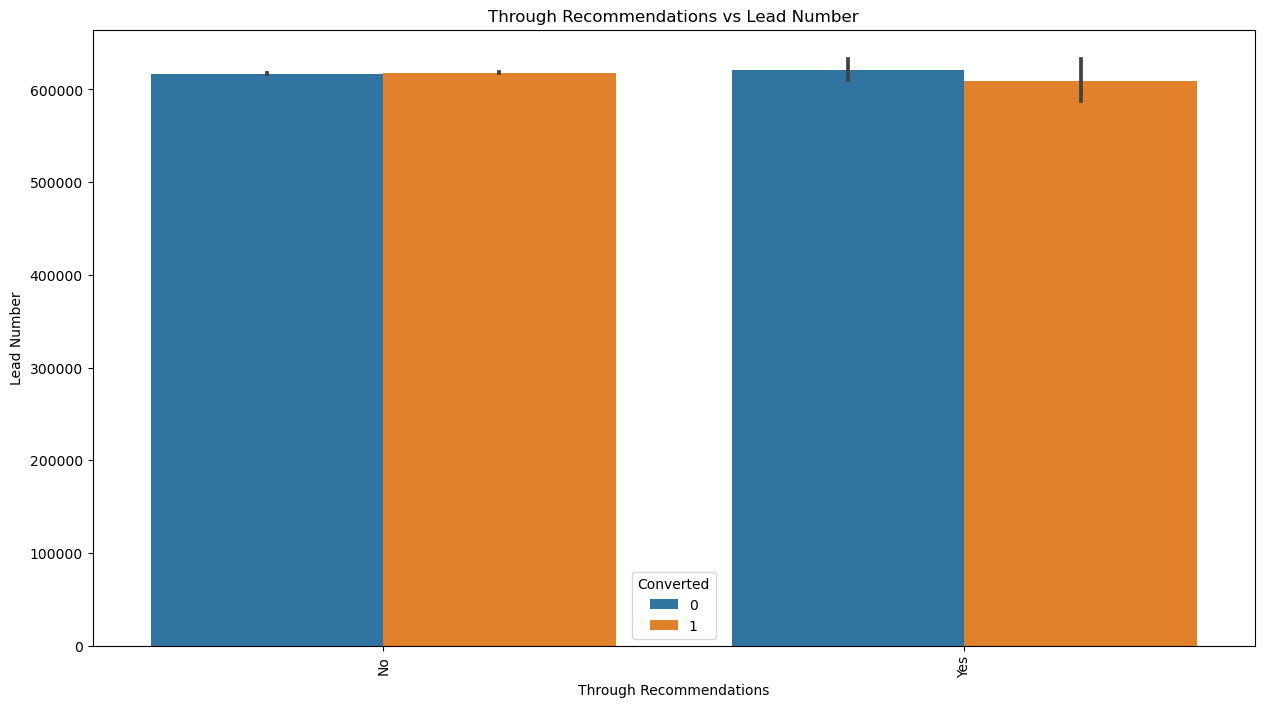

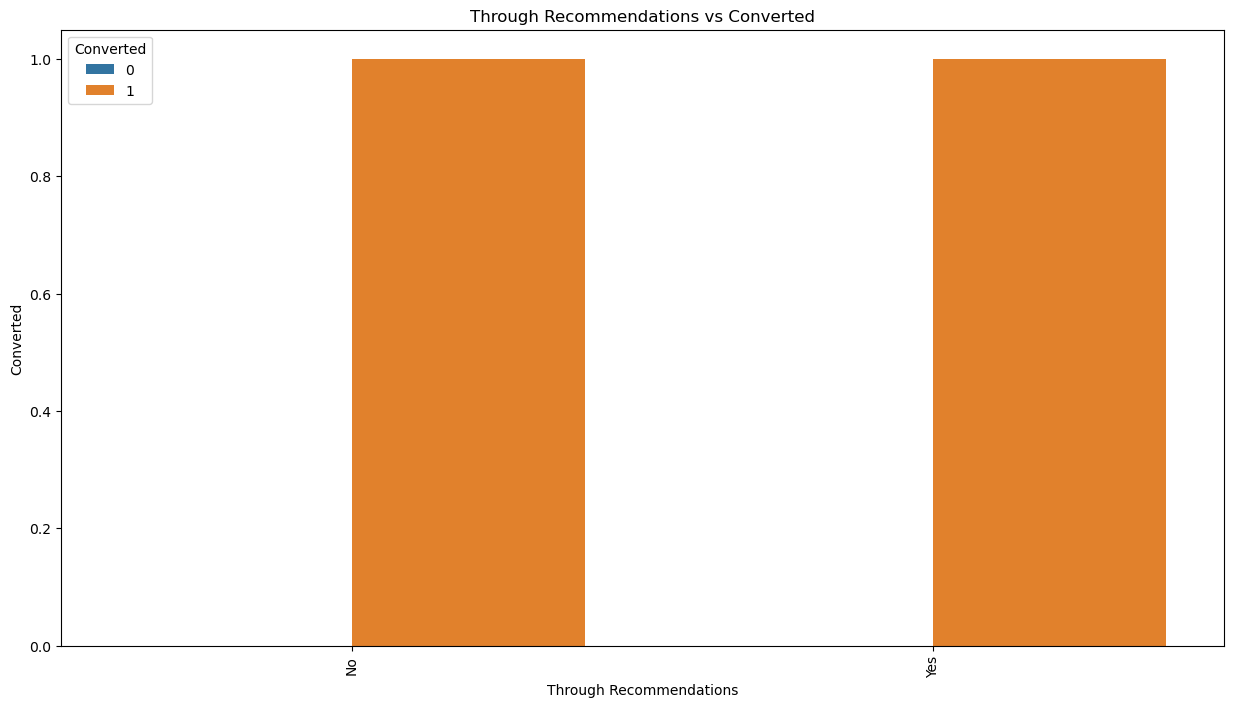

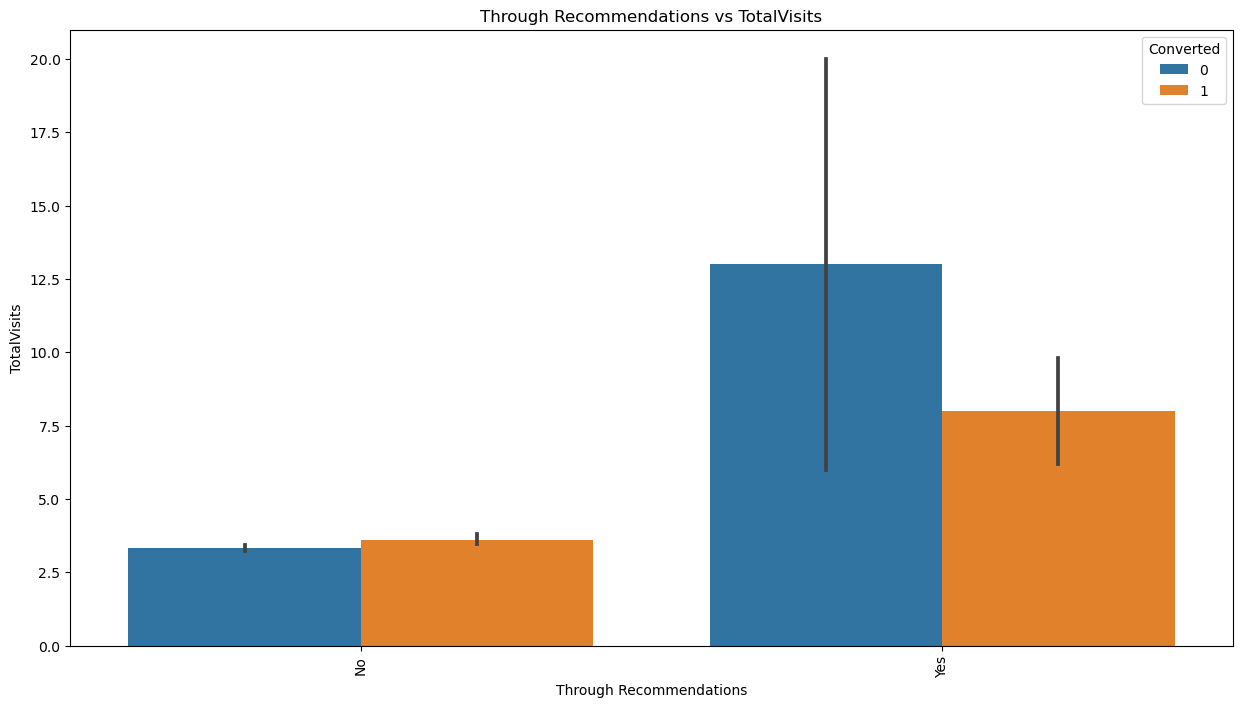

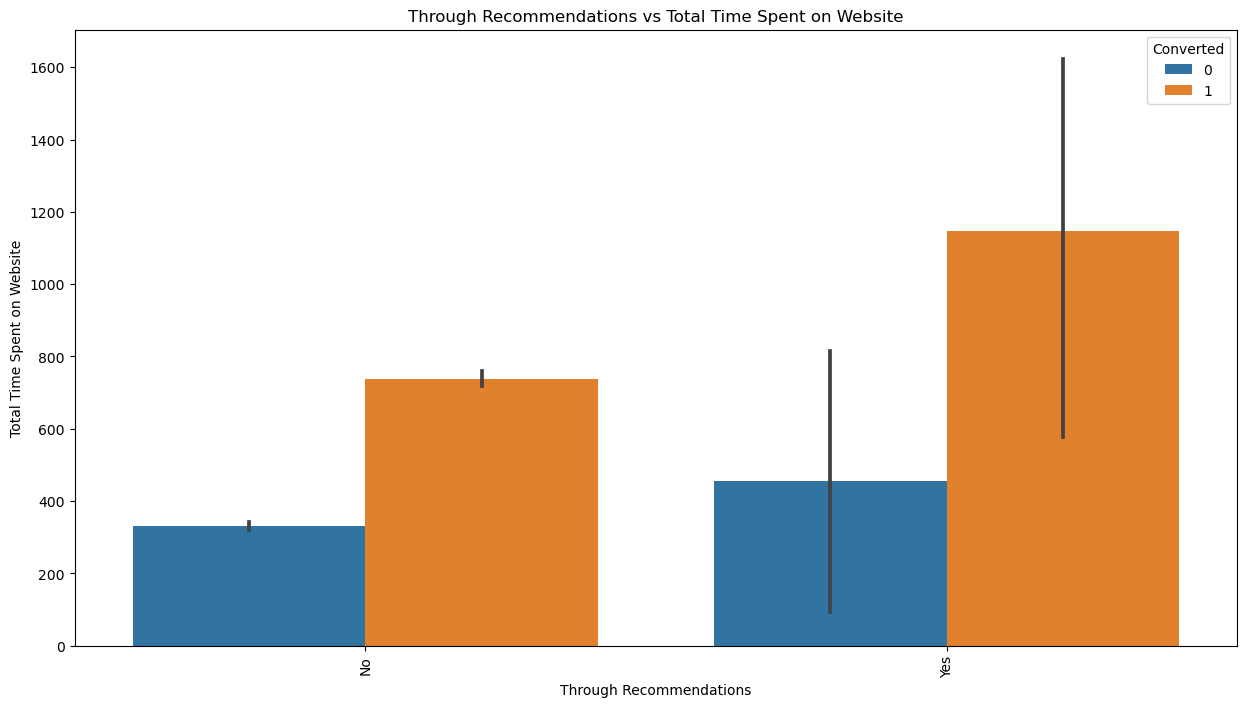

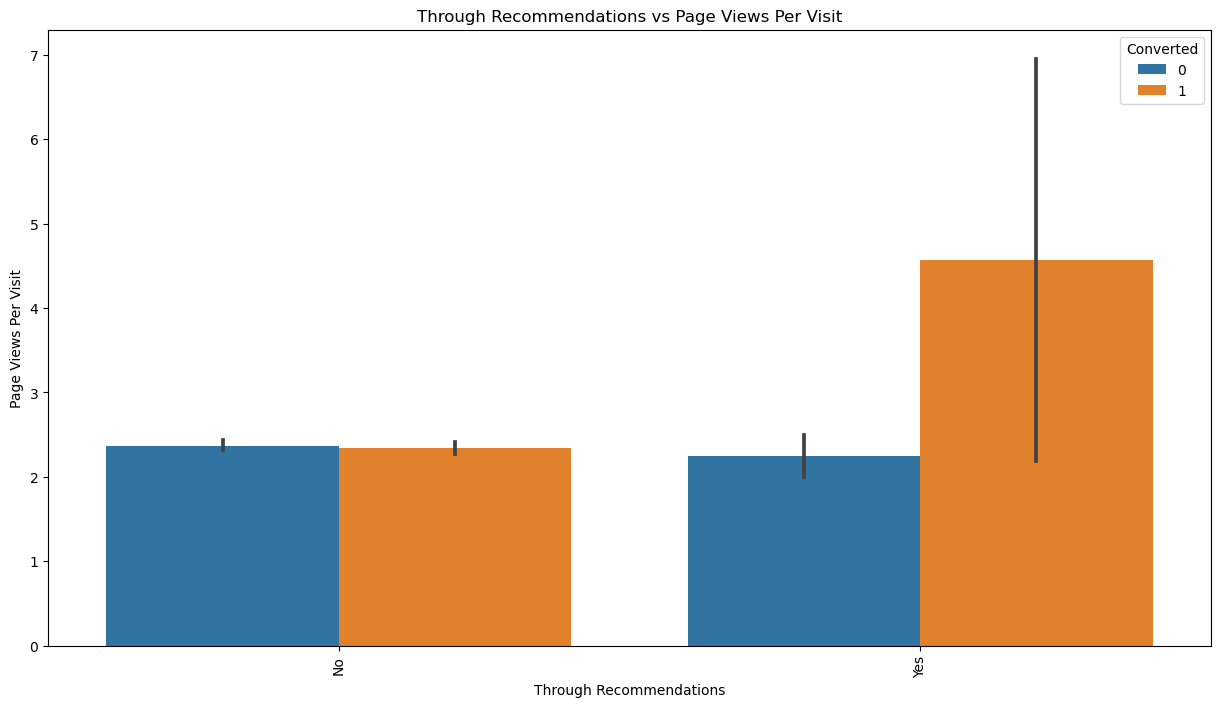

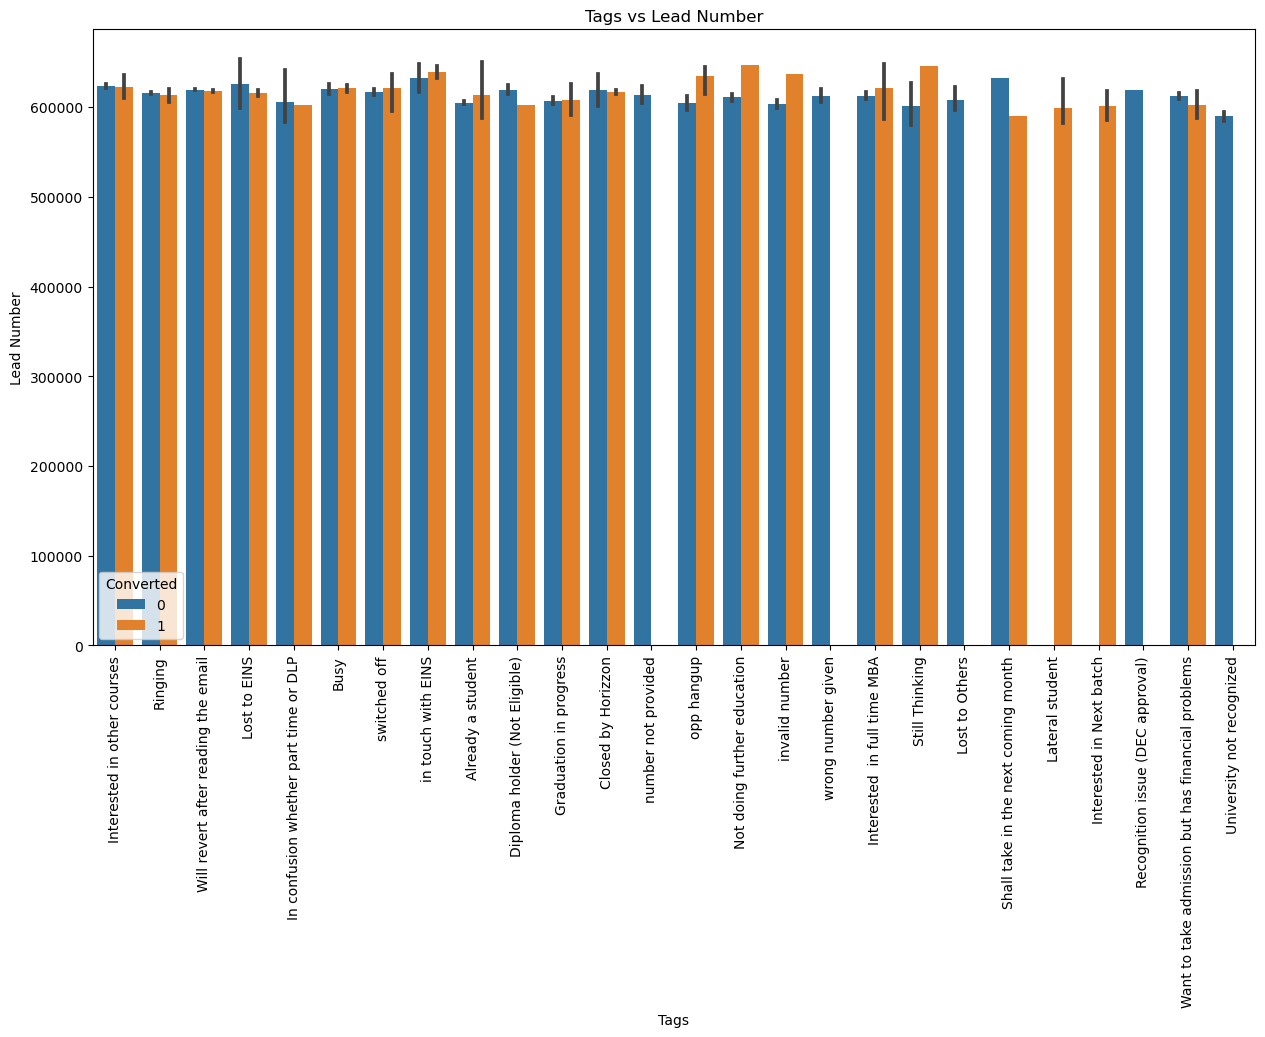

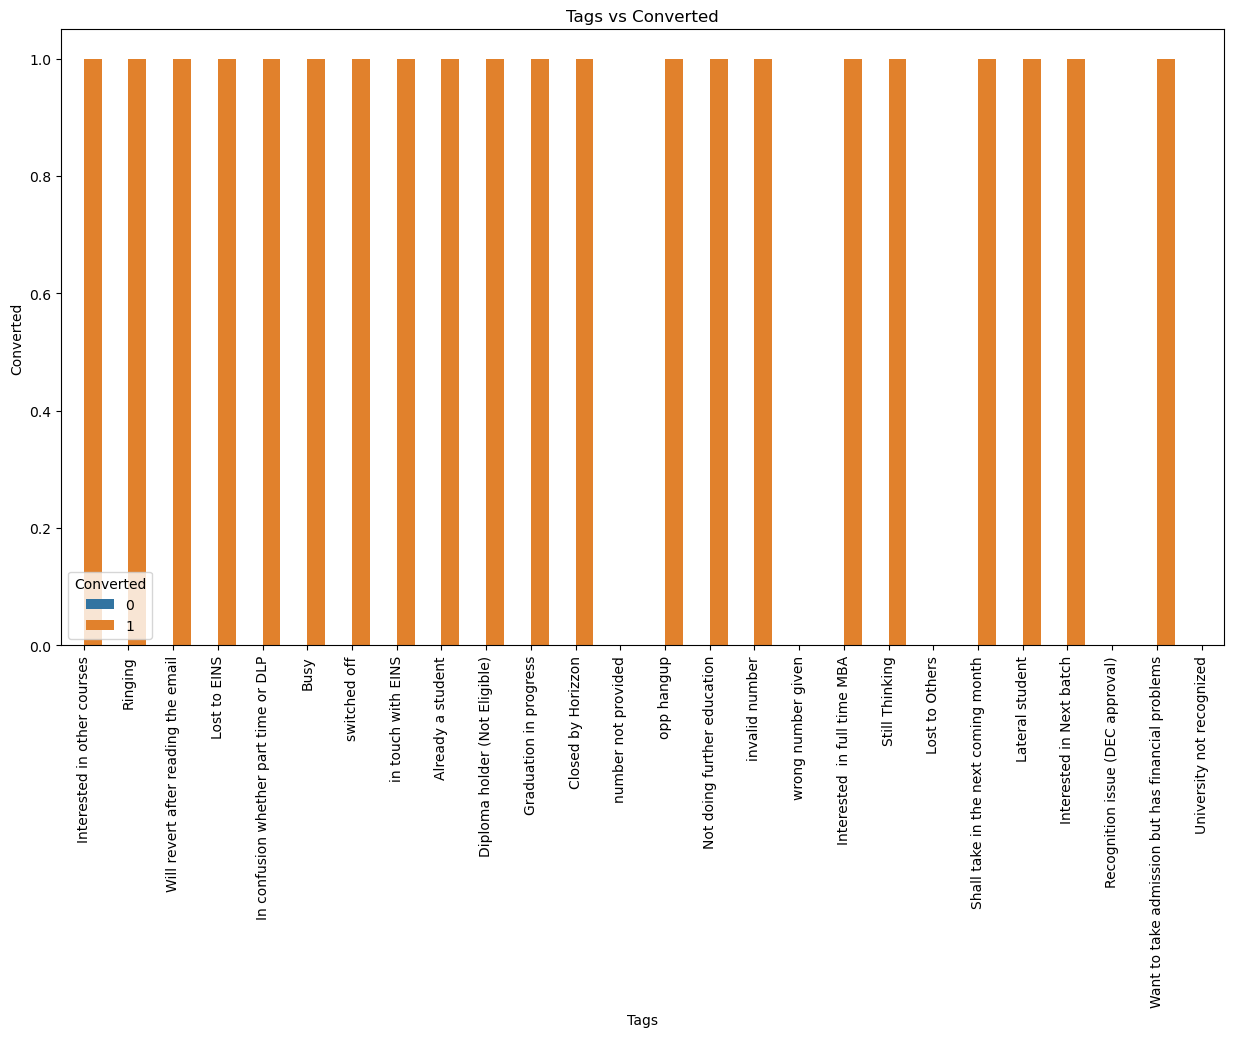

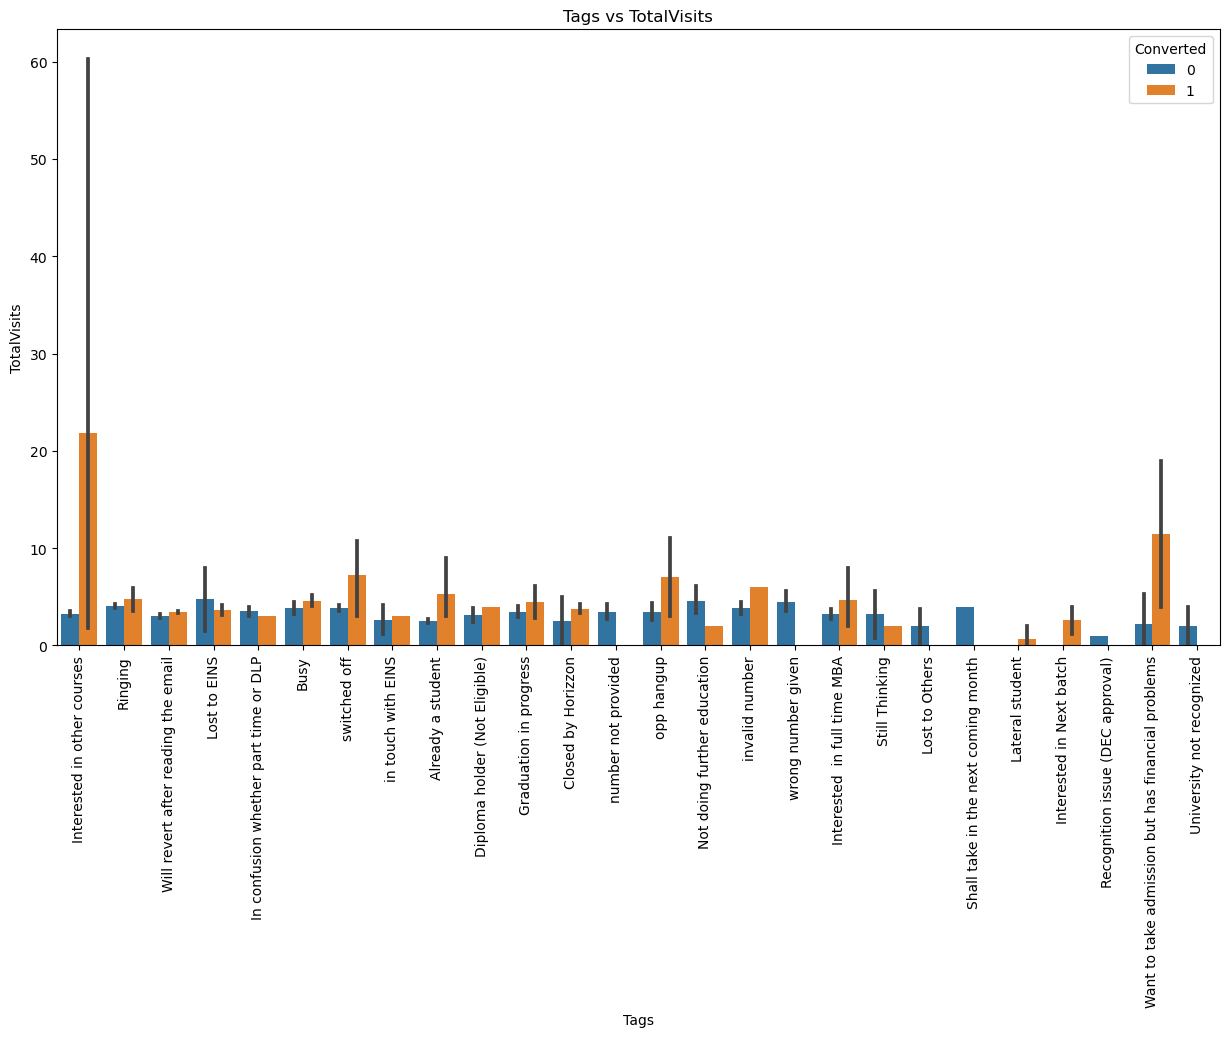

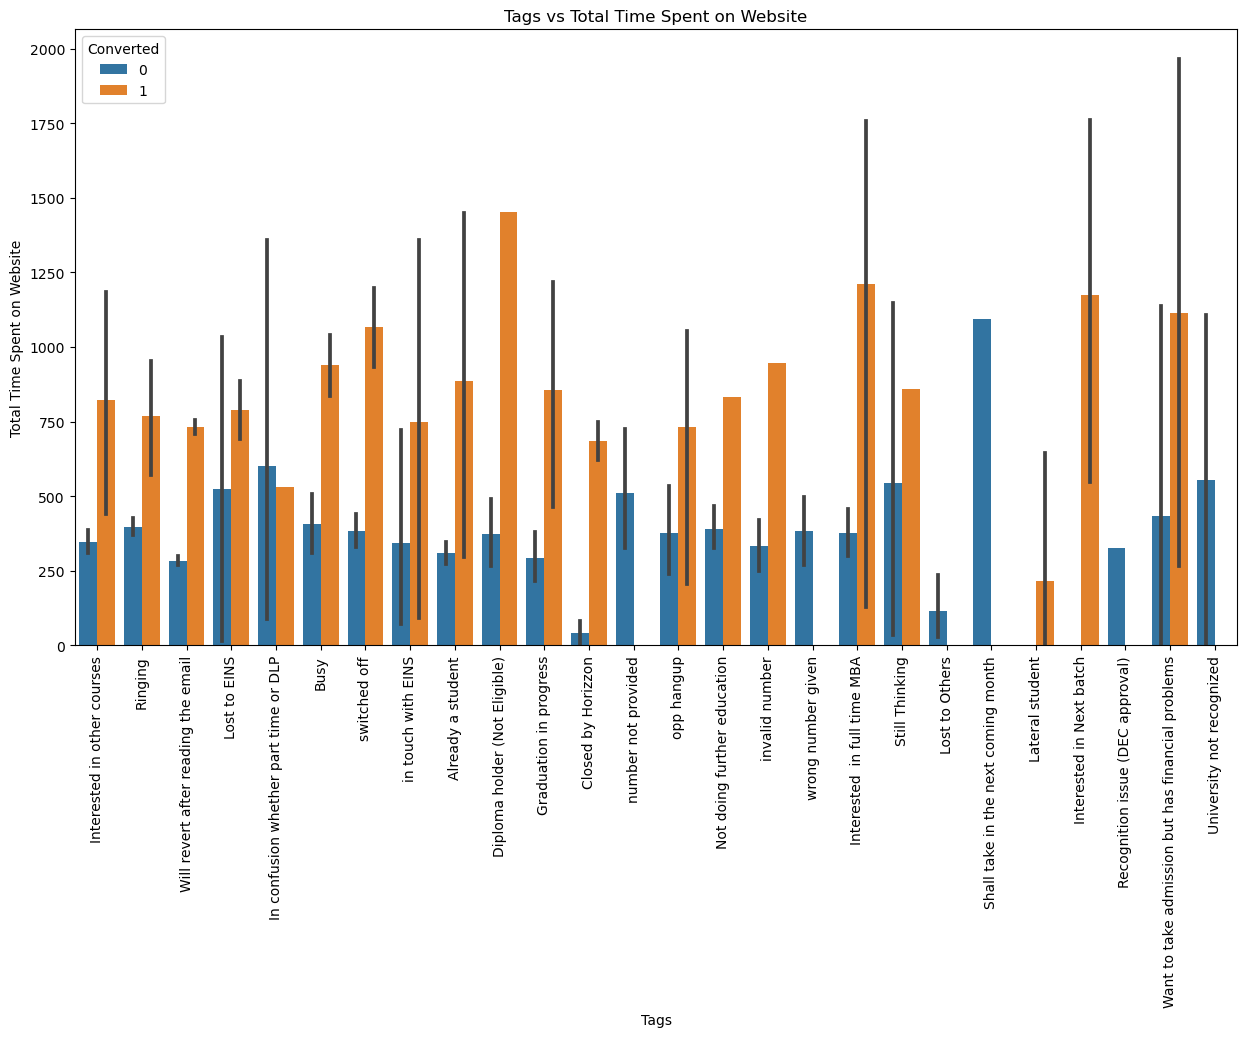

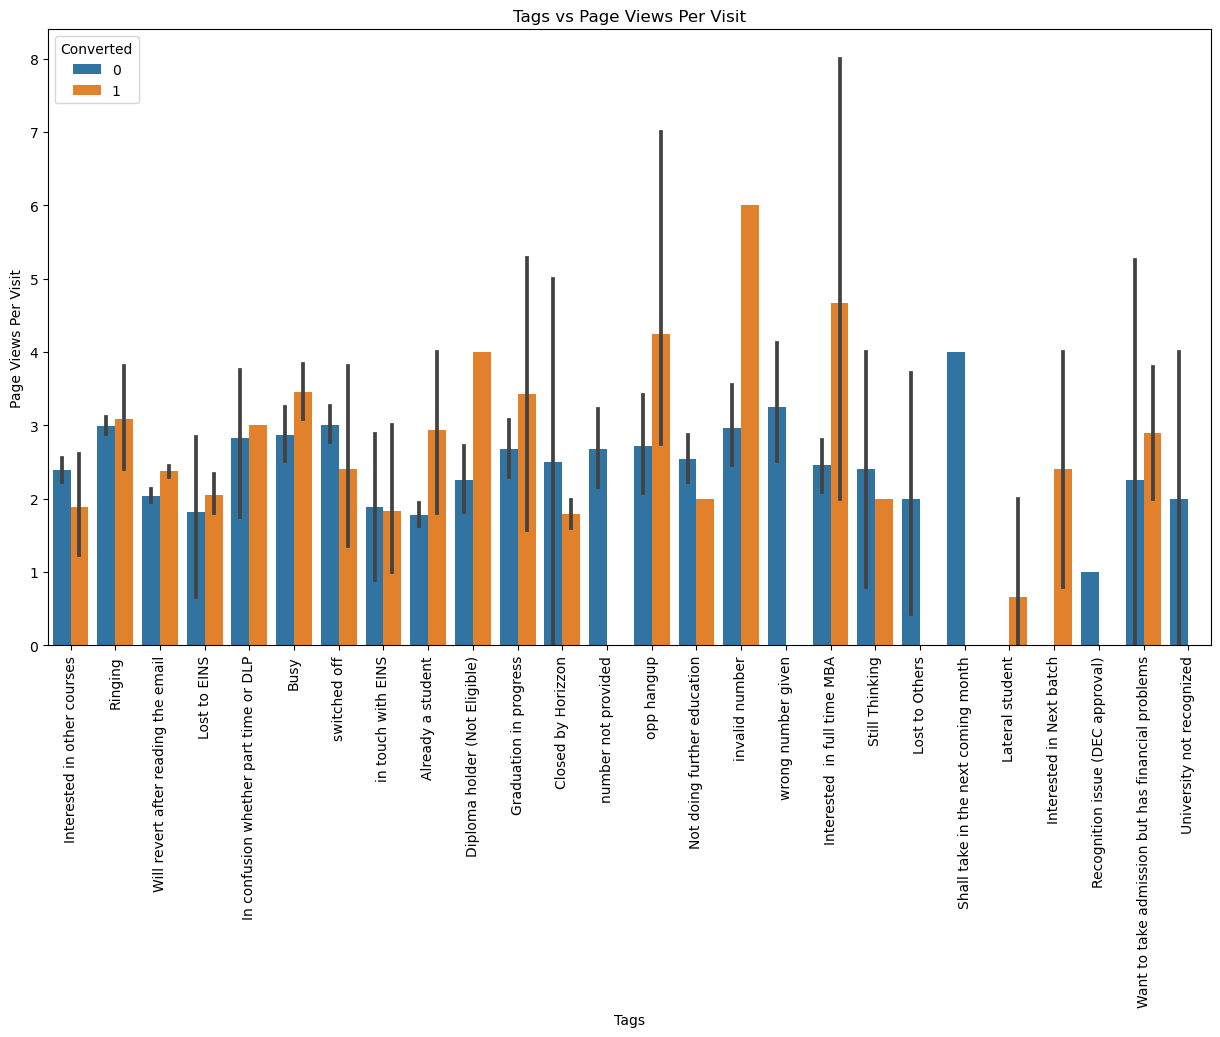

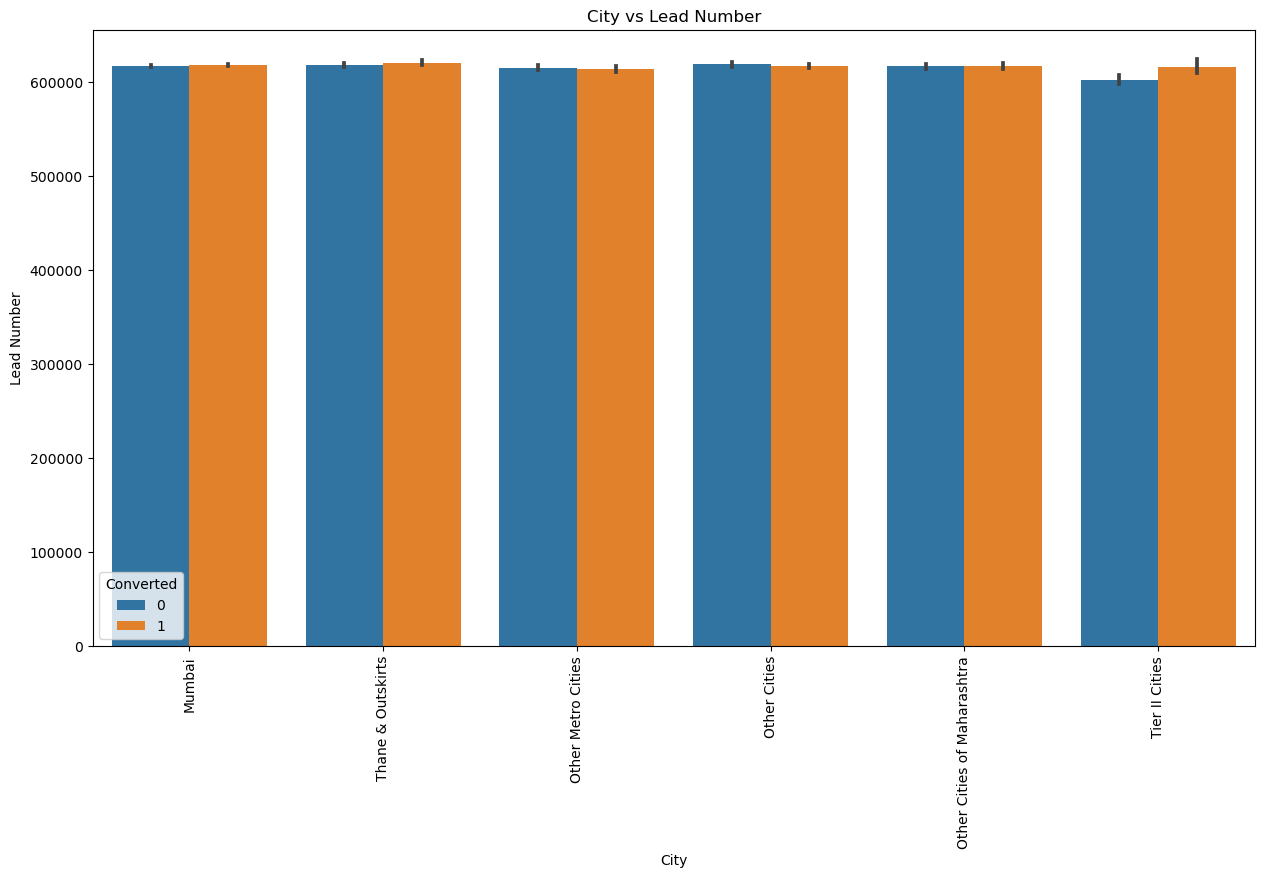

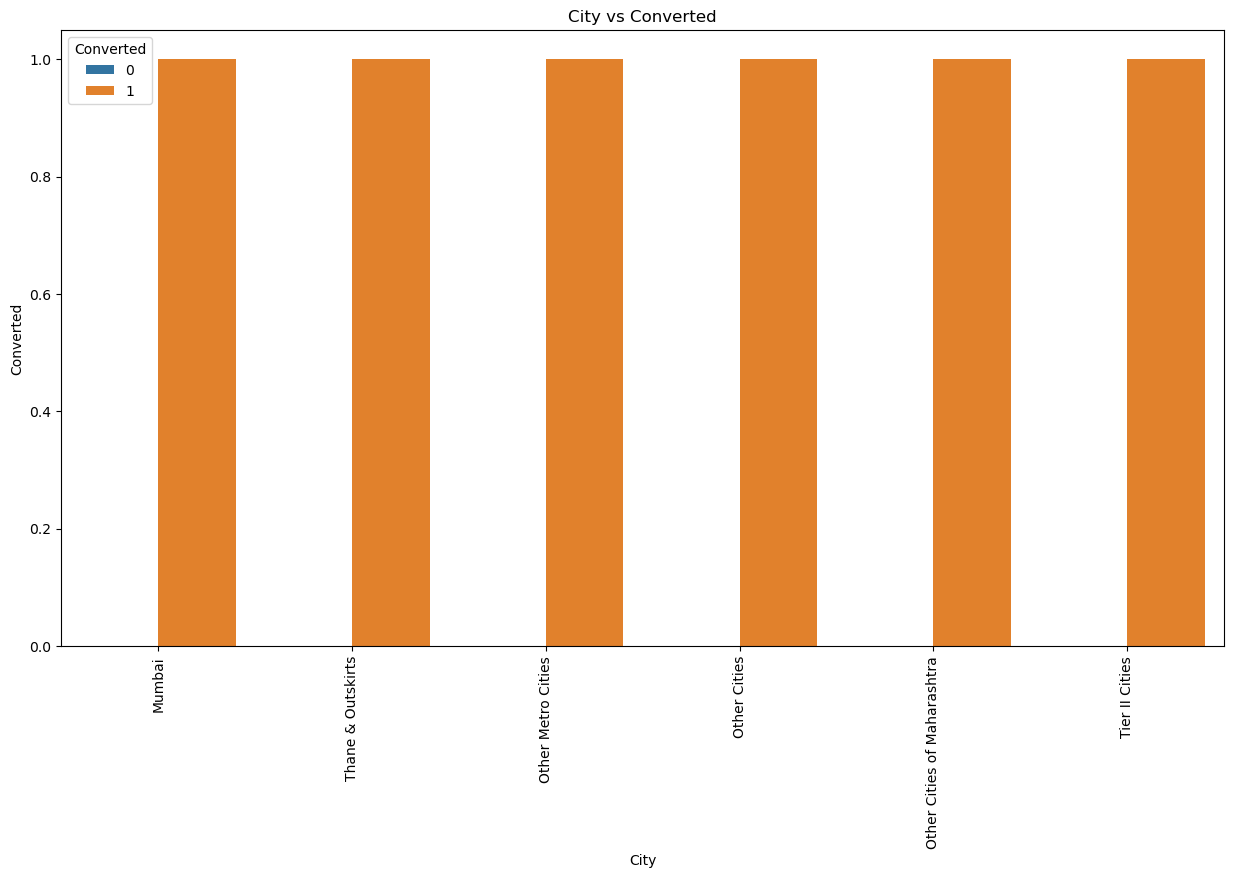

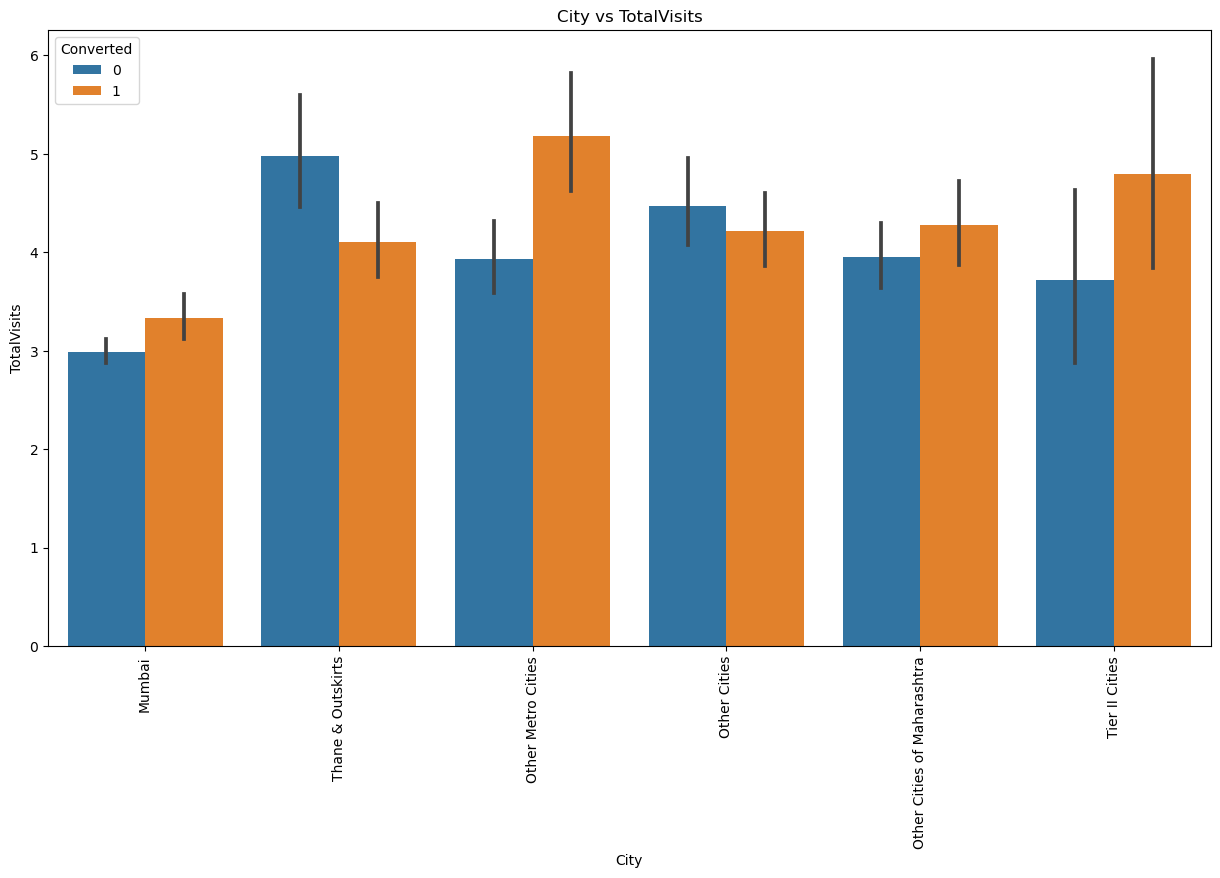

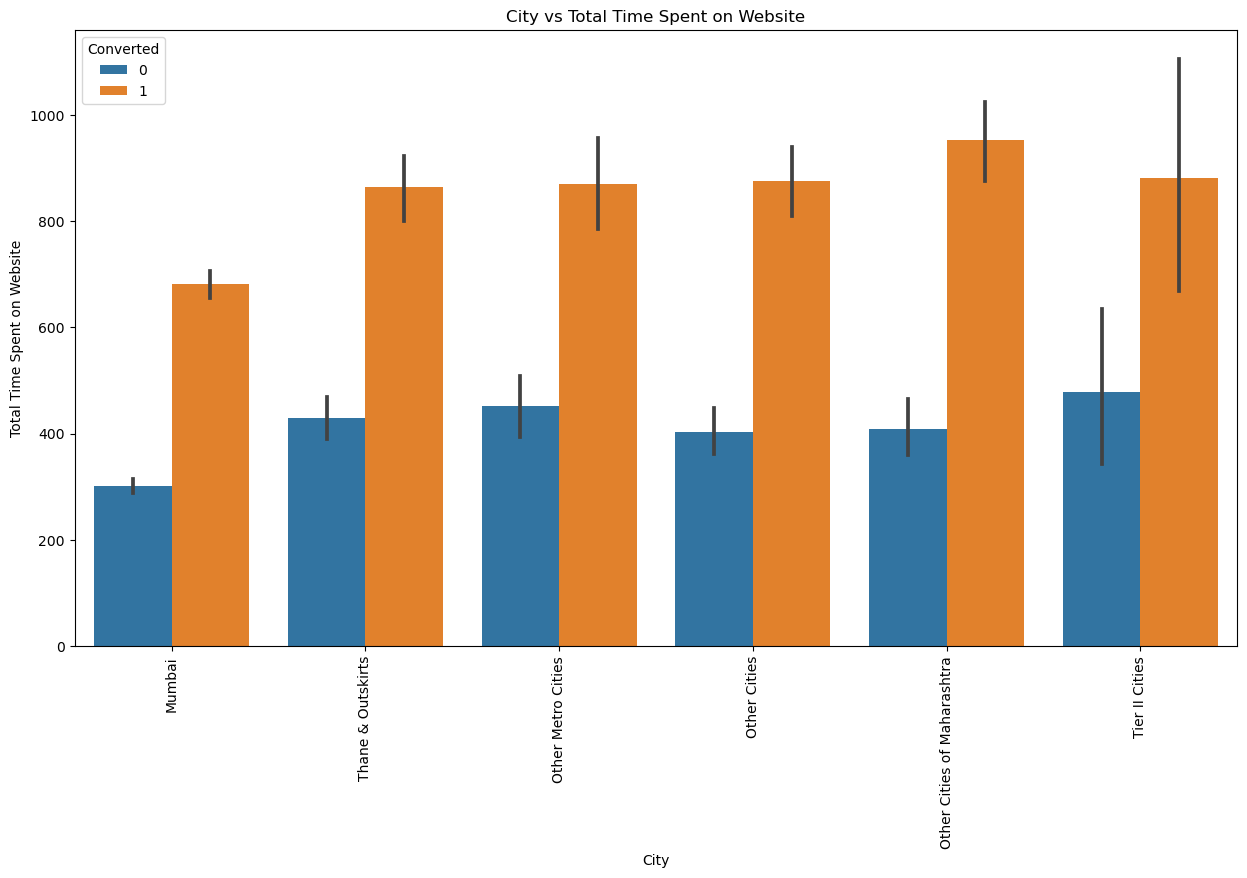

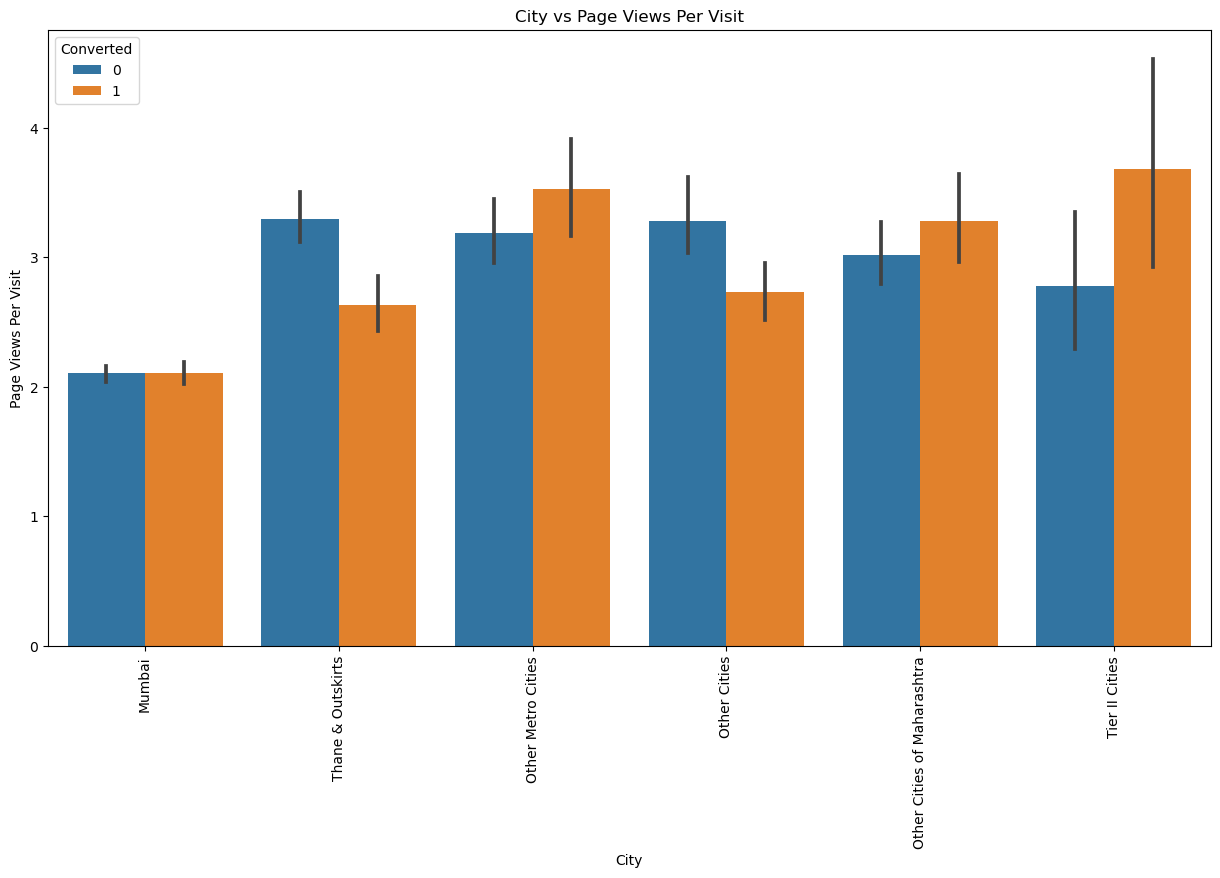

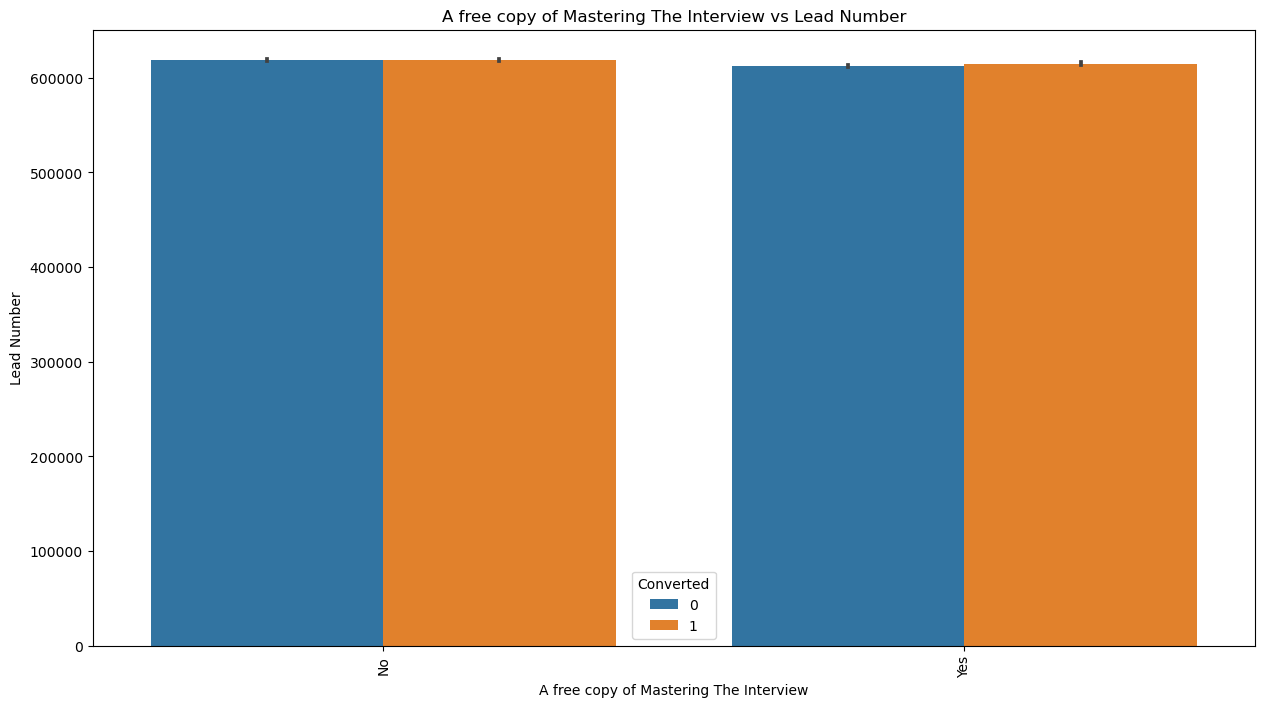

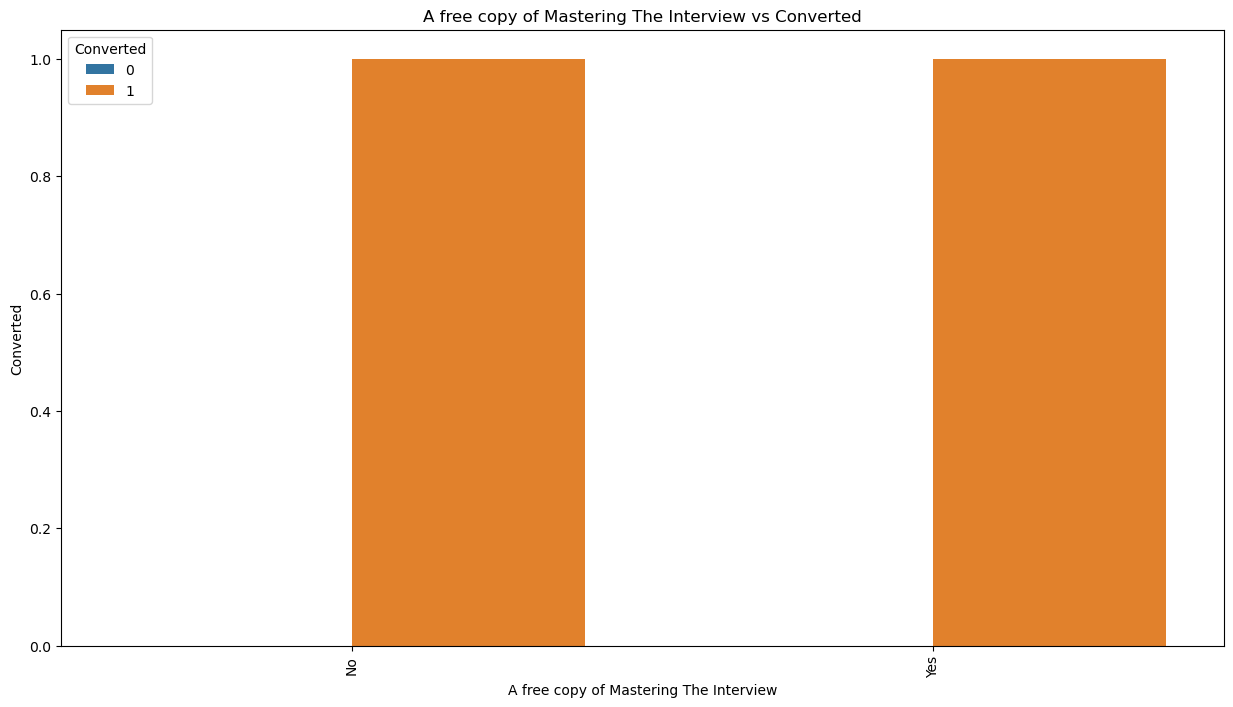

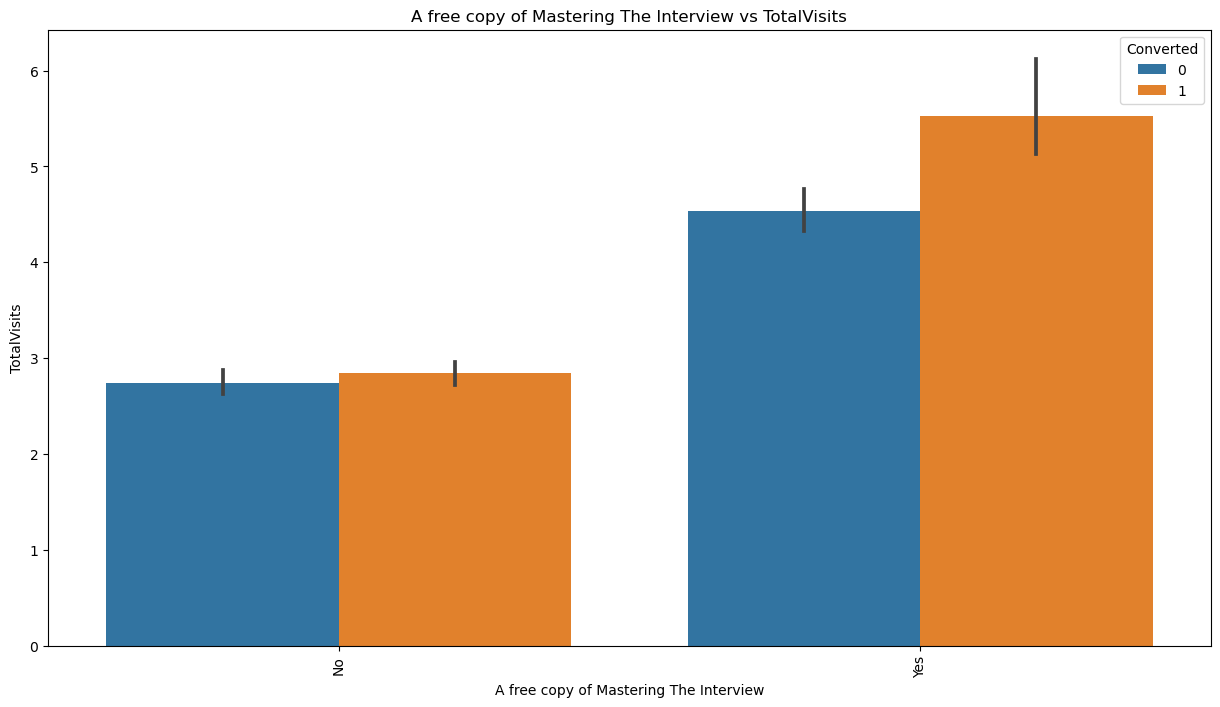

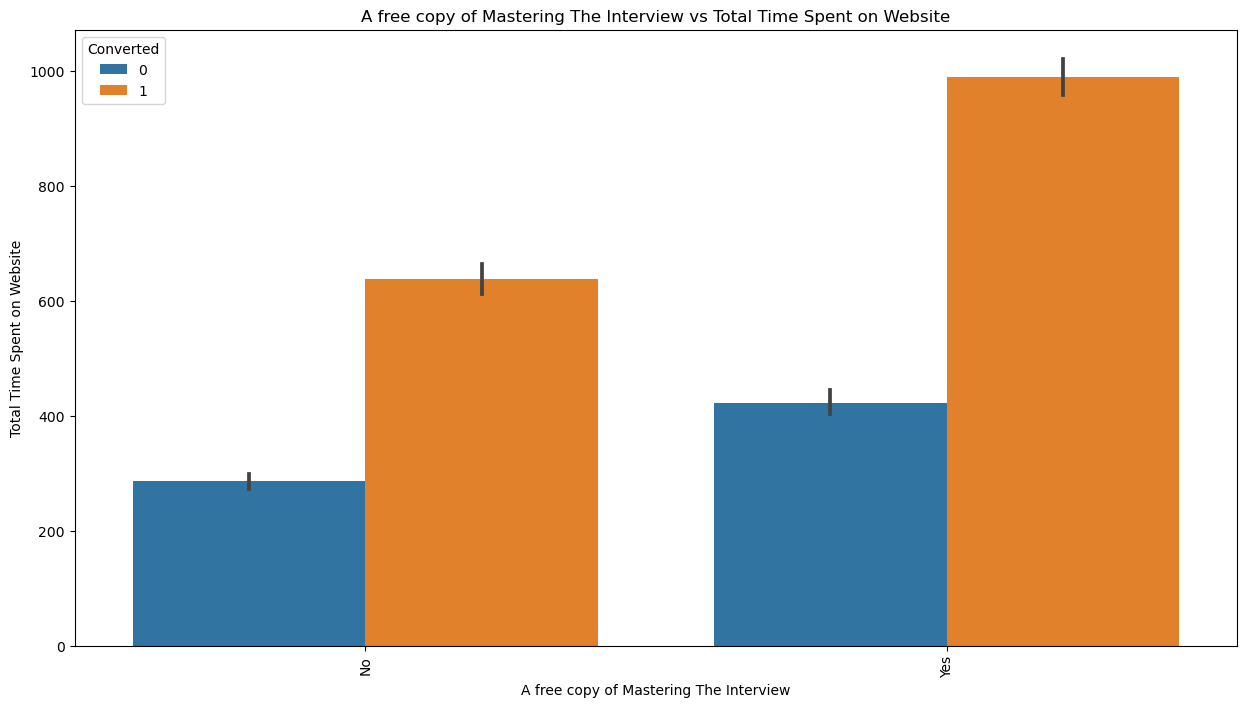

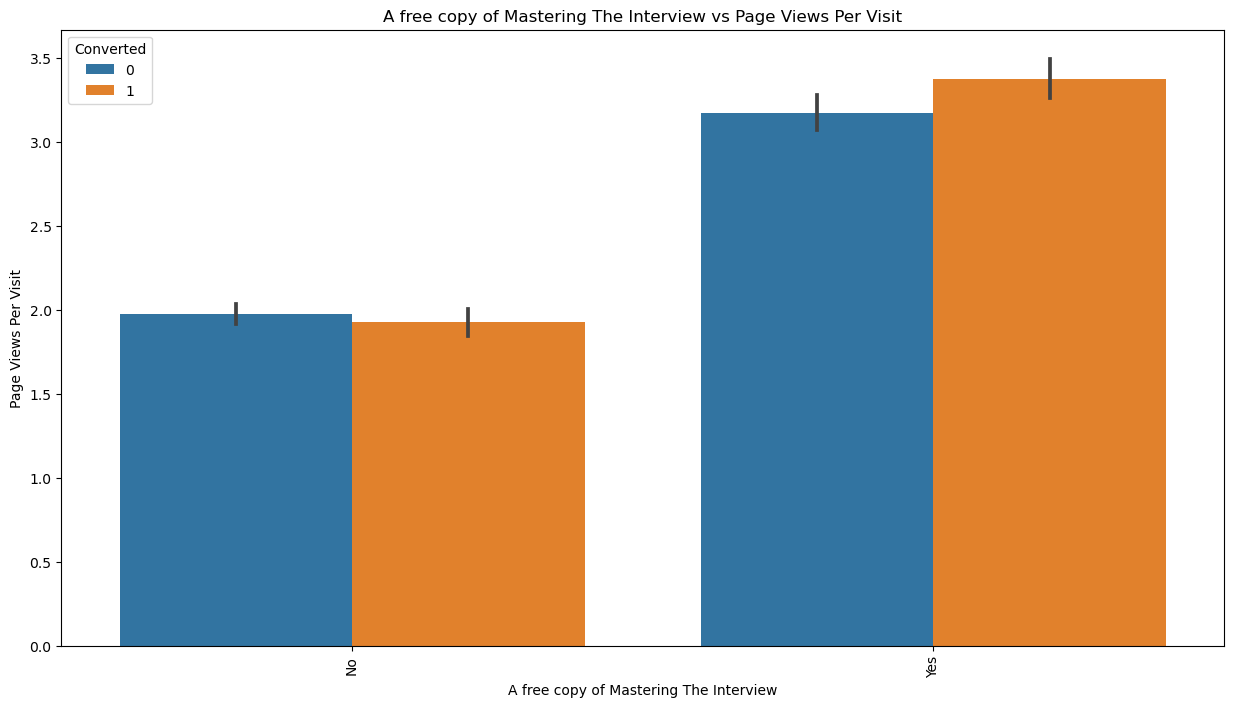

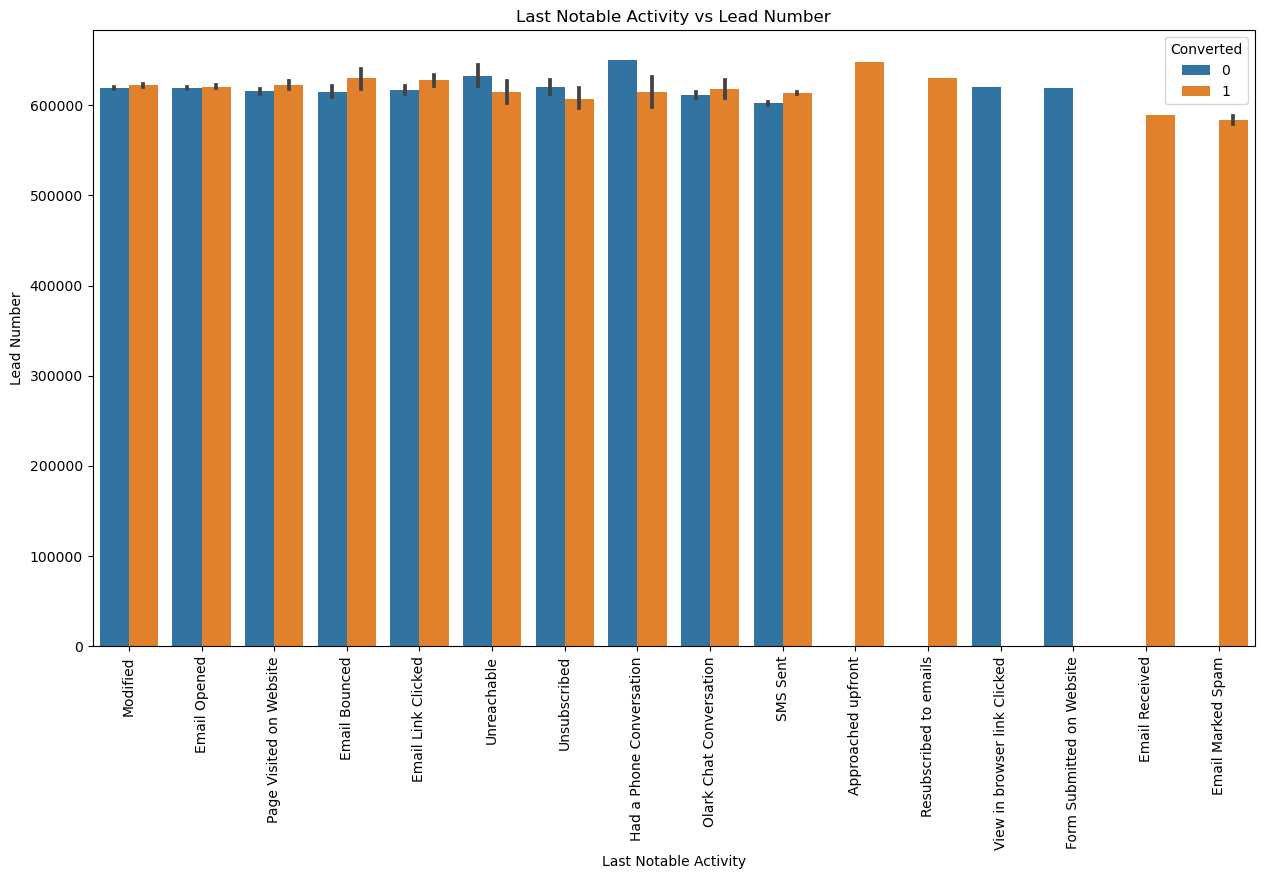

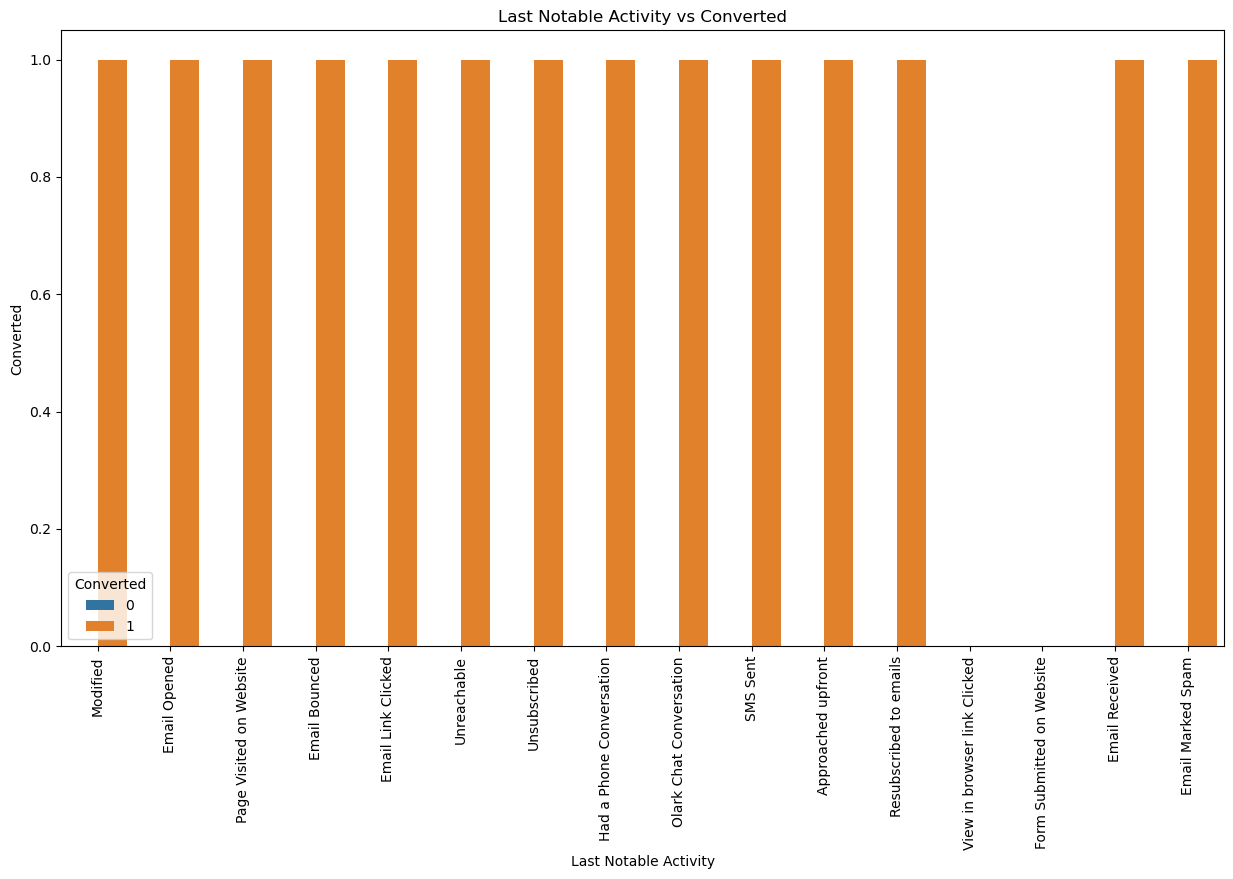

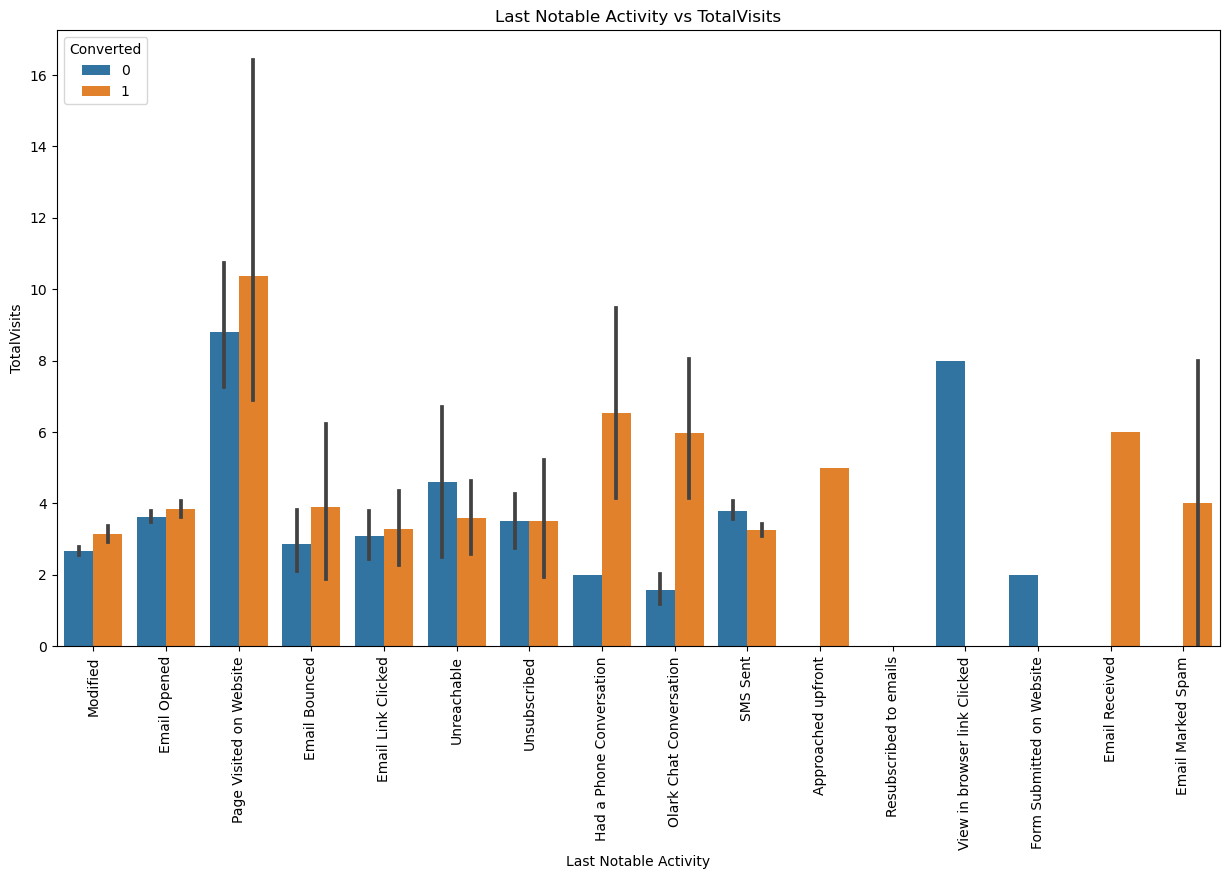

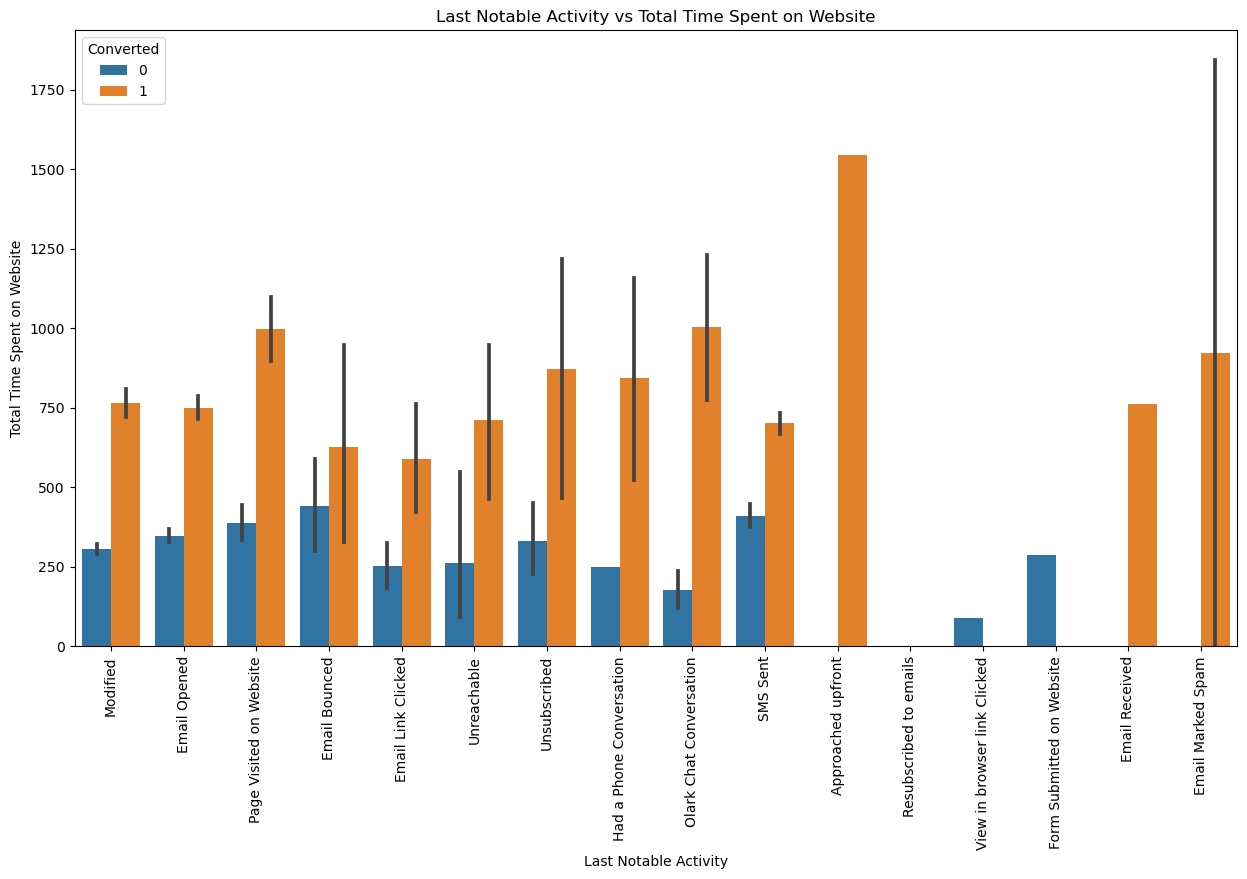

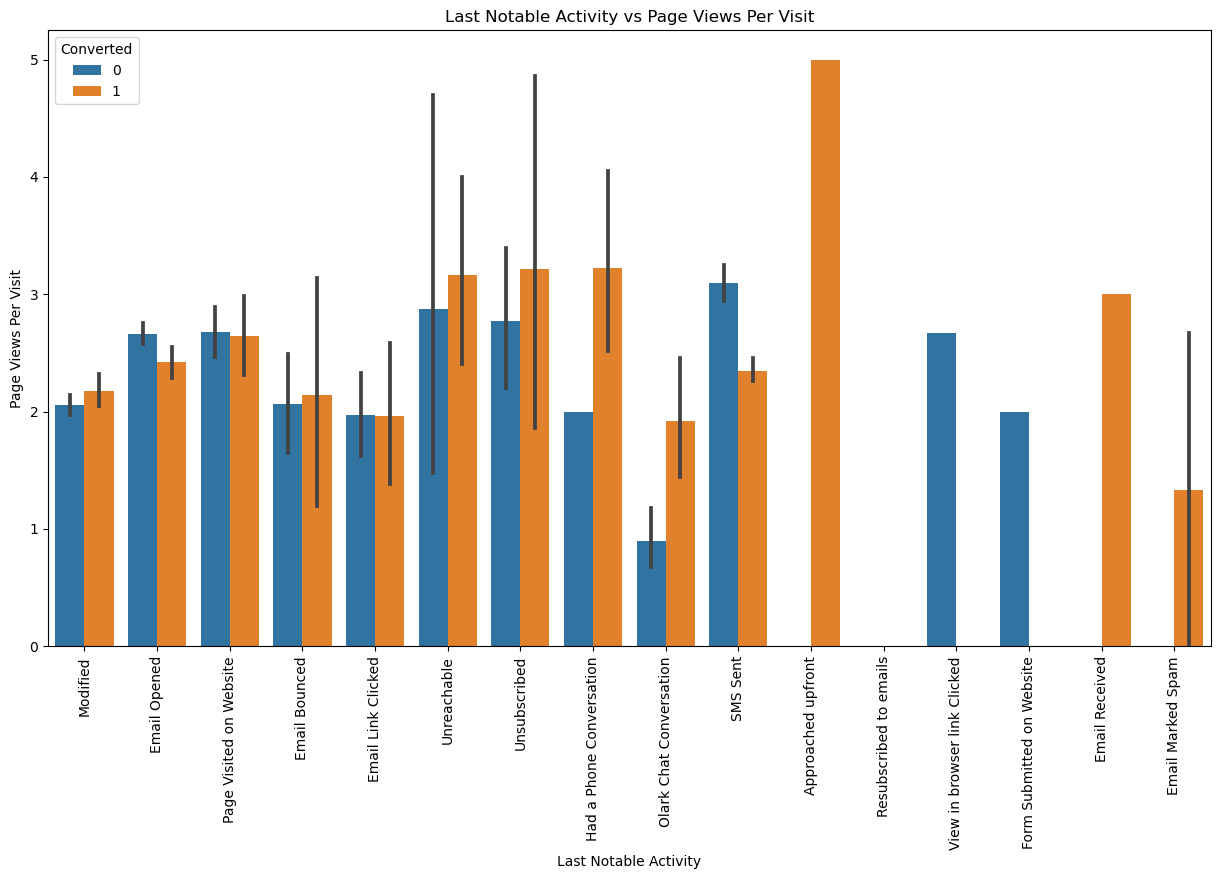

In [43]:
for a in new_cat:
    for b in new_num:
        plt.figure(figsize=(15,8))
        sns.barplot(x=lead[a],y=lead[b],hue=lead[target])
        plt.title(a+' vs '+b)
        plt.xlabel(a)
        plt.xticks(rotation=90)
        plt.ylabel(b)
        plt.show()

### 5.2.2 Numereical vs Numerical

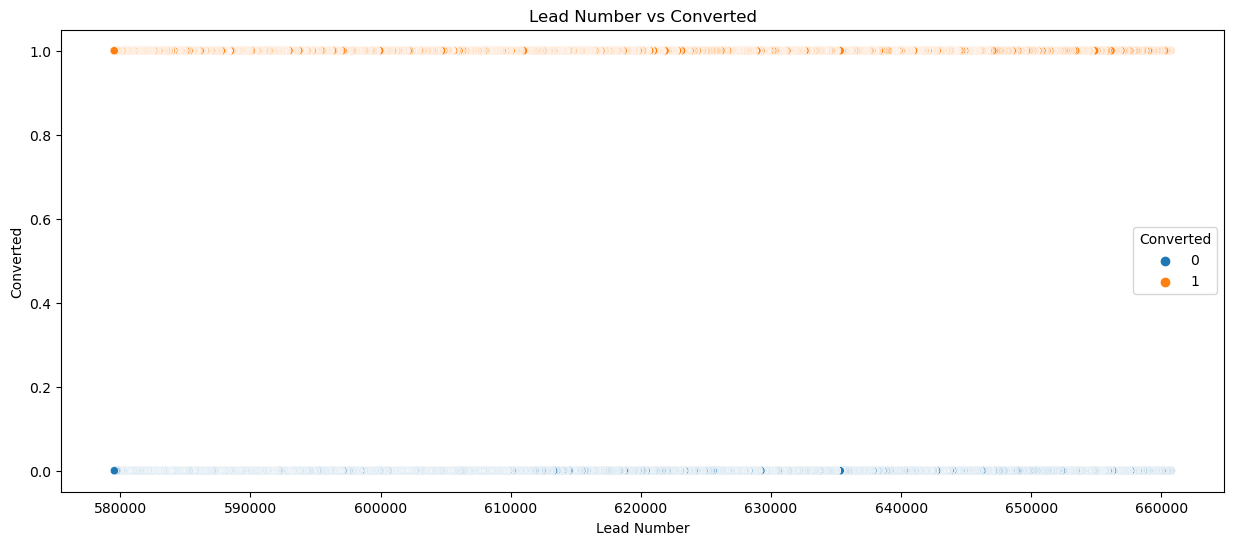

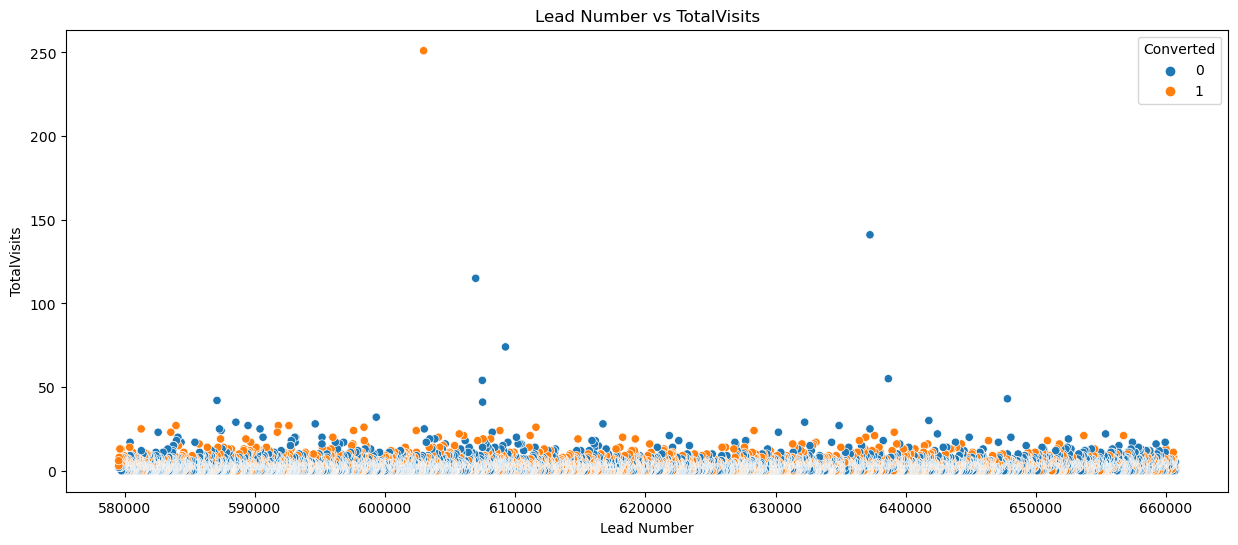

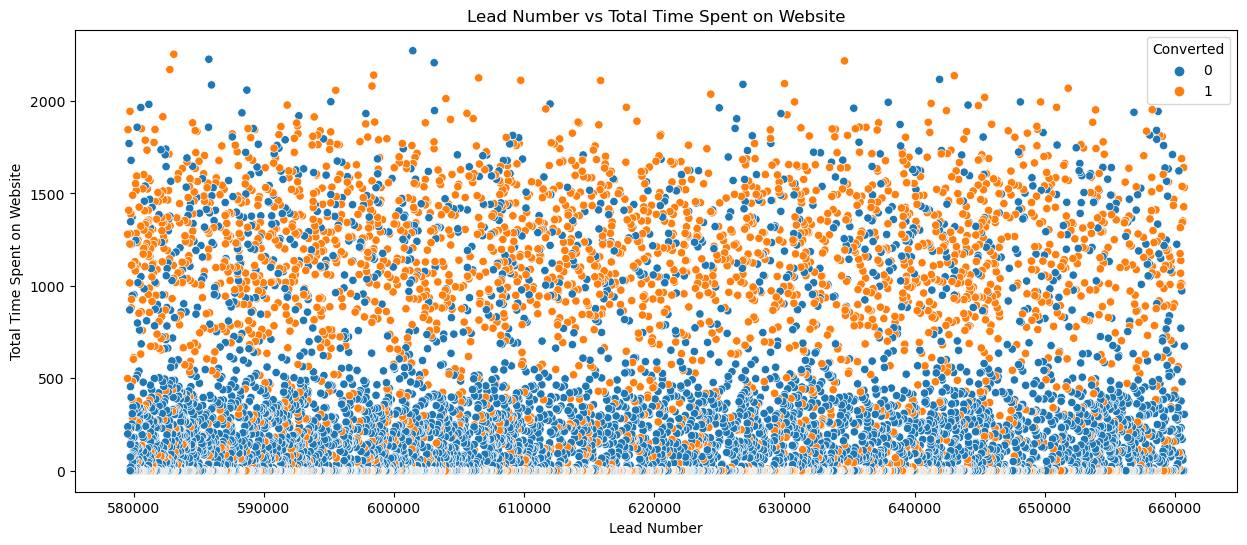

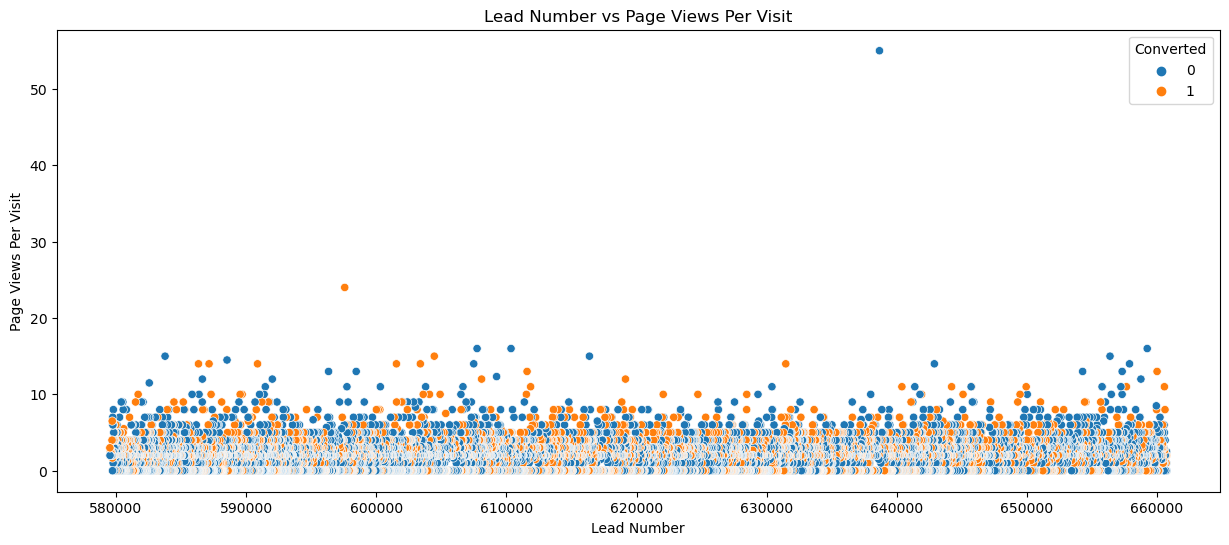

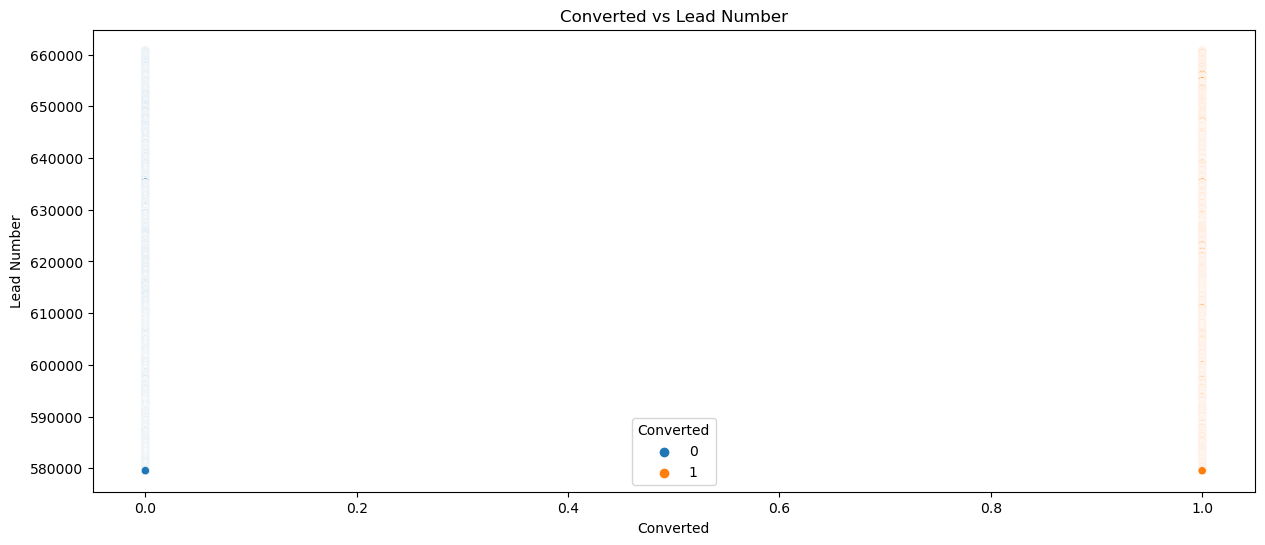

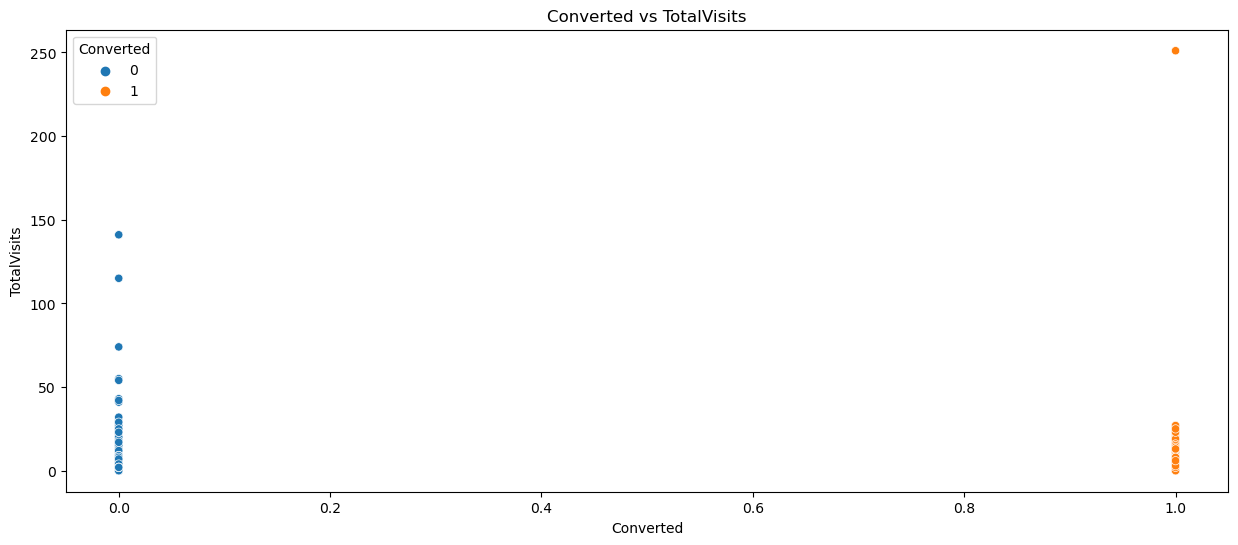

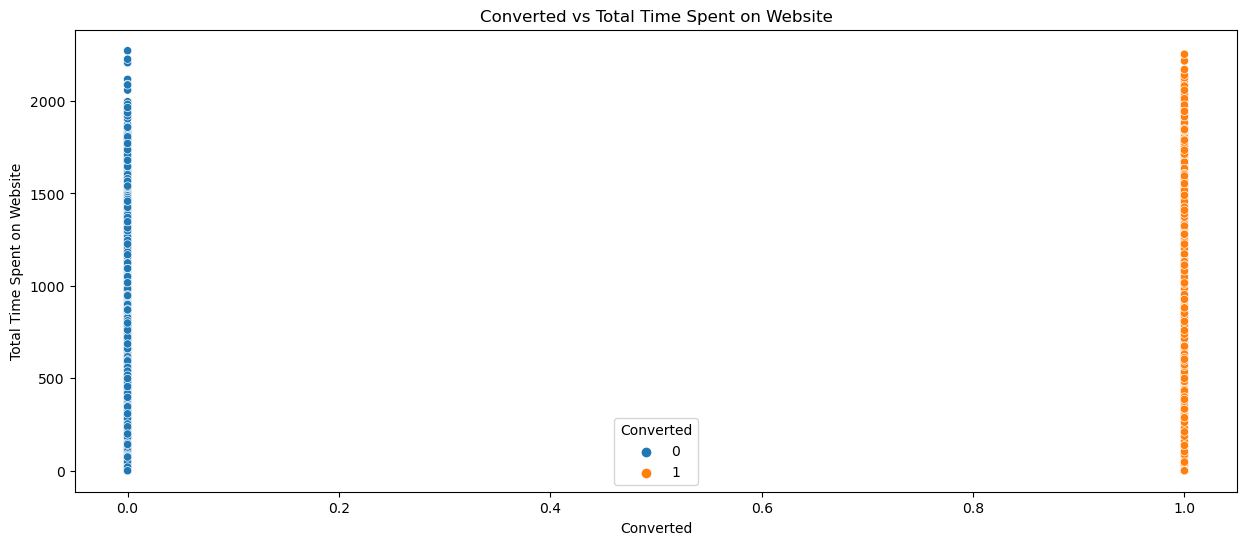

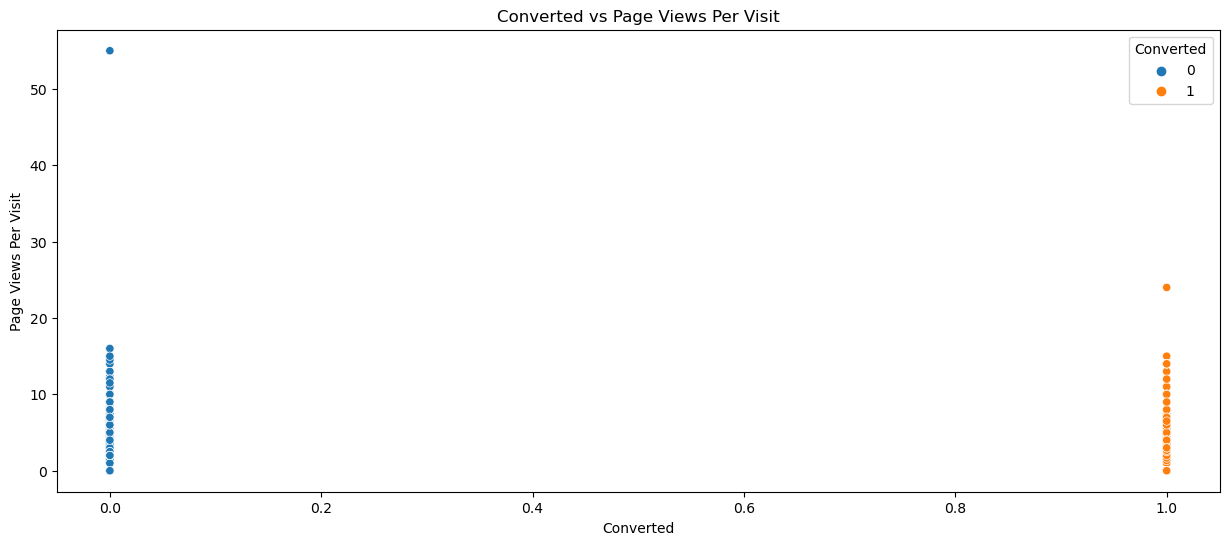

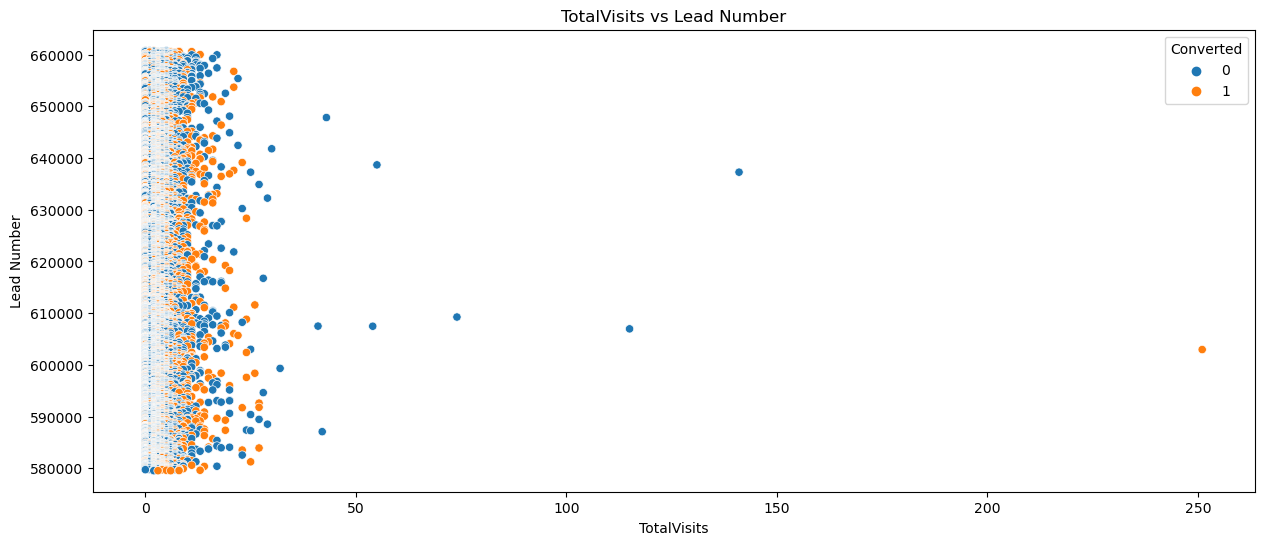

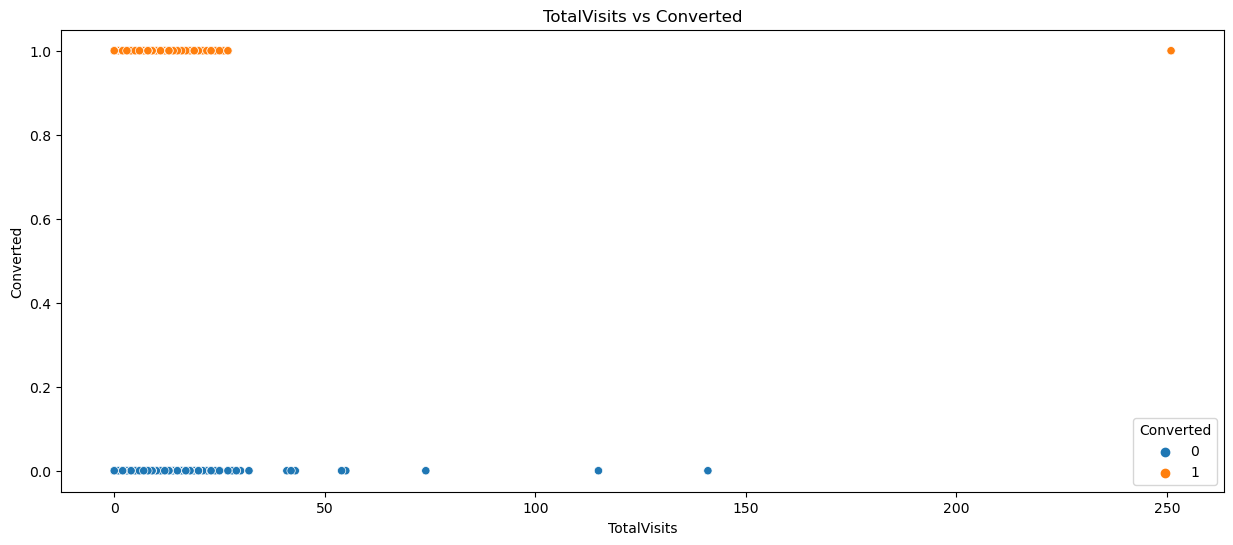

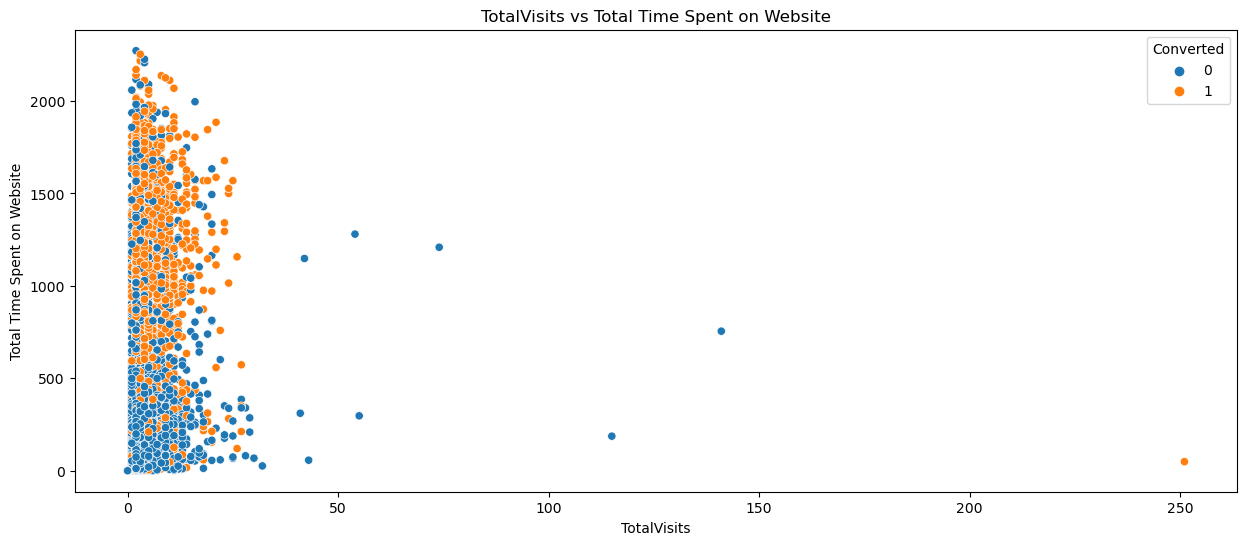

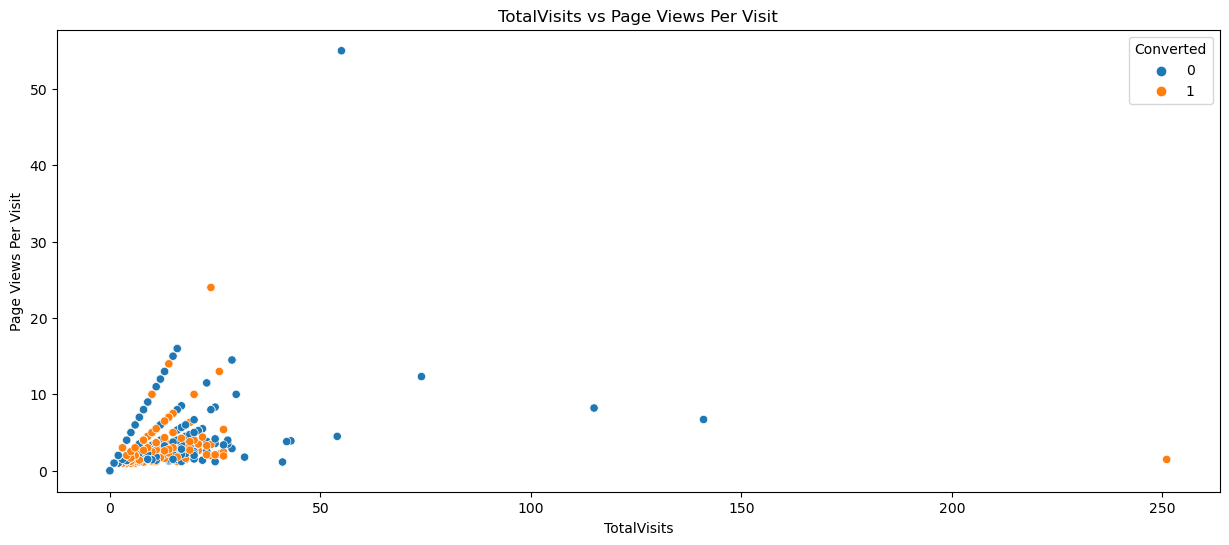

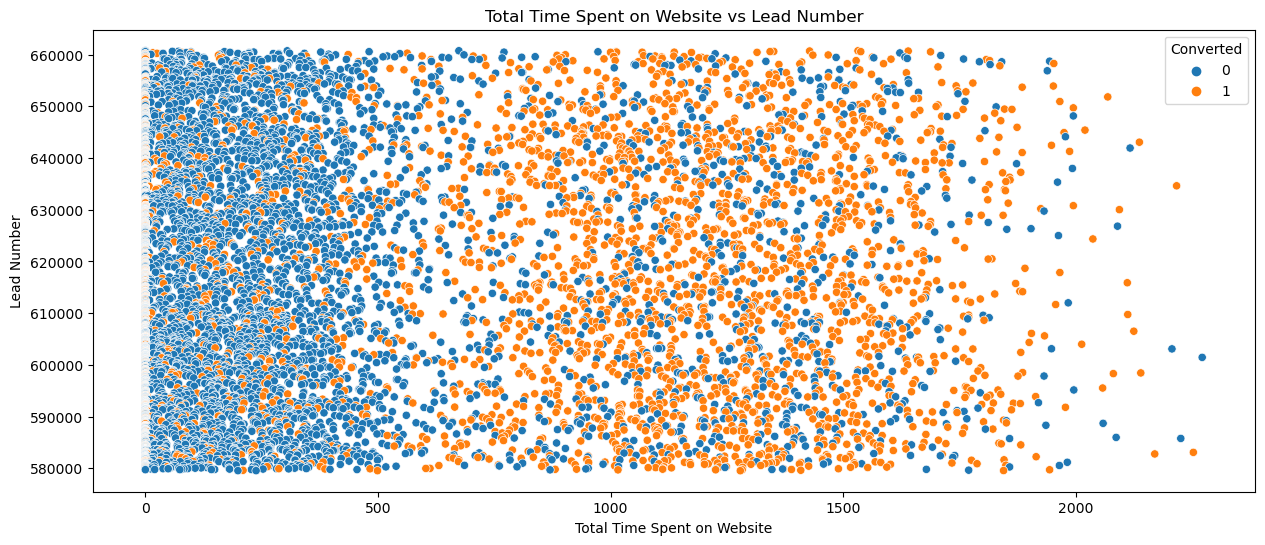

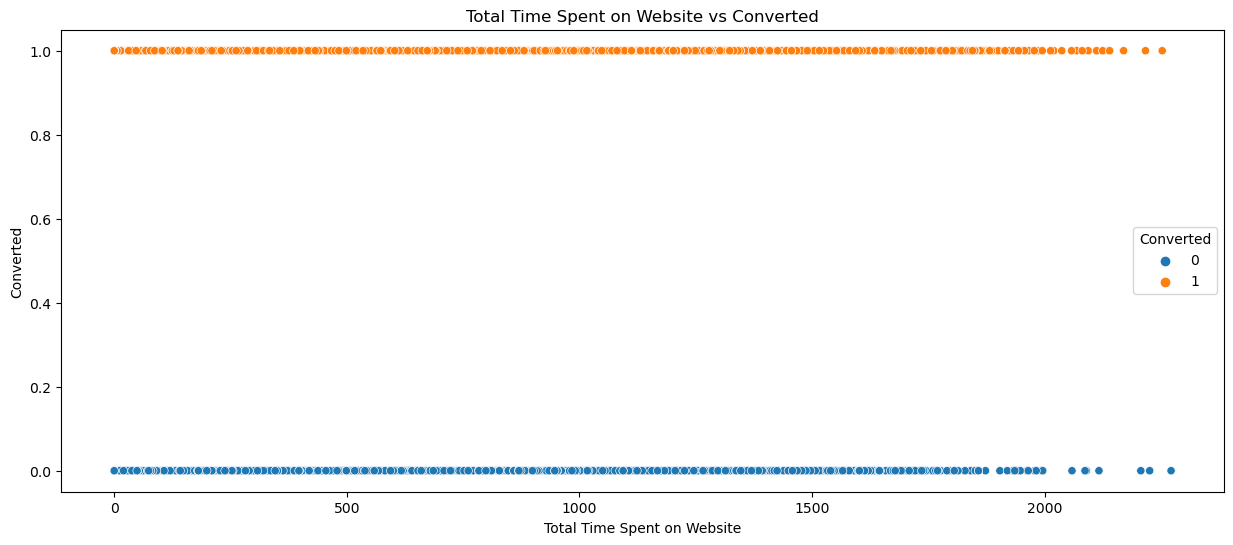

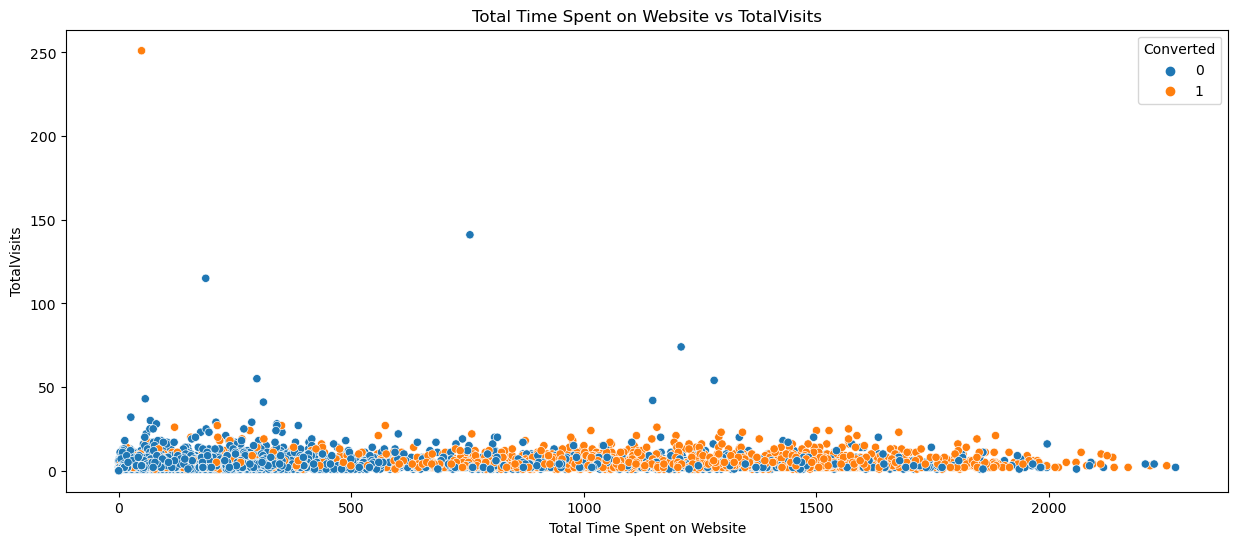

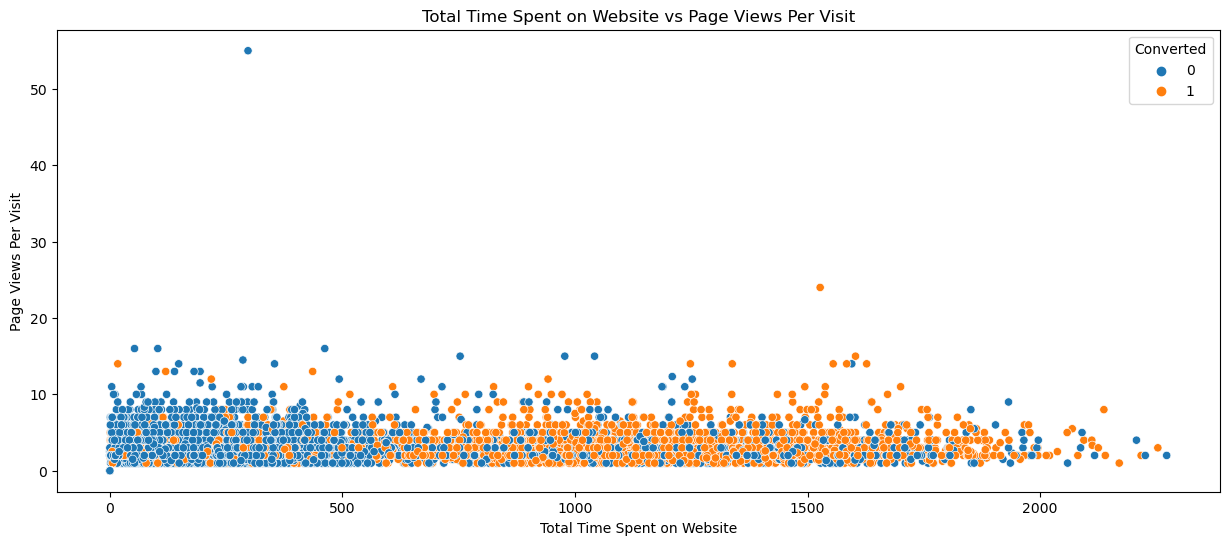

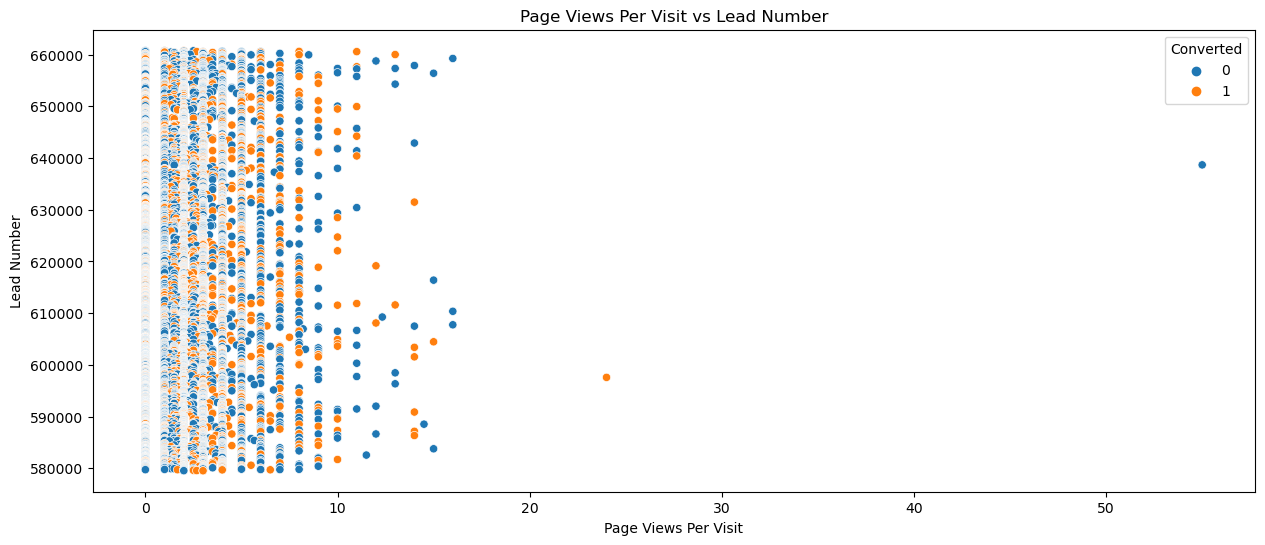

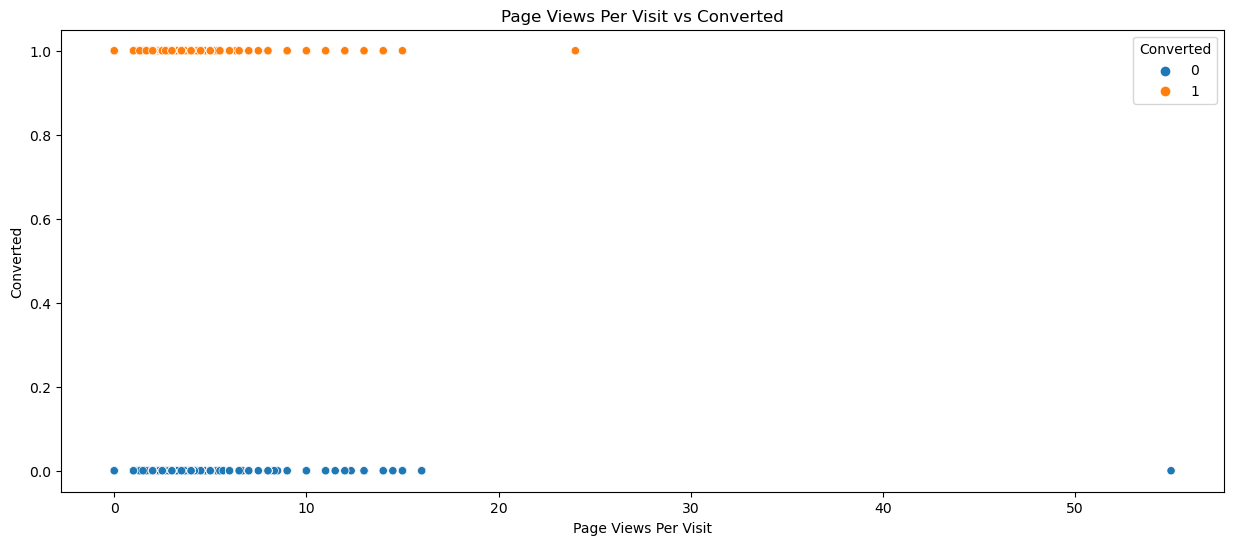

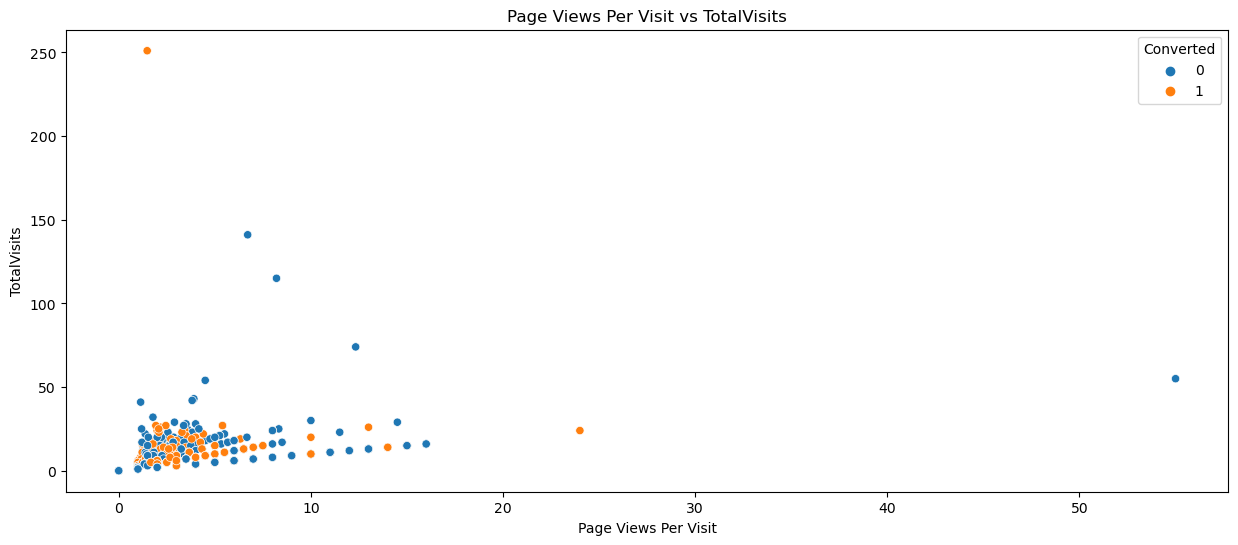

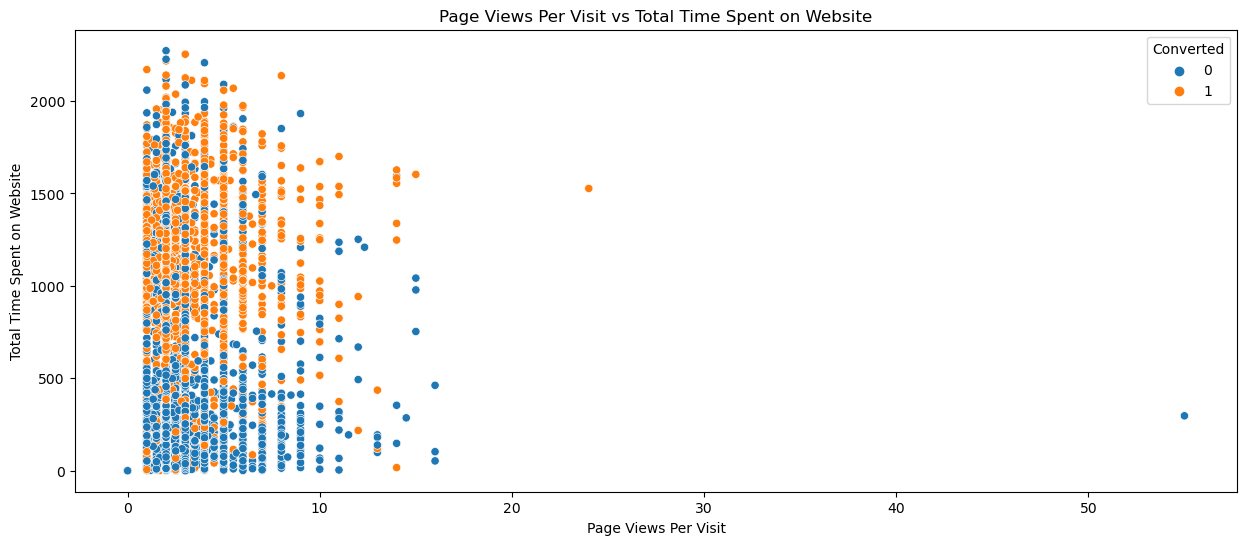

In [45]:
for c in new_num:
    for d in new_num:
        if c!=d:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x=lead[c],y=lead[d],hue=lead[target])
            plt.title(c+' vs '+d)
            plt.xlabel(c)
            plt.ylabel(d)
            plt.show()

## 5.3 Multivariate Analysis

For multivariate analysis Heatmap is used

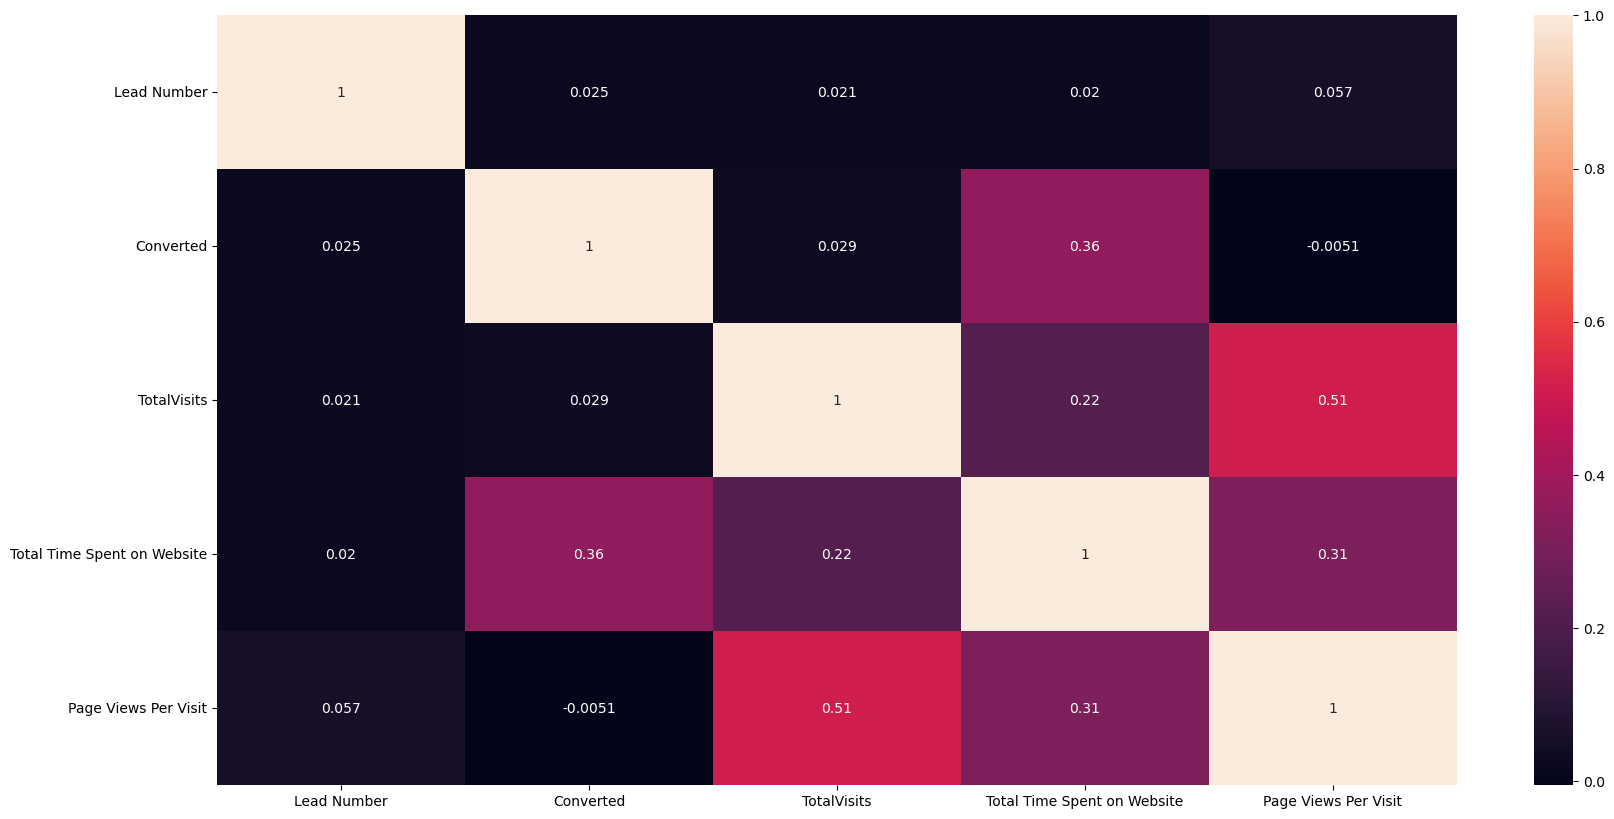

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(lead.corr(),annot=True)
plt.show()

# Step 6: Checking the data type for categorical columns.

Data types for each column is also an important part of the data preprocessing.
Here we changed data type from 'Object' to 'Category' for those who are having nunique value is less than equal to 30 but grater than 10.

In [47]:
new_num = []
new_cat = []
for i in lead.columns:
    if lead[i].dtype=='object':
        new_cat.append(i)
    else:
        new_num.append(i)

In [48]:
new_num

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [49]:
new_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [50]:
lead[new_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9240 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Last Activity                           9240 non-null   object
 4   Specialization                          9240 non-null   object
 5   What is your current occupation         9240 non-null   object
 6   Through Recommendations                 9240 non-null   object
 7   Tags                                    9240 non-null   object
 8   City                                    9240 non-null   object
 9   A free copy of Mastering The Interview  9240 non-null   object
 10  Last Notable Activity                   9240 non-null   object
dtypes: o

In [51]:
lead[new_cat].nunique()

Lead Origin                                5
Lead Source                               21
Do Not Email                               2
Last Activity                             17
Specialization                            18
What is your current occupation            6
Through Recommendations                    2
Tags                                      26
City                                       6
A free copy of Mastering The Interview     2
Last Notable Activity                     16
dtype: int64

In [52]:
for i in new_cat:
    if lead[i].nunique()<=30 and lead[i].nunique()>2:
        lead[i]=lead[i].astype('category')

In [53]:
lead[new_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9240 non-null   category
 1   Lead Source                             9240 non-null   category
 2   Do Not Email                            9240 non-null   object  
 3   Last Activity                           9240 non-null   category
 4   Specialization                          9240 non-null   category
 5   What is your current occupation         9240 non-null   category
 6   Through Recommendations                 9240 non-null   object  
 7   Tags                                    9240 non-null   category
 8   City                                    9240 non-null   category
 9   A free copy of Mastering The Interview  9240 non-null   object  
 10  Last Notable Activity                   9240 non

# Step 7: Data Preprocessing

In data preprcoessing the main work we did is to create dummy variable and mapped values who are having 2 unique values.

In [54]:
dummy_col = []
mapped_col = []
for col in new_cat:
    if lead[col].dtype=='category':
        dummy_col.append(col)
    else:
        mapped_col.append(col)

In [55]:
dummy_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [56]:
mapped_col

['Do Not Email',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

## 7.1 Dummy Variables

Dummy variables in important to avoind multicolinearity in the model training.

In [57]:
dummy_df = pd.get_dummies(lead[dummy_col],drop_first=True)

In [58]:
dummy_df

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   
...                                   ...                        ...   
9235                                    1                          0   
9236                                    1                          0   
9237                                    1                          0   
9238                                    1                          0   
9239                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
9235                        0                           0   
9236                        0                           0   
9237                        0                           0   
9238                        0                           0   
9239                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9238                           0                     0                   1   
9239                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                         0                   0                       1  ...   
1                         0                   0                       0  ...   
2                         0                   0                       0  ...   
3                         0                   0                       0  ...   
4                         0                   0                       0  ...   
...                     ...                 ...                     ...  ...   
9235                      0                   0                       0  ...   
9236                      0                   0                       0  ...   
9237                      0                   0                       0  ...   
9238                      0                   0                       0  ...   
9239                      0                   0                       0  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0 

In [59]:
lead = pd.concat([lead,dummy_df],axis=1)

In [60]:
lead.drop(lead[dummy_col],axis=1,inplace=True)

In [61]:
lead

Lead Number Do Not Email  Converted  TotalVisits  \
0          660737           No          0          0.0   
1          660728           No          0          5.0   
2          660727           No          1          2.0   
3          660719           No          0          1.0   
4          660681           No          1          2.0   
...           ...          ...        ...          ...   
9235       579564          Yes          1          8.0   
9236       579546           No          0          2.0   
9237       579545          Yes          0          2.0   
9238       579538           No          1          3.0   
9239       579533           No          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

     Through Recommendations A free copy of Mastering The Interview  \
0                         No                                     No   
1                         No                                     No   
2                         No                                    Yes   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9235                      No                                     No   
9236                      No                                    Yes   
9237                      No                                    Yes   
9238                      No                                     No   
9239                      No                                    Yes   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  ...  \
0                                       0                          0  ...   
1                                       0                          0  ...   
2                                       1                          0  ...   
3                                       1                          0  ...   
4                                       1                          0  ...   
...                                   ...                        ...  ...   
9235                                    1                          0  ...   
9236                                    1                          0  ...   
9237                                    1                          0  ...   
9238                                    1                          0  ...   
9239                                    1                          0  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0   
9237                                                0   
9238                                                0   
9239                                                0   

      Last Notable Activity_Had a Phone Conversation  \
0                                                  0   
1                        

## 7.2 Mapping Categorical column with 2 unique values

For better scalling and statistics we mapped yes as 1 and No as 0.

In [62]:
for i in mapped_col:
    print(lead[i].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [63]:
mapped_col

['Do Not Email',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [64]:
map_dict={'Yes':1,'No':0}
for j in mapped_col:
    lead[j]=lead[j].map(map_dict)

In [65]:
lead.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Through Recommendations  \
0                            0                   0.0                        0   
1                          674                   2.5                        0   
2                         1532                   2.0                        0   
3                          305                   1.0                        0   
4                         1428                   1.0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  ...  \
0                                    0                          0  ...   
1                                    0                          0  ...   
2                                    1                          0  ...   
3                                    1                          0  ...   
4                                    1                          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                        

# Step 8: Outlier Treatment

Outlier treatment is a important task to avoid data anomaly in the model and it avaoid to create a biased model

In [66]:
lead[num].describe()

Lead Number  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000                  9240.000000   
mean   617188.435606     3.438636                   487.698268   
std     23405.995698     4.819024                   548.021466   
min    579533.000000     0.000000                     0.000000   
25%    596484.500000     1.000000                    12.000000   
50%    615479.000000     3.000000                   248.000000   
75%    637387.250000     5.000000                   936.000000   
max    660737.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [67]:
for col in num:
    q1=lead[col].describe()['25%']
    q3=lead[col].describe()['75%']
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    lead[col]=np.where(lead[col]<lower_bound,lower_bound,lead[col])
    lead[col]=np.where(lead[col]>upper_bound, upper_bound,lead[col])

# Step 9: Splitting Data

Data is splitted as Train and Test 

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
lead_train, lead_test = train_test_split(lead, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
lead_train.shape

(6468, 115)

In [71]:
lead_test.shape

(2772, 115)

# Step 10: Scaling

Scalling all values to make the model unbiased and create a good statistics.

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
lead_train[num]=scaler.fit_transform(lead_train[num])
lead_test[num]=scaler.transform(lead_test[num])

In [75]:
lead_train.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
1871     0.762079             0          0     0.000000   
6795     0.223585             0          0     0.363636   
3516     0.582450             0          0     0.454545   
8105     0.103393             0          0     0.454545   
3934     0.527532             0          0     0.000000   

      Total Time Spent on Website  Page Views Per Visit  \
1871                     0.000000              0.000000   
6795                     0.214349              0.221667   
3516                     0.046655              0.416667   
8105                     0.541373              0.833333   
3934                     0.000000              0.000000   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  ...  \
1871                                    0                          0  ...   
6795                                    1                          0  ...   
3516                                    0                          0  ...   
8105                                    1                          0  ...   
3934                                    0                          0  ...   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubsc

In [76]:
lead_test.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
4269     0.486114             0          1     0.727273   
2376     0.706337             0          1     0.000000   
7766     0.132373             0          1     0.454545   
9199     0.004421             0          0     0.000000   
4359     0.472886             0          1     0.000000   

      Total Time Spent on Website  Page Views Per Visit  \
4269                     0.444982              1.000000   
2376                     0.000000              0.000000   
7766                     0.025968              0.833333   
9199                     0.000000              0.000000   
4359                     0.000000              0.000000   

      Through Recommendations  A free copy of Mastering The Interview  \
4269                        0                                       0   
2376                        0                                       0   
7766                        0                                       0   
9199                        0                                       0   
4359                        0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  ...  \
4269                                    0                          0  ...   
2376                                    0                          1  ...   
7766                                    0                          0  ...   
9199                                    0                          0  ...   
4359                                    0                          1  ...   

      Last Notable Activity_Form Submitted on Website  \
4269                                                0   
2376                                                0   
7766                                                0   
9199                                                0   
4359                                                0   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Page Visited on Website  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Resubscribed to emails  \
4269                                             0   
2376                                             0   
7766                                             0   
9199                                             0   
4359                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4269                               1                                  0   
2376                               1                                  0   
7766                               0                                  1   
9199                               0                                  0   
4359                               0                                  0   

      Last Notable Activity_Unsubsc

# Step 11: X and Y axis assignment

Splitting train and test data into X and Y axis.
- X axis = all variables which are affected by the Target variable.
- Y axis = only target variable which need to predict for test data or the problem feature.

## 11.1 Train split into X and Y

In [77]:
x_train = lead_train.drop(target,axis=1)
y_train = lead_train[target]

In [78]:
x_train.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     0.762079             0     0.000000                     0.000000   
6795     0.223585             0     0.363636                     0.214349   
3516     0.582450             0     0.454545                     0.046655   
8105     0.103393             0     0.454545                     0.541373   
3934     0.527532             0     0.000000                     0.000000   

      Page Views Per Visit  Through Recommendations  \
1871              0.000000                        0   
6795              0.221667                        0   
3516              0.416667                        0   
8105              0.833333                        0   
3934              0.000000                        0   

      A free copy of Mastering The Interview  \
1871                                       0   
6795                                       1   
3516                                       0   
8105                                       0   
3934                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  ...  \
1871                        0  ...   
6795                        0  ...   
3516                        0  ...   
8105                        0  ...   
3934                        0  ...   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                 

In [79]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

## Test split into X and Y

In [80]:
x_test = lead_test.drop(target,axis=1)
y_test = lead_test[target]

In [81]:
x_test.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
4269     0.486114             0     0.727273                     0.444982   
2376     0.706337             0     0.000000                     0.000000   
7766     0.132373             0     0.454545                     0.025968   
9199     0.004421             0     0.000000                     0.000000   
4359     0.472886             0     0.000000                     0.000000   

      Page Views Per Visit  Through Recommendations  \
4269              1.000000                        0   
2376              0.000000                        0   
7766              0.833333                        0   
9199              0.000000                        0   
4359              0.000000                        0   

      A free copy of Mastering The Interview  \
4269                                       0   
2376                                       0   
7766                                       0   
9199                                       0   
4359                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_Lead Import  ...  \
4269                        0  ...   
2376                        0  ...   
7766                        0  ...   
9199                        0  ...   
4359                        0  ...   

      Last Notable Activity_Form Submitted on Website  \
4269                                                0   
2376                                                0   
7766                                                0   
9199                                                0   
4359                                                0   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Page Visited on Website  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Resubscribed to emails  \
4269                                             0   
2376                                             0   
7766                                             0   
9199                                             0   
4359                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4269                               1                                  0   
2376                               1                                  0   
7766                               0                                  1   
9199                               0                 

In [82]:
y_test.head()

4269    1
2376    1
7766    1
9199    0
4359    1
Name: Converted, dtype: int64

# Step 12: Feature Engineering

using feature engineering to choose features automatically.

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [84]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
rfe = rfe.fit(x_train,y_train)
final_cols = x_train.columns[rfe.support_]

In [85]:
final_cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## 12.1 Train Data

In [86]:
x_train_rfe = x_train[final_cols]
x_train_rfe.shape

(6468, 10)

## 12.2 Test Data

In [87]:
x_test_rfe = x_test[final_cols]
x_test_rfe.shape

(2772, 10)

# Step 13: Model Building

from here onwards we are creating the model based on Logistic regression.

In [88]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
x_train_sm = sm.add_constant(x_train_rfe,has_constant='add')
x_train_sm.head()

const  Total Time Spent on Website  Lead Origin_Lead Add Form  \
1871    1.0                     0.000000                          0   
6795    1.0                     0.214349                          0   
3516    1.0                     0.046655                          0   
8105    1.0                     0.541373                          0   
3934    1.0                     0.000000                          0   

      What is your current occupation_Working Professional  Tags_Busy  \
1871                                                  0             0   
6795                                                  0             0   
3516                                                  0             0   
8105                                                  0             0   
3934                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lateral student  Tags_Lost to EINS  \
1871                        0                     0                  0   
6795                        0                     0                  0   
3516                        0                     0                  0   
8105                        0                     0                  0   
3934                        0                     0                  0   

      Tags_Will revert after reading the email  \
1871                                         0   
6795                                         1   
3516                                         0   
8105                                         0   
3934                                         1   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  
1871                               0  
6795                               0  
3516                               0  
8105                               1  
3934                               0

In [90]:
x_test_sm = sm.add_constant(x_test_rfe,has_constant='add')
x_test_sm.head()

const  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4269    1.0                     0.444982                          0   
2376    1.0                     0.000000                          1   
7766    1.0                     0.025968                          0   
9199    1.0                     0.000000                          0   
4359    1.0                     0.000000                          1   

      What is your current occupation_Working Professional  Tags_Busy  \
4269                                                  0             0   
2376                                                  0             0   
7766                                                  1             0   
9199                                                  0             0   
4359                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lateral student  Tags_Lost to EINS  \
4269                        0                     0                  0   
2376                        0                     0                  0   
7766                        0                     0                  0   
9199                        0                     0                  0   
4359                        0                     0                  0   

      Tags_Will revert after reading the email  \
4269                                         1   
2376                                         1   
7766                                         1   
9199                                         0   
4359                                         1   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_SMS Sent  
4269                               1  
2376                               1  
7766                               0  
9199                               0  
4359                               0

## Model 1

In [91]:
model1 = sm.GLM(y_train, x_train_sm)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.10639
Method:                          IRLS   Log-Likelihood:                -1925.9
Date:                Thu, 31 Aug 2023   Deviance:                       686.96
Time:                        15:12:54   Pearson chi2:                     687.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1279      0.008    -16.654      0.000      -0.143      -0.113
Total Time Spent on Website                              0.5517      0.018     31.119      0.000       0.517       0.586
Lead Origin_Lead Add Form                                0.3551      0.017     21.083      0.000       0.322       0.388
What is your current occupation_Working Professional     0.2509      0.016     15.827      0.000       0.220       0.282
Tags_Busy                                                0.3321      0.030     10.995      0.000       0.273       0.391
Tags_Closed by Horizzon                                  0.6983      0.024     28.777      0.000       0.651       0.746
Tags_Lateral student                                     0.8548      0.189      4.534      0.000       0.485       1.224
Tags_Lost to EINS                                        0.8672      0.032     27.175      0.000       0.805       0.930
Tags_Will revert after reading the email                 0.3792      0.009     42.086      0.000       0.362       0.397
Last Notable Activity_Had a Phone Conversation           0.4644      0.099      4.713      0.000       0.271       0.658
Last Notable Activity_SMS Sent                           0.3076      0.010     30.790      0.000       0.288       0.327
========================================================================================================================
"""

model 1 itself is the based model as we can see all p values are 0.0 which is less than 0.05

In [92]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))]

In [93]:
vif

Features       VIF
0                                               const  3.586740
1                         Total Time Spent on Website  1.105678
2                           Lead Origin_Lead Add Form  1.261931
3   What is your current occupation_Working Profes...  1.094009
4                                           Tags_Busy  1.050880
5                             Tags_Closed by Horizzon  1.314761
6                                Tags_Lateral student  1.001699
7                                   Tags_Lost to EINS  1.053466
8            Tags_Will revert after reading the email  1.199001
9      Last Notable Activity_Had a Phone Conversation  1.002289
10                     Last Notable Activity_SMS Sent  1.099063

vif is also giving good stats and all vif score is less than 5.0

# Step 14: Evaluation

in this part we evaluated the target variable for Train and Test data and also will check accuracy of the model

## 14.1 Evaluation for Train Data

In [94]:
y_pred=result1.predict(x_train_sm)

In [95]:
train_pred = pd.DataFrame()
train_pred['Actual']=y_train
train_pred['prediction_score']=y_pred
train_pred['Predicted']=np.where(train_pred['prediction_score']>0.4,1,0)
train_pred

Actual  prediction_score  Predicted
1871       0         -0.127918          0
6795       0          0.369587          0
3516       0         -0.102179          0
8105       0          0.478403          1
3934       0          0.251332          0
...      ...               ...        ...
350        1          0.606480          1
79         1          1.028604          1
8039       1          0.251332          0
6936       0         -0.070126          0
5640       0          0.251332          0

[6468 rows x 3 columns]

### 14.1.1 Confusion Matrix

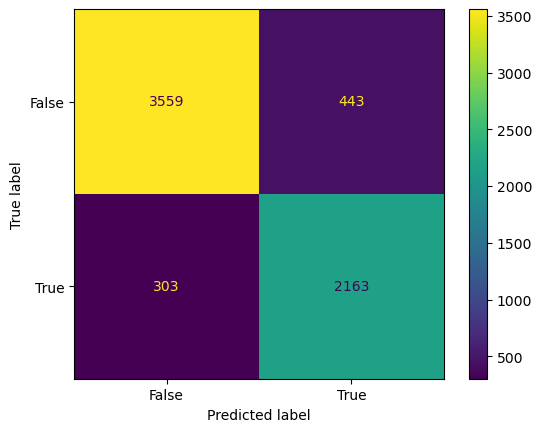

In [96]:
from sklearn import metrics
ConfusionMatrix = metrics.confusion_matrix(train_pred['Actual'],train_pred['Predicted'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix,display_labels=[False, True])
cm_display.plot()
plt.show()

## 14.1.2 Accuracy, Precission, Recall

In [97]:
accuracy = metrics.accuracy_score(train_pred['Actual'],train_pred['Predicted'])
precission = metrics.precision_score(train_pred['Actual'],train_pred['Predicted'])
recall = metrics.recall_score(train_pred['Actual'],train_pred['Predicted'])

print('Accuracy= ',accuracy)
print('Precission= ',precission)
print('Recall= ',recall)

Accuracy=  0.8846629560915276
Precission=  0.8300076745970837
Recall=  0.8771289537712895


For Train data accuracy is 88% which is a good sign that the model is the best fit.

## 14.2 Evaluation for Test Data

In [98]:
y_test_pred = result1.predict(x_test_sm)

In [99]:
test_pred = pd.DataFrame()
test_pred['Actual'] = y_test
test_pred['Prediction_score'] = y_test_pred
test_pred['Predicted'] = np.where(test_pred['Prediction_score']>0.5,1,0)
test_pred.head()

Actual  Prediction_score  Predicted
4269       1          0.804475          1
2376       1          0.914129          1
7766       1          0.516593          1
9199       0         -0.127918          0
4359       1          0.606480          1

### 14.2.1 Confusion Matrix

In [100]:
from sklearn import metrics

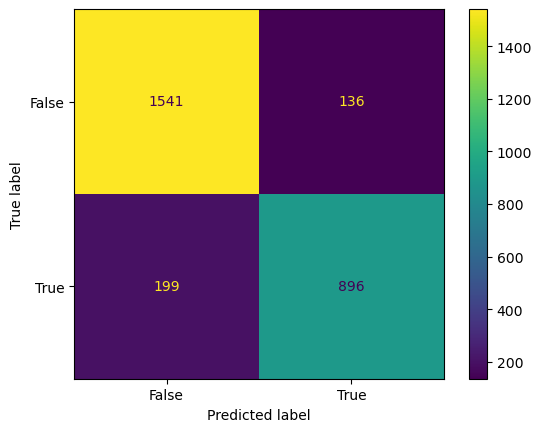

In [101]:
ConfusionMatrix_test = metrics.confusion_matrix(test_pred['Actual'],test_pred['Predicted'])
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix_test, display_labels=[False,True])
cmDisplay.plot()
plt.show()

In [102]:
Accuracy_test = metrics.accuracy_score(test_pred['Actual'],test_pred['Predicted'])
Precission_test = metrics.precision_score(test_pred['Actual'],test_pred['Predicted'])
Recall_test = metrics.recall_score(test_pred['Actual'],test_pred['Predicted'])

print('Accuracy= ',Accuracy_test)
print('Precission= ',Precission_test)
print('Recall= ',Recall_test)

Accuracy=  0.8791486291486291
Precission=  0.8682170542635659
Recall=  0.8182648401826484


For Test data Accuracy is also 87% so we can say that the model is well trained and best fit for this problem statement

# Step 15: Kaggle Hackathon Part

## 15.1 Reading Data

In [103]:
test = pd.read_csv('test.csv')
test.head()

Prospect ID      Id              Lead Origin  \
0  718cc1da-cdba-426b-9f53-4367354afe-70  111151                      API   
1  718cc1da-cdba-426b-9f53-4367354afe-71  111152  Landing Page Submission   
2  718cc1da-cdba-426b-9f53-4367354afe-72  111153                      API   
3  718cc1da-cdba-426b-9f53-4367354afe-73  111154                      API   
4  718cc1da-cdba-426b-9f53-4367354afe-74  111155  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  TotalVisits  \
0  Direct Traffic           No          No          3.0   
1  Direct Traffic           No          No        251.0   
2      Olark Chat           No          No          0.0   
3          Google           No          No         16.0   
4          Google           No          No          4.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                          143                   5.0       Email Link Clicked   
1                           54                   2.0  Page Visited on Website   
2                            0                   0.0                 SMS Sent   
3                          485                   2.0             Email Opened   
4                         1849                   7.0  Olark Chat Conversation   

   ... Get updates on DM Content     Lead Profile  \
0  ...                        No              NaN   
1  ...                        No           Select   
2  ...                        No           Select   
3  ...                        No  Lateral Student   
4  ...                        No           Select   

                          City Asymmetrique Activity Index  \
0                       Mumbai                         NaN   
1            Thane & Outskirts                         NaN   
2                       Mumbai                         NaN   
3                 Other Cities                         NaN   
4  Other Cities of Maharashtra                         NaN   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                        NaN                                       No   
1                        NaN                                       No   
2                        NaN                                       No   
3                        NaN                                       No   
4                        NaN                                       No   

  A free copy of Mastering The Interview    Last Notable Activity  
0                                     No       Email Link Clicked  
1                                    Yes  Page Visited on Website  
2                                     No                 Modified  
3                                     No             Email Opened  
4                                     No                 Modified  

[5 rows x 36 columns]

In [104]:
copy_test = test.drop('Prospect ID',axis=1)
copy_test.shape

(2007, 35)

In [105]:
copy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Id                                             2007 non-null   int64  
 1   Lead Origin                                    2007 non-null   object 
 2   Lead Source                                    1995 non-null   object 
 3   Do Not Email                                   2007 non-null   object 
 4   Do Not Call                                    2007 non-null   object 
 5   TotalVisits                                    1983 non-null   float64
 6   Total Time Spent on Website                    2007 non-null   int64  
 7   Page Views Per Visit                           1983 non-null   float64
 8   Last Activity                                  1989 non-null   object 
 9   Country                                        1487 

## 15.2 Dummy variable creation

In [106]:
for i in cat:
    if copy_test[i].nunique()<=30 and copy_test[i].nunique()>2:
        copy_test[i]=copy_test[i].astype('category')

In [107]:
copy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Id                                             2007 non-null   int64   
 1   Lead Origin                                    2007 non-null   category
 2   Lead Source                                    1995 non-null   category
 3   Do Not Email                                   2007 non-null   object  
 4   Do Not Call                                    2007 non-null   object  
 5   TotalVisits                                    1983 non-null   float64 
 6   Total Time Spent on Website                    2007 non-null   int64   
 7   Page Views Per Visit                           1983 non-null   float64 
 8   Last Activity                                  1989 non-null   category
 9   Country                                  

In [108]:
dummy_df_test = pd.get_dummies(copy_test[dummy_col],drop_first=True)

In [109]:
dummy_df_test

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       1                          0   
2                                       0                          0   
3                                       0                          0   
4                                       1                          0   
...                                   ...                        ...   
2002                                    1                          0   
2003                                    0                          0   
2004                                    0                          0   
2005                                    0                          0   
2006                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
2002                        0                           0   
2003                        0                           0   
2004                        0                           0   
2005                        0                           0   
2006                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              1                     0                   0   
1                              1                     0                   0   
2                              0                     0                   0   
3                              0                     0                   1   
4                              0                     0                   1   
...                          ...                   ...                 ...   
2002                           0                     0                   0   
2003                           0                     0                   1   
2004                           0                     0                   1   
2005                           0                     0                   0   
2006                           1                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
0                          0                           0   
1                          0                           0   
2                          1                           0   
3                          0                           0   
4                          0                           0   
...                      ...                         ...   
2002                       0                           1   
2003                       0                           0   
2004                       0                           0   
2005                       1                           0   
2006                       0                           0   

      Lead Source_Reference  ...  Last Notable Activity_Email Marked Spam  \
0                         0  ...                                        0   
1                         0  ...                                        0   
2                         0  ...                                        0   
3                         0  ...                                        0   
4                         0  ...                                        0   
...                     ...  ...                                      ...   
2002                      0  ...                                        0   
2003                      0  ...                                        0   
2004                      0  ...                         

In [110]:
copy_test = pd.concat([copy_test,dummy_df_test],axis=1)
copy_test.drop(dummy_col,axis=1,inplace=True)
copy_test.head()

Id Do Not Email Do Not Call  TotalVisits  Total Time Spent on Website  \
0  111151           No          No          3.0                          143   
1  111152           No          No        251.0                           54   
2  111153           No          No          0.0                            0   
3  111154           No          No         16.0                          485   
4  111155           No          No          4.0                         1849   

   Page Views Per Visit Country How did you hear about X Education  \
0                   5.0   India                             Select   
1                   2.0   India                                NaN   
2                   0.0     NaN                             Select   
3                   2.0   India                                NaN   
4                   7.0   India                             Select   

  What matters most to you in choosing a course Search  ...  \
0                                           NaN     No  ...   
1                       Better Career Prospects     No  ...   
2                       Better Career Prospects     No  ...   
3                       Better Career Prospects     No  ...   
4                       Better Career Prospects     No  ...   

  Last Notable Activity_Email Marked Spam Last Notable Activity_Email Opened  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  1   
4                                       0                                  0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              0   
1                              0   
2                              1   
3                              0   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             1   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_SMS Sent Last Notable Activity_Unreachable  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

  Last Notable Activity_Unsubscribed  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 117 columns]

## 15.3 Mapping variables for categorical columns which are having 2 unique values

In [111]:
map_dict={'Yes':1,'No':0}
for j in mapped_col:
    copy_test[j]=copy_test[j].map(map_dict)

In [112]:
copy_test.head()

Id  Do Not Email Do Not Call  TotalVisits  Total Time Spent on Website  \
0  111151             0          No          3.0                          143   
1  111152             0          No        251.0                           54   
2  111153             0          No          0.0                            0   
3  111154             0          No         16.0                          485   
4  111155             0          No          4.0                         1849   

   Page Views Per Visit Country How did you hear about X Education  \
0                   5.0   India                             Select   
1                   2.0   India                                NaN   
2                   0.0     NaN                             Select   
3                   2.0   India                                NaN   
4                   7.0   India                             Select   

  What matters most to you in choosing a course Search  ...  \
0                                           NaN     No  ...   
1                       Better Career Prospects     No  ...   
2                       Better Career Prospects     No  ...   
3                       Better Career Prospects     No  ...   
4                       Better Career Prospects     No  ...   

  Last Notable Activity_Email Marked Spam Last Notable Activity_Email Opened  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  1   
4                                       0                                  0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              0   
1                              0   
2                              1   
3                              0   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_SMS Sent Last Notable Activity_Unreachable  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

  Last Notable Activity_Unsubscribed  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 117 columns]

## 15.4 Outlier Treatment

In [113]:
for i in num:
    if i!='Lead Number':
        q1 = copy_test[i].describe()['25%']
        q3 = copy_test[i].describe()['75%']
        iqr = q3-q1
        lower_bound = q1-1.5*iqr
        upper_bound = q3+1.5*iqr
        
        copy_test[i]=np.where(copy_test[i]<lower_bound,lower_bound,copy_test[i])
        copy_test[i]=np.where(copy_test[i]>upper_bound,upper_bound,copy_test[i])

In [114]:
copy_test.head()

Id  Do Not Email Do Not Call  TotalVisits  Total Time Spent on Website  \
0  111151             0          No          3.0                        143.0   
1  111152             0          No         11.0                         54.0   
2  111153             0          No          0.0                          0.0   
3  111154             0          No         11.0                        485.0   
4  111155             0          No          4.0                       1849.0   

   Page Views Per Visit Country How did you hear about X Education  \
0                   5.0   India                             Select   
1                   2.0   India                                NaN   
2                   0.0     NaN                             Select   
3                   2.0   India                                NaN   
4                   7.0   India                             Select   

  What matters most to you in choosing a course Search  ...  \
0                                           NaN     No  ...   
1                       Better Career Prospects     No  ...   
2                       Better Career Prospects     No  ...   
3                       Better Career Prospects     No  ...   
4                       Better Career Prospects     No  ...   

  Last Notable Activity_Email Marked Spam Last Notable Activity_Email Opened  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  1   
4                                       0                                  0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              0   
1                              0   
2                              1   
3                              0   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_SMS Sent Last Notable Activity_Unreachable  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

  Last Notable Activity_Unsubscribed  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 117 columns]

## 15.5 Scaling

In [115]:
num_col = num
num_col

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [116]:
num_col.remove('Lead Number')
num_col.append('Id')
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Id']

In [117]:
copy_test[num_col]=scaler.transform(copy_test[num_col])

In [118]:
copy_test.head()

Id  Do Not Email Do Not Call  TotalVisits  \
0  18525.166667             0          No    -7.137508   
1  18525.333333             0          No    -7.137410   
2  18525.500000             0          No    -7.137545   
3  18525.666667             0          No    -7.137410   
4  18525.833333             0          No    -7.137496   

   Total Time Spent on Website  Page Views Per Visit Country  \
0                    13.000000              0.002201   India   
1                     4.909091              0.000880   India   
2                     0.000000              0.000000     NaN   
3                    44.090909              0.000880   India   
4                   168.090909              0.003081   India   

  How did you hear about X Education  \
0                             Select   
1                                NaN   
2                             Select   
3                                NaN   
4                             Select   

  What matters most to you in choosing a course Search  ...  \
0                                           NaN     No  ...   
1                       Better Career Prospects     No  ...   
2                       Better Career Prospects     No  ...   
3                       Better Career Prospects     No  ...   
4                       Better Career Prospects     No  ...   

  Last Notable Activity_Email Marked Spam Last Notable Activity_Email Opened  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  1   
4                                       0                                  0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              0   
1                              0   
2                              1   
3                              0   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_SMS Sent Last Notable Activity_Unreachable  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

  Last Notable Activity_Unsubscribed  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 117 columns]

## 15.6 Feature Engineered Columns

In [119]:
copy_test = copy_test[final_cols]
copy_test.shape

(2007, 10)

In [120]:
copy_test_sm = sm.add_constant(copy_test,has_constant='add')
copy_test_sm.head()

const  Total Time Spent on Website  Lead Origin_Lead Add Form  \
0    1.0                    13.000000                          0   
1    1.0                     4.909091                          0   
2    1.0                     0.000000                          0   
3    1.0                    44.090909                          0   
4    1.0                   168.090909                          0   

   What is your current occupation_Working Professional  Tags_Busy  \
0                                                  0             0   
1                                                  0             0   
2                                                  0             0   
3                                                  0             0   
4                                                  0             0   

   Tags_Closed by Horizzon  Tags_Lateral student  Tags_Lost to EINS  \
0                        0                     0                  0   
1                        0                     0                  0   
2                        0                     0                  0   
3                        0                     0                  0   
4                        0                     0                  0   

   Tags_Will revert after reading the email  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

## 15.7 Evaluation

In [121]:
copy_test_pred = result1.predict(copy_test_sm)

In [122]:
final_pred = pd.DataFrame()
final_pred['prediction_score']=copy_test_pred
final_pred['Predicted']=np.where(final_pred['prediction_score']>0.4,1,0)
final_pred

prediction_score  Predicted
0             7.044099          1
1             2.580396          1
2            -0.127918          0
3            24.576006          1
4            92.606765          1
...                ...        ...
2002         11.257032          1
2003         19.030897          1
2004         55.141753          1
2005         -0.127918          0
2006         22.269087          1

[2007 rows x 2 columns]

## 15.8 Creating Final DataFrame

In [123]:
submission = pd.DataFrame()
submission['id'] = test['Id']
submission['Converted'] = final_pred['Predicted']
submission.head()

id  Converted
0  111151          1
1  111152          1
2  111153          0
3  111154          1
4  111155          1

## Exporting Submission.csv

In [124]:
submission_csv = submission.to_csv('submission.csv')
print(submission_csv)

None
